In [13]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard

from keras.layers import *
from keras.models import Model
from keras.preprocessing import image
import keras.backend as K
import tensorflow as tf
tf.config.list_physical_devices('GPU')

import matplotlib.pyplot as plt

import numpy as np
import os
import random
import scipy.misc
from tqdm import *

%matplotlib inline

ModuleNotFoundError: No module named 'keras'

In [2]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.1 MB/s eta 0:00:00


In [3]:
from datasets import load_dataset
dataset = load_dataset("Maysee/tiny-imagenet")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/100000 [00:00<?, ? examples/s]

Generating valid split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [48]:
from sklearn.model_selection import train_test_split

train_data,_ = train_test_split(dataset['train']['image'], train_size=.15)
X_train, X_test = train_test_split(train_data, test_size=.1)
X_train_secret, X_train_cover = train_test_split(X_train, test_size=.5)
X_test_secret, X_test_cover = train_test_split(X_test, test_size=.5)

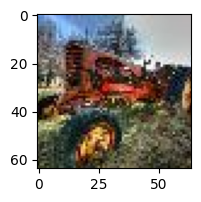

In [49]:
plt.figure(figsize=(7,2))
plt.imshow(X_train_secret[3])


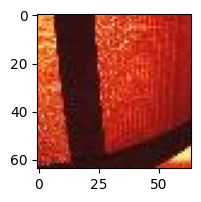

In [50]:
plt.figure(figsize=(7,2))
plt.imshow(X_train_cover[3])

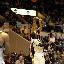

In [51]:
X_train_secret[0]

In [52]:
 tf.keras.utils.img_to_array(X_train_secret[0].convert('RGB'))

array([[[  5.,   5.,   0.],
        [  3.,   3.,   0.],
        [  3.,   0.,   0.],
        ...,
        [ 30.,  20.,  11.],
        [ 30.,  17.,   8.],
        [ 19.,   6.,   0.]],

       [[ 17.,  17.,   7.],
        [ 11.,  11.,   1.],
        [ 15.,  12.,   3.],
        ...,
        [ 26.,  16.,   7.],
        [ 23.,  13.,   4.],
        [ 12.,   2.,   0.]],

       [[ 14.,  15.,   7.],
        [  8.,   9.,   1.],
        [ 22.,  22.,  14.],
        ...,
        [ 36.,  27.,  20.],
        [ 32.,  23.,  16.],
        [ 22.,  13.,   4.]],

       ...,

       [[227., 226., 224.],
        [224., 220., 217.],
        [218., 210., 207.],
        ...,
        [127., 114.,  95.],
        [ 72.,  57.,  36.],
        [ 53.,  38.,  15.]],

       [[221., 219., 220.],
        [207., 203., 202.],
        [242., 234., 231.],
        ...,
        [ 92.,  81.,  59.],
        [ 68.,  56.,  32.],
        [ 70.,  58.,  32.]],

       [[220., 218., 219.],
        [205., 201., 200.],
        [137., 1

In [53]:
#Converting the Dataset to a numpy array
for i in range(len(X_train_secret)):
    X_train_secret[i] = tf.keras.utils.img_to_array(X_train_secret[i].convert('RGB'))
    X_train_cover[i] = tf.keras.utils.img_to_array(X_train_cover[i].convert('RGB'))

for i in range(len(X_test_secret)):
    X_test_secret[i] = tf.keras.utils.img_to_array(X_test_secret[i].convert('RGB'))
    X_test_cover[i] = tf.keras.utils.img_to_array(X_test_cover[i].convert('RGB'))


In [54]:
X_train_cover[0]

array([[[104., 103., 108.],
        [107., 106., 111.],
        [102., 101., 107.],
        ...,
        [115., 127., 203.],
        [131., 137., 249.],
        [119., 122., 251.]],

       [[ 45.,  44.,  49.],
        [ 83.,  82.,  87.],
        [ 58.,  57.,  63.],
        ...,
        [126., 138., 210.],
        [121., 129., 230.],
        [111., 117., 231.]],

       [[ 16.,  15.,  21.],
        [ 71.,  70.,  76.],
        [ 41.,  41.,  49.],
        ...,
        [145., 161., 221.],
        [120., 131., 210.],
        [127., 137., 224.]],

       ...,

       [[134., 147., 217.],
        [142., 156., 203.],
        [235., 253., 253.],
        ...,
        [ 84., 105., 186.],
        [ 80.,  96., 174.],
        [ 92., 105., 183.]],

       [[144., 155., 244.],
        [158., 172., 233.],
        [226., 243., 250.],
        ...,
        [ 73.,  92., 171.],
        [ 79.,  92., 170.],
        [100., 112., 188.]],

       [[135., 147., 245.],
        [232., 245., 255.],
        [242., 2

In [55]:
#Converting the lists to a numpy array
X_train_secret=np.array(X_train_secret)
X_train_cover=np.array(X_train_cover)
X_test_secret=np.array(X_test_secret)
X_test_cover=np.array(X_test_cover)

In [56]:
X_train_secret = X_train_secret[0:X_train_secret.shape[0] // 12]
X_train_cover = X_train_cover[0:X_train_cover.shape[0] // 12]

In [57]:
#Normalising the training and testing dataset
for i in range(len(X_train_secret)):
    X_train_secret[i] = X_train_secret[i]/255
    X_train_cover[i] = X_train_cover[i]/255
for i in range(len(X_test_secret)):
    X_test_secret[i] = X_test_secret[i]/255
    X_test_cover[i] = X_test_cover[i]/255


In [58]:
X_train_secret[0]

array([[[0.01960784, 0.01960784, 0.        ],
        [0.01176471, 0.01176471, 0.        ],
        [0.01176471, 0.        , 0.        ],
        ...,
        [0.11764706, 0.07843138, 0.04313726],
        [0.11764706, 0.06666667, 0.03137255],
        [0.07450981, 0.02352941, 0.        ]],

       [[0.06666667, 0.06666667, 0.02745098],
        [0.04313726, 0.04313726, 0.00392157],
        [0.05882353, 0.04705882, 0.01176471],
        ...,
        [0.10196079, 0.0627451 , 0.02745098],
        [0.09019608, 0.05098039, 0.01568628],
        [0.04705882, 0.00784314, 0.        ]],

       [[0.05490196, 0.05882353, 0.02745098],
        [0.03137255, 0.03529412, 0.00392157],
        [0.08627451, 0.08627451, 0.05490196],
        ...,
        [0.14117648, 0.10588235, 0.07843138],
        [0.1254902 , 0.09019608, 0.0627451 ],
        [0.08627451, 0.05098039, 0.01568628]],

       ...,

       [[0.8901961 , 0.8862745 , 0.8784314 ],
        [0.8784314 , 0.8627451 , 0.8509804 ],
        [0.85490197, 0

In [59]:

beta = 1.0

def rev_loss(s_true, s_pred):
    # Loss for reveal network is: beta * |S-S'|
    return beta * K.sum(K.square(s_true - s_pred))
    pass

def full_loss(y_true, y_pred):
    # Loss for the full model is: |C-C'| + beta * |S-S'|
    s_true, c_true = y_true[...,0:3], y_true[...,3:6]
    s_pred, c_pred = y_pred[...,0:3], y_pred[...,3:6]

    s_loss = rev_loss(s_true, s_pred)
    c_loss = K.sum(K.square(c_true - c_pred))

    return s_loss + c_loss

In [60]:
def make_encoder(input_size):
    input_S = Input(shape=(input_size))
    input_C= Input(shape=(input_size))

    # Preparation Network
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_prep0_3x3')(input_S)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_prep0_4x4')(input_S)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_prep0_5x5')(input_S)
    x = concatenate([x3, x4, x5]) #Feature Map for secret image

    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_prep1_3x3')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_prep1_4x4')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_prep1_5x5')(x)
    x = concatenate([x3, x4, x5]) #Feature Map for secret image

    x = concatenate([input_C, x]) #concatenate feature map with cover image

    # Hiding network
    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_hid0_3x3')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_hid0_4x4')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_hid0_5x5')(x)
    x = concatenate([x3, x4, x5])   

    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_hid1_3x3')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_hid1_4x4')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_hid1_5x5')(x)
    x = concatenate([x3, x4, x5])

    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_hid2_3x3')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_hid2_4x4')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_hid2_5x5')(x)
    x = concatenate([x3, x4, x5])

    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_hid3_3x3')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_hid3_4x4')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_hid3_5x5')(x)
    x = concatenate([x3, x4, x5])

    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_hid4_3x3')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_hid4_4x4')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_hid5_5x5')(x)
    x = concatenate([x3, x4, x5])

    output_Cprime = Conv2D(3, (3, 3), strides = (1, 1), padding='same', activation='relu', name='output_C')(x)

    return Model(inputs=[input_S, input_C],
                 outputs=output_Cprime,
                 name = 'Encoder')

In [61]:
# Returns the decoder as a Keras model, composed by the Reveal Network
def make_decoder(input_size, fixed=False):

    # Reveal network
    reveal_input = Input(shape=(input_size))

    # Adding Gaussian noise with 0.01 standard deviation.
    input_with_noise = GaussianNoise(0.01, name='output_C_noise')(reveal_input)

    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev0_3x3')(input_with_noise)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev0_4x4')(input_with_noise)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev0_5x5')(input_with_noise)
    x = concatenate([x3, x4, x5])

    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev1_3x3')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev1_4x4')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev1_5x5')(x)
    x = concatenate([x3, x4, x5])

    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev2_3x3')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev2_4x4')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev2_5x5')(x)
    x = concatenate([x3, x4, x5])

    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev3_3x3')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev3_4x4')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev3_5x5')(x)
    x = concatenate([x3, x4, x5])

    x3 = Conv2D(50, (3, 3), strides = (1, 1), padding='same', activation='relu', name='conv_rev4_3x3')(x)
    x4 = Conv2D(10, (4, 4), strides = (1, 1), padding='same', activation='relu', name='conv_rev4_4x4')(x)
    x5 = Conv2D(5, (5, 5), strides = (1, 1), padding='same', activation='relu', name='conv_rev5_5x5')(x)
    x = concatenate([x3, x4, x5])

    output_Sprime = Conv2D(3, (3, 3), strides = (1, 1), padding='same', activation='relu', name='output_S')(x)

    if not fixed:
        return Model(inputs=reveal_input,
                     outputs=output_Sprime,
                     name = 'Decoder')
    else:
        return Container(inputs=reveal_input,
                         outputs=output_Sprime,
                         name = 'DecoderFixed')


In [62]:
# Full model.
def make_model(input_size):
    input_S = Input(shape=(input_size))
    input_C= Input(shape=(input_size))

    encoder = make_encoder(input_size)

    decoder = make_decoder(input_size)
    decoder.compile(optimizer='adam', loss=rev_loss)
    decoder.trainable = False

    output_Cprime = encoder([input_S, input_C])
    output_Sprime = decoder(output_Cprime)

    autoencoder = Model(inputs=[input_S, input_C],
                        outputs=concatenate([output_Sprime, output_Cprime]))
    autoencoder.compile(optimizer='adam', loss=full_loss)

    return encoder, decoder, autoencoder

In [63]:
encoder_model, reveal_model, autoencoder_model = make_model(X_train_secret.shape[1:])

In [64]:
def lr_schedule(epoch_idx):
    if epoch_idx < 20:
        return 0.001
    elif epoch_idx < 30:
        return 0.0003
    elif epoch_idx < 45:
        return 0.0001
    else:
        return 0.00003

In [65]:
NB_EPOCHS = 50
BATCH_SIZE = 32

m = X_train_secret.shape[0]
loss_history = []
for epoch in range(NB_EPOCHS):
    np.random.shuffle(X_train_secret)
    np.random.shuffle(X_train_cover)
    print(epoch)
    print("\n")
    t = tqdm(range(0, X_train_secret.shape[0], BATCH_SIZE),mininterval=0)
    ae_loss = []
    reveal_loss = []
    for idx in t:

        batch_S = X_train_secret[idx:min(idx + BATCH_SIZE, m)]
        batch_C = X_train_cover[idx:min(idx + BATCH_SIZE, m)]

        C_prime = encoder_model.predict([batch_S, batch_C])

        ae_loss.append(autoencoder_model.train_on_batch(x=[batch_S, batch_C],y=np.concatenate((batch_S, batch_C),axis=3)))
        reveal_loss.append(reveal_model.train_on_batch(x=C_prime,y=batch_S))

        # Update learning rate
        K.set_value(autoencoder_model.optimizer.lr, lr_schedule(epoch))
        K.set_value(reveal_model.optimizer.lr, lr_schedule(epoch))

        t.set_description('Epoch {} | Batch: {:3} of {}. Loss AE {:10.2f} | Loss Rev {:10.2f}'.format(epoch + 1, idx, m, np.mean(ae_loss), np.mean(reveal_loss)))
    loss_history.append(np.mean(ae_loss))

0




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 3s 3s/step


Epoch 1 | Batch:   0 of 562. Loss AE  240811.41 | Loss Rev  130597.66:   6%|▌         | 1/18 [00:42<11:58, 42.28s/it]

1/1 [==============================] - 3s 3s/step


Epoch 1 | Batch:  32 of 562. Loss AE  206623.34 | Loss Rev   78133.06:  11%|█         | 2/18 [01:14<09:42, 36.44s/it]

1/1 [==============================] - 3s 3s/step


Epoch 1 | Batch:  64 of 562. Loss AE  164563.69 | Loss Rev   61136.11:  17%|█▋        | 3/18 [01:45<08:26, 33.76s/it]

1/1 [==============================] - 2s 2s/step


Epoch 1 | Batch:  96 of 562. Loss AE  163295.54 | Loss Rev   74579.41:  22%|██▏       | 4/18 [02:16<07:38, 32.73s/it]

1/1 [==============================] - 2s 2s/step


Epoch 1 | Batch: 128 of 562. Loss AE  158829.25 | Loss Rev   70488.81:  28%|██▊       | 5/18 [02:46<06:52, 31.70s/it]

1/1 [==============================] - 3s 3s/step


Epoch 1 | Batch: 160 of 562. Loss AE  158865.41 | Loss Rev   70049.92:  33%|███▎      | 6/18 [03:17<06:18, 31.55s/it]

1/1 [==============================] - 3s 3s/step


Epoch 1 | Batch: 192 of 562. Loss AE  157983.60 | Loss Rev   70963.72:  39%|███▉      | 7/18 [03:47<05:41, 31.03s/it]

1/1 [==============================] - 2s 2s/step


Epoch 1 | Batch: 224 of 562. Loss AE  156282.28 | Loss Rev   69611.16:  44%|████▍     | 8/18 [04:16<05:05, 30.50s/it]

1/1 [==============================] - 2s 2s/step


Epoch 1 | Batch: 256 of 562. Loss AE  151841.17 | Loss Rev   66376.06:  50%|█████     | 9/18 [04:48<04:37, 30.84s/it]

1/1 [==============================] - 3s 3s/step


Epoch 1 | Batch: 288 of 562. Loss AE  147208.54 | Loss Rev   63971.82:  56%|█████▌    | 10/18 [05:18<04:05, 30.63s/it]

1/1 [==============================] - 3s 3s/step


Epoch 1 | Batch: 320 of 562. Loss AE  142222.83 | Loss Rev   62581.76:  61%|██████    | 11/18 [05:49<03:36, 30.86s/it]

1/1 [==============================] - 3s 3s/step


Epoch 1 | Batch: 352 of 562. Loss AE  136088.08 | Loss Rev   59701.46:  67%|██████▋   | 12/18 [06:19<03:03, 30.55s/it]

1/1 [==============================] - 3s 3s/step


Epoch 1 | Batch: 384 of 562. Loss AE  130906.63 | Loss Rev   57520.67:  72%|███████▏  | 13/18 [06:49<02:30, 30.18s/it]

1/1 [==============================] - 3s 3s/step


Epoch 1 | Batch: 416 of 562. Loss AE  124991.22 | Loss Rev   55117.22:  78%|███████▊  | 14/18 [07:20<02:01, 30.49s/it]

1/1 [==============================] - 2s 2s/step


Epoch 1 | Batch: 448 of 562. Loss AE  120073.54 | Loss Rev   52761.57:  83%|████████▎ | 15/18 [07:49<01:30, 30.02s/it]

1/1 [==============================] - 2s 2s/step


Epoch 1 | Batch: 480 of 562. Loss AE  116016.32 | Loss Rev   50735.95:  89%|████████▉ | 16/18 [08:20<01:00, 30.46s/it]

1/1 [==============================] - 4s 4s/step


Epoch 1 | Batch: 512 of 562. Loss AE  112209.46 | Loss Rev   49027.03:  94%|█████████▍| 17/18 [08:52<00:30, 30.78s/it]

1/1 [==============================] - 2s 2s/step


Epoch 1 | Batch: 544 of 562. Loss AE  107383.09 | Loss Rev   47080.91: 100%|██████████| 18/18 [09:18<00:00, 31.02s/it]


1




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


Epoch 2 | Batch:   0 of 562. Loss AE   43925.88 | Loss Rev   22605.59:   6%|▌         | 1/18 [00:29<08:17, 29.27s/it]

1/1 [==============================] - 3s 3s/step


Epoch 2 | Batch:  32 of 562. Loss AE   44535.32 | Loss Rev   23761.90:  11%|█         | 2/18 [01:01<08:19, 31.21s/it]

1/1 [==============================] - 3s 3s/step


Epoch 2 | Batch:  64 of 562. Loss AE   43200.65 | Loss Rev   23541.37:  17%|█▋        | 3/18 [01:31<07:34, 30.29s/it]

1/1 [==============================] - 3s 3s/step


Epoch 2 | Batch:  96 of 562. Loss AE   42180.49 | Loss Rev   22921.00:  22%|██▏       | 4/18 [02:02<07:09, 30.65s/it]

1/1 [==============================] - 3s 3s/step


Epoch 2 | Batch: 128 of 562. Loss AE   40542.76 | Loss Rev   22460.86:  28%|██▊       | 5/18 [02:32<06:36, 30.50s/it]

1/1 [==============================] - 2s 2s/step


Epoch 2 | Batch: 160 of 562. Loss AE   39682.01 | Loss Rev   22002.25:  33%|███▎      | 6/18 [03:01<06:00, 30.02s/it]

1/1 [==============================] - 2s 2s/step


Epoch 2 | Batch: 192 of 562. Loss AE   39343.21 | Loss Rev   21793.20:  39%|███▉      | 7/18 [03:31<05:29, 29.94s/it]

1/1 [==============================] - 3s 3s/step


Epoch 2 | Batch: 224 of 562. Loss AE   38629.89 | Loss Rev   21185.01:  44%|████▍     | 8/18 [04:00<04:57, 29.78s/it]

1/1 [==============================] - 3s 3s/step


Epoch 2 | Batch: 256 of 562. Loss AE   38009.65 | Loss Rev   20878.23:  50%|█████     | 9/18 [04:30<04:26, 29.64s/it]

1/1 [==============================] - 2s 2s/step


Epoch 2 | Batch: 288 of 562. Loss AE   37427.87 | Loss Rev   20518.38:  56%|█████▌    | 10/18 [05:01<04:00, 30.07s/it]

1/1 [==============================] - 3s 3s/step


Epoch 2 | Batch: 320 of 562. Loss AE   36811.42 | Loss Rev   20075.73:  61%|██████    | 11/18 [05:30<03:29, 30.00s/it]

1/1 [==============================] - 3s 3s/step


Epoch 2 | Batch: 352 of 562. Loss AE   36154.26 | Loss Rev   19643.55:  67%|██████▋   | 12/18 [06:00<02:58, 29.80s/it]

1/1 [==============================] - 3s 3s/step


Epoch 2 | Batch: 384 of 562. Loss AE   35614.44 | Loss Rev   19324.19:  72%|███████▏  | 13/18 [06:31<02:30, 30.15s/it]

1/1 [==============================] - 3s 3s/step


Epoch 2 | Batch: 416 of 562. Loss AE   35131.69 | Loss Rev   19091.04:  78%|███████▊  | 14/18 [07:01<02:00, 30.15s/it]

1/1 [==============================] - 3s 3s/step


Epoch 2 | Batch: 448 of 562. Loss AE   34622.95 | Loss Rev   18703.59:  83%|████████▎ | 15/18 [07:30<01:29, 29.84s/it]

1/1 [==============================] - 3s 3s/step


Epoch 2 | Batch: 480 of 562. Loss AE   34059.28 | Loss Rev   18384.61:  89%|████████▉ | 16/18 [08:01<01:00, 30.23s/it]

1/1 [==============================] - 2s 2s/step


Epoch 2 | Batch: 512 of 562. Loss AE   33722.13 | Loss Rev   18279.64:  94%|█████████▍| 17/18 [08:30<00:29, 29.90s/it]

1/1 [==============================] - 1s 1s/step


Epoch 2 | Batch: 544 of 562. Loss AE   32649.76 | Loss Rev   17673.10: 100%|██████████| 18/18 [08:57<00:00, 29.87s/it]


2




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 3s 3s/step


Epoch 3 | Batch:   0 of 562. Loss AE   23606.74 | Loss Rev   12160.31:   6%|▌         | 1/18 [00:32<09:19, 32.91s/it]

1/1 [==============================] - 3s 3s/step


Epoch 3 | Batch:  32 of 562. Loss AE   24021.18 | Loss Rev   12151.46:  11%|█         | 2/18 [01:02<08:18, 31.17s/it]

1/1 [==============================] - 3s 3s/step


Epoch 3 | Batch:  64 of 562. Loss AE   24332.99 | Loss Rev   12756.75:  17%|█▋        | 3/18 [01:33<07:45, 31.05s/it]

1/1 [==============================] - 2s 2s/step


Epoch 3 | Batch:  96 of 562. Loss AE   24333.30 | Loss Rev   13213.55:  22%|██▏       | 4/18 [02:02<07:04, 30.30s/it]

1/1 [==============================] - 3s 3s/step


Epoch 3 | Batch: 128 of 562. Loss AE   23809.92 | Loss Rev   12608.56:  28%|██▊       | 5/18 [02:34<06:37, 30.61s/it]

1/1 [==============================] - 4s 4s/step


Epoch 3 | Batch: 160 of 562. Loss AE   23669.38 | Loss Rev   12560.43:  33%|███▎      | 6/18 [03:06<06:16, 31.40s/it]

1/1 [==============================] - 2s 2s/step


Epoch 3 | Batch: 192 of 562. Loss AE   23441.23 | Loss Rev   12343.31:  39%|███▉      | 7/18 [03:38<05:44, 31.29s/it]

1/1 [==============================] - 3s 3s/step


Epoch 3 | Batch: 224 of 562. Loss AE   23471.68 | Loss Rev   12624.10:  44%|████▍     | 8/18 [04:10<05:17, 31.71s/it]

1/1 [==============================] - 3s 3s/step


Epoch 3 | Batch: 256 of 562. Loss AE   23548.71 | Loss Rev   12819.24:  50%|█████     | 9/18 [04:42<04:46, 31.85s/it]

1/1 [==============================] - 2s 2s/step


Epoch 3 | Batch: 288 of 562. Loss AE   23271.14 | Loss Rev   12693.37:  56%|█████▌    | 10/18 [05:11<04:08, 31.02s/it]

1/1 [==============================] - 3s 3s/step


Epoch 3 | Batch: 320 of 562. Loss AE   23144.07 | Loss Rev   12534.63:  61%|██████    | 11/18 [05:43<03:37, 31.10s/it]

1/1 [==============================] - 3s 3s/step


Epoch 3 | Batch: 352 of 562. Loss AE   23489.79 | Loss Rev   12695.91:  67%|██████▋   | 12/18 [06:14<03:06, 31.08s/it]

1/1 [==============================] - 2s 2s/step


Epoch 3 | Batch: 384 of 562. Loss AE   23631.77 | Loss Rev   12951.00:  72%|███████▏  | 13/18 [06:43<02:32, 30.42s/it]

1/1 [==============================] - 3s 3s/step


Epoch 3 | Batch: 416 of 562. Loss AE   23523.96 | Loss Rev   12881.18:  78%|███████▊  | 14/18 [07:14<02:02, 30.59s/it]

1/1 [==============================] - 3s 3s/step


Epoch 3 | Batch: 448 of 562. Loss AE   23583.97 | Loss Rev   13046.69:  83%|████████▎ | 15/18 [07:44<01:31, 30.38s/it]

1/1 [==============================] - 2s 2s/step


Epoch 3 | Batch: 480 of 562. Loss AE   23627.70 | Loss Rev   13115.38:  89%|████████▉ | 16/18 [08:16<01:01, 30.85s/it]

1/1 [==============================] - 3s 3s/step


Epoch 3 | Batch: 512 of 562. Loss AE   23338.49 | Loss Rev   12992.72:  94%|█████████▍| 17/18 [08:45<00:30, 30.39s/it]

1/1 [==============================] - 1s 1s/step


Epoch 3 | Batch: 544 of 562. Loss AE   22770.08 | Loss Rev   12639.85: 100%|██████████| 18/18 [09:02<00:00, 30.12s/it]


3




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 3s 3s/step


Epoch 4 | Batch:   0 of 562. Loss AE   19803.51 | Loss Rev   11313.10:   6%|▌         | 1/18 [00:31<08:53, 31.37s/it]

1/1 [==============================] - 2s 2s/step


Epoch 4 | Batch:  32 of 562. Loss AE   22534.25 | Loss Rev   13699.69:  11%|█         | 2/18 [01:00<08:01, 30.07s/it]

1/1 [==============================] - 3s 3s/step


Epoch 4 | Batch:  64 of 562. Loss AE   21818.98 | Loss Rev   12734.05:  17%|█▋        | 3/18 [01:29<07:26, 29.75s/it]

1/1 [==============================] - 3s 3s/step


Epoch 4 | Batch:  96 of 562. Loss AE   23894.55 | Loss Rev   14134.34:  22%|██▏       | 4/18 [02:02<07:12, 30.92s/it]

1/1 [==============================] - 3s 3s/step


Epoch 4 | Batch: 128 of 562. Loss AE   23604.59 | Loss Rev   13849.38:  28%|██▊       | 5/18 [02:32<06:36, 30.47s/it]

1/1 [==============================] - 3s 3s/step


Epoch 4 | Batch: 160 of 562. Loss AE   23730.24 | Loss Rev   13984.40:  33%|███▎      | 6/18 [03:03<06:10, 30.85s/it]

1/1 [==============================] - 3s 3s/step


Epoch 4 | Batch: 192 of 562. Loss AE   23282.61 | Loss Rev   13641.09:  39%|███▉      | 7/18 [03:36<05:45, 31.41s/it]

1/1 [==============================] - 2s 2s/step


Epoch 4 | Batch: 224 of 562. Loss AE   23170.55 | Loss Rev   13724.34:  44%|████▍     | 8/18 [04:07<05:13, 31.30s/it]

1/1 [==============================] - 2s 2s/step


Epoch 4 | Batch: 256 of 562. Loss AE   22837.94 | Loss Rev   13392.61:  50%|█████     | 9/18 [04:36<04:35, 30.61s/it]

1/1 [==============================] - 2s 2s/step


Epoch 4 | Batch: 288 of 562. Loss AE   22777.68 | Loss Rev   13368.65:  56%|█████▌    | 10/18 [05:06<04:04, 30.53s/it]

1/1 [==============================] - 3s 3s/step


Epoch 4 | Batch: 320 of 562. Loss AE   22637.22 | Loss Rev   13199.72:  61%|██████    | 11/18 [05:38<03:36, 30.86s/it]

1/1 [==============================] - 3s 3s/step


Epoch 4 | Batch: 352 of 562. Loss AE   22449.53 | Loss Rev   12979.72:  67%|██████▋   | 12/18 [06:08<03:03, 30.56s/it]

1/1 [==============================] - 3s 3s/step


Epoch 4 | Batch: 384 of 562. Loss AE   22403.58 | Loss Rev   12961.01:  72%|███████▏  | 13/18 [06:40<02:35, 31.09s/it]

1/1 [==============================] - 2s 2s/step


Epoch 4 | Batch: 416 of 562. Loss AE   22357.30 | Loss Rev   12914.01:  78%|███████▊  | 14/18 [07:10<02:02, 30.58s/it]

1/1 [==============================] - 3s 3s/step


Epoch 4 | Batch: 448 of 562. Loss AE   22177.02 | Loss Rev   12847.24:  83%|████████▎ | 15/18 [07:41<01:32, 30.72s/it]

1/1 [==============================] - 4s 4s/step


Epoch 4 | Batch: 480 of 562. Loss AE   22046.16 | Loss Rev   12711.21:  89%|████████▉ | 16/18 [08:12<01:01, 30.82s/it]

1/1 [==============================] - 3s 3s/step


Epoch 4 | Batch: 512 of 562. Loss AE   21953.35 | Loss Rev   12646.10:  94%|█████████▍| 17/18 [08:42<00:30, 30.66s/it]

1/1 [==============================] - 1s 1s/step


Epoch 4 | Batch: 544 of 562. Loss AE   21324.72 | Loss Rev   12287.61: 100%|██████████| 18/18 [09:00<00:00, 30.04s/it]


4




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


Epoch 5 | Batch:   0 of 562. Loss AE   16824.03 | Loss Rev    8575.51:   6%|▌         | 1/18 [00:29<08:29, 29.95s/it]

1/1 [==============================] - 2s 2s/step


Epoch 5 | Batch:  32 of 562. Loss AE   18118.89 | Loss Rev    9489.51:  11%|█         | 2/18 [01:01<08:11, 30.75s/it]

1/1 [==============================] - 3s 3s/step


Epoch 5 | Batch:  64 of 562. Loss AE   18289.23 | Loss Rev    9521.45:  17%|█▋        | 3/18 [01:33<07:52, 31.49s/it]

1/1 [==============================] - 2s 2s/step


Epoch 5 | Batch:  96 of 562. Loss AE   18173.35 | Loss Rev    9664.25:  22%|██▏       | 4/18 [02:04<07:18, 31.30s/it]

1/1 [==============================] - 3s 3s/step


Epoch 5 | Batch: 128 of 562. Loss AE   18255.36 | Loss Rev    9776.63:  28%|██▊       | 5/18 [02:34<06:39, 30.75s/it]

1/1 [==============================] - 2s 2s/step


Epoch 5 | Batch: 160 of 562. Loss AE   18418.90 | Loss Rev    9906.73:  33%|███▎      | 6/18 [03:03<06:02, 30.23s/it]

1/1 [==============================] - 3s 3s/step


Epoch 5 | Batch: 192 of 562. Loss AE   18246.67 | Loss Rev    9801.16:  39%|███▉      | 7/18 [03:34<05:35, 30.54s/it]

1/1 [==============================] - 3s 3s/step


Epoch 5 | Batch: 224 of 562. Loss AE   18522.65 | Loss Rev    9952.56:  44%|████▍     | 8/18 [04:04<05:01, 30.17s/it]

1/1 [==============================] - 2s 2s/step


Epoch 5 | Batch: 256 of 562. Loss AE   18462.37 | Loss Rev    9822.94:  50%|█████     | 9/18 [04:34<04:32, 30.31s/it]

1/1 [==============================] - 4s 4s/step


Epoch 5 | Batch: 288 of 562. Loss AE   18496.98 | Loss Rev    9829.39:  56%|█████▌    | 10/18 [05:05<04:03, 30.39s/it]

1/1 [==============================] - 2s 2s/step


Epoch 5 | Batch: 320 of 562. Loss AE   18301.56 | Loss Rev    9627.60:  61%|██████    | 11/18 [05:34<03:30, 30.12s/it]

1/1 [==============================] - 3s 3s/step


Epoch 5 | Batch: 352 of 562. Loss AE   17980.62 | Loss Rev    9402.23:  67%|██████▋   | 12/18 [06:06<03:02, 30.48s/it]

1/1 [==============================] - 3s 3s/step


Epoch 5 | Batch: 384 of 562. Loss AE   17937.39 | Loss Rev    9491.09:  72%|███████▏  | 13/18 [06:35<02:30, 30.14s/it]

1/1 [==============================] - 2s 2s/step


Epoch 5 | Batch: 416 of 562. Loss AE   17970.81 | Loss Rev    9484.28:  78%|███████▊  | 14/18 [07:06<02:01, 30.33s/it]

1/1 [==============================] - 4s 4s/step


Epoch 5 | Batch: 448 of 562. Loss AE   17837.44 | Loss Rev    9390.55:  83%|████████▎ | 15/18 [07:37<01:31, 30.54s/it]

1/1 [==============================] - 3s 3s/step


Epoch 5 | Batch: 480 of 562. Loss AE   17796.14 | Loss Rev    9373.86:  89%|████████▉ | 16/18 [08:07<01:00, 30.33s/it]

1/1 [==============================] - 4s 4s/step


Epoch 5 | Batch: 512 of 562. Loss AE   17707.09 | Loss Rev    9403.81:  94%|█████████▍| 17/18 [08:39<00:30, 30.88s/it]

1/1 [==============================] - 1s 1s/step


Epoch 5 | Batch: 544 of 562. Loss AE   17238.87 | Loss Rev    9183.53: 100%|██████████| 18/18 [08:55<00:00, 29.76s/it]


5




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 3s 3s/step


Epoch 6 | Batch:   0 of 562. Loss AE   17820.63 | Loss Rev   10981.33:   6%|▌         | 1/18 [00:31<08:52, 31.30s/it]

1/1 [==============================] - 3s 3s/step


Epoch 6 | Batch:  32 of 562. Loss AE   18655.33 | Loss Rev   10609.85:  11%|█         | 2/18 [01:04<08:34, 32.16s/it]

1/1 [==============================] - 2s 2s/step


Epoch 6 | Batch:  64 of 562. Loss AE   18481.62 | Loss Rev   10345.93:  17%|█▋        | 3/18 [01:34<07:53, 31.57s/it]

1/1 [==============================] - 3s 3s/step


Epoch 6 | Batch:  96 of 562. Loss AE   17566.65 | Loss Rev    9846.17:  22%|██▏       | 4/18 [02:06<07:23, 31.68s/it]

1/1 [==============================] - 3s 3s/step


Epoch 6 | Batch: 128 of 562. Loss AE   17259.24 | Loss Rev    9617.75:  28%|██▊       | 5/18 [02:37<06:49, 31.48s/it]

1/1 [==============================] - 4s 4s/step


Epoch 6 | Batch: 160 of 562. Loss AE   17446.27 | Loss Rev    9643.69:  33%|███▎      | 6/18 [03:09<06:20, 31.68s/it]

1/1 [==============================] - 3s 3s/step


Epoch 6 | Batch: 192 of 562. Loss AE   17201.37 | Loss Rev    9598.72:  39%|███▉      | 7/18 [03:39<05:42, 31.14s/it]

1/1 [==============================] - 3s 3s/step


Epoch 6 | Batch: 224 of 562. Loss AE   17173.80 | Loss Rev    9535.78:  44%|████▍     | 8/18 [04:11<05:11, 31.13s/it]

1/1 [==============================] - 2s 2s/step


Epoch 6 | Batch: 256 of 562. Loss AE   16987.94 | Loss Rev    9405.59:  50%|█████     | 9/18 [04:40<04:36, 30.70s/it]

1/1 [==============================] - 3s 3s/step


Epoch 6 | Batch: 288 of 562. Loss AE   16681.35 | Loss Rev    9226.83:  56%|█████▌    | 10/18 [05:11<04:05, 30.74s/it]

1/1 [==============================] - 3s 3s/step


Epoch 6 | Batch: 320 of 562. Loss AE   16452.18 | Loss Rev    9120.62:  61%|██████    | 11/18 [05:44<03:39, 31.32s/it]

1/1 [==============================] - 2s 2s/step


Epoch 6 | Batch: 352 of 562. Loss AE   16413.81 | Loss Rev    9105.74:  67%|██████▋   | 12/18 [06:13<03:03, 30.65s/it]

1/1 [==============================] - 4s 4s/step


Epoch 6 | Batch: 384 of 562. Loss AE   16620.71 | Loss Rev    9377.52:  72%|███████▏  | 13/18 [06:55<02:49, 33.97s/it]

1/1 [==============================] - 3s 3s/step


Epoch 6 | Batch: 416 of 562. Loss AE   16796.55 | Loss Rev    9577.24:  78%|███████▊  | 14/18 [07:25<02:11, 32.79s/it]

1/1 [==============================] - 2s 2s/step


Epoch 6 | Batch: 448 of 562. Loss AE   16733.00 | Loss Rev    9593.86:  83%|████████▎ | 15/18 [07:56<01:36, 32.32s/it]

1/1 [==============================] - 2s 2s/step


Epoch 6 | Batch: 480 of 562. Loss AE   16552.89 | Loss Rev    9455.55:  89%|████████▉ | 16/18 [08:26<01:03, 31.71s/it]

1/1 [==============================] - 2s 2s/step


Epoch 6 | Batch: 512 of 562. Loss AE   16647.65 | Loss Rev    9552.39:  94%|█████████▍| 17/18 [08:56<00:31, 31.06s/it]

1/1 [==============================] - 2s 2s/step


Epoch 6 | Batch: 544 of 562. Loss AE   16243.67 | Loss Rev    9368.48: 100%|██████████| 18/18 [09:18<00:00, 31.00s/it]


6




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


Epoch 7 | Batch:   0 of 562. Loss AE   17324.08 | Loss Rev   11179.28:   6%|▌         | 1/18 [00:29<08:22, 29.56s/it]

1/1 [==============================] - 4s 4s/step


Epoch 7 | Batch:  32 of 562. Loss AE   19726.78 | Loss Rev   12369.08:  11%|█         | 2/18 [01:02<08:28, 31.78s/it]

1/1 [==============================] - 2s 2s/step


Epoch 7 | Batch:  64 of 562. Loss AE   20541.33 | Loss Rev   13245.50:  17%|█▋        | 3/18 [01:32<07:44, 30.96s/it]

1/1 [==============================] - 2s 2s/step


Epoch 7 | Batch:  96 of 562. Loss AE   19524.24 | Loss Rev   12720.04:  22%|██▏       | 4/18 [02:02<07:05, 30.41s/it]

1/1 [==============================] - 3s 3s/step


Epoch 7 | Batch: 128 of 562. Loss AE   20531.85 | Loss Rev   13810.23:  28%|██▊       | 5/18 [02:33<06:37, 30.54s/it]

1/1 [==============================] - 2s 2s/step


Epoch 7 | Batch: 160 of 562. Loss AE   20981.83 | Loss Rev   14142.87:  33%|███▎      | 6/18 [03:02<06:00, 30.01s/it]

1/1 [==============================] - 3s 3s/step


Epoch 7 | Batch: 192 of 562. Loss AE   21057.15 | Loss Rev   14249.90:  39%|███▉      | 7/18 [03:33<05:35, 30.46s/it]

1/1 [==============================] - 2s 2s/step


Epoch 7 | Batch: 224 of 562. Loss AE   20439.05 | Loss Rev   13599.81:  44%|████▍     | 8/18 [04:03<05:02, 30.25s/it]

1/1 [==============================] - 3s 3s/step


Epoch 7 | Batch: 256 of 562. Loss AE   20449.37 | Loss Rev   13675.23:  50%|█████     | 9/18 [04:32<04:30, 30.04s/it]

1/1 [==============================] - 3s 3s/step


Epoch 7 | Batch: 288 of 562. Loss AE   20112.62 | Loss Rev   13348.62:  56%|█████▌    | 10/18 [05:05<04:05, 30.71s/it]

1/1 [==============================] - 3s 3s/step


Epoch 7 | Batch: 320 of 562. Loss AE   20358.30 | Loss Rev   13703.22:  61%|██████    | 11/18 [05:35<03:33, 30.48s/it]

1/1 [==============================] - 3s 3s/step


Epoch 7 | Batch: 352 of 562. Loss AE   20009.41 | Loss Rev   13282.29:  67%|██████▋   | 12/18 [06:06<03:03, 30.66s/it]

1/1 [==============================] - 2s 2s/step


Epoch 7 | Batch: 384 of 562. Loss AE   20219.91 | Loss Rev   13409.23:  72%|███████▏  | 13/18 [06:36<02:32, 30.41s/it]

1/1 [==============================] - 3s 3s/step


Epoch 7 | Batch: 416 of 562. Loss AE   19980.21 | Loss Rev   13113.26:  78%|███████▊  | 14/18 [07:07<02:02, 30.59s/it]

1/1 [==============================] - 3s 3s/step


Epoch 7 | Batch: 448 of 562. Loss AE   19923.66 | Loss Rev   13046.27:  83%|████████▎ | 15/18 [07:37<01:31, 30.50s/it]

1/1 [==============================] - 2s 2s/step


Epoch 7 | Batch: 480 of 562. Loss AE   19990.18 | Loss Rev   13149.07:  89%|████████▉ | 16/18 [08:06<01:00, 30.06s/it]

1/1 [==============================] - 3s 3s/step


Epoch 7 | Batch: 512 of 562. Loss AE   19703.51 | Loss Rev   12853.25:  94%|█████████▍| 17/18 [08:38<00:30, 30.75s/it]

1/1 [==============================] - 1s 1s/step


Epoch 7 | Batch: 544 of 562. Loss AE   19231.80 | Loss Rev   12527.63: 100%|██████████| 18/18 [08:55<00:00, 29.72s/it]


7




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


Epoch 8 | Batch:   0 of 562. Loss AE   20750.22 | Loss Rev   13667.93:   6%|▌         | 1/18 [00:30<08:44, 30.85s/it]

1/1 [==============================] - 4s 4s/step


Epoch 8 | Batch:  32 of 562. Loss AE   20081.88 | Loss Rev   13368.60:  11%|█         | 2/18 [01:01<08:09, 30.60s/it]

1/1 [==============================] - 2s 2s/step


Epoch 8 | Batch:  64 of 562. Loss AE   20577.27 | Loss Rev   13811.77:  17%|█▋        | 3/18 [01:31<07:33, 30.22s/it]

1/1 [==============================] - 2s 2s/step


Epoch 8 | Batch:  96 of 562. Loss AE   19258.37 | Loss Rev   12649.35:  22%|██▏       | 4/18 [02:00<06:57, 29.80s/it]

1/1 [==============================] - 3s 3s/step


Epoch 8 | Batch: 128 of 562. Loss AE   19167.15 | Loss Rev   12283.41:  28%|██▊       | 5/18 [02:30<06:29, 29.95s/it]

1/1 [==============================] - 2s 2s/step


Epoch 8 | Batch: 160 of 562. Loss AE   19040.53 | Loss Rev   12335.20:  33%|███▎      | 6/18 [03:00<05:58, 29.86s/it]

1/1 [==============================] - 2s 2s/step


Epoch 8 | Batch: 192 of 562. Loss AE   18744.22 | Loss Rev   12018.85:  39%|███▉      | 7/18 [03:32<05:37, 30.64s/it]

1/1 [==============================] - 3s 3s/step


Epoch 8 | Batch: 224 of 562. Loss AE   18972.12 | Loss Rev   12016.29:  44%|████▍     | 8/18 [04:02<05:03, 30.38s/it]

1/1 [==============================] - 3s 3s/step


Epoch 8 | Batch: 256 of 562. Loss AE   18668.55 | Loss Rev   11744.94:  50%|█████     | 9/18 [04:31<04:29, 30.00s/it]

1/1 [==============================] - 2s 2s/step


Epoch 8 | Batch: 288 of 562. Loss AE   18431.71 | Loss Rev   11494.06:  56%|█████▌    | 10/18 [05:02<04:01, 30.23s/it]

1/1 [==============================] - 2s 2s/step


Epoch 8 | Batch: 320 of 562. Loss AE   18357.21 | Loss Rev   11307.87:  61%|██████    | 11/18 [05:31<03:30, 30.05s/it]

1/1 [==============================] - 2s 2s/step


Epoch 8 | Batch: 352 of 562. Loss AE   18169.83 | Loss Rev   11169.96:  67%|██████▋   | 12/18 [06:02<03:01, 30.31s/it]

1/1 [==============================] - 3s 3s/step


Epoch 8 | Batch: 384 of 562. Loss AE   18018.42 | Loss Rev   11059.71:  72%|███████▏  | 13/18 [06:32<02:30, 30.06s/it]

1/1 [==============================] - 2s 2s/step


Epoch 8 | Batch: 416 of 562. Loss AE   17938.22 | Loss Rev   11025.80:  78%|███████▊  | 14/18 [07:02<02:00, 30.14s/it]

1/1 [==============================] - 2s 2s/step


Epoch 8 | Batch: 448 of 562. Loss AE   17780.77 | Loss Rev   10863.66:  83%|████████▎ | 15/18 [07:33<01:31, 30.36s/it]

1/1 [==============================] - 2s 2s/step


Epoch 8 | Batch: 480 of 562. Loss AE   17685.78 | Loss Rev   10864.49:  89%|████████▉ | 16/18 [08:03<01:00, 30.22s/it]

1/1 [==============================] - 2s 2s/step


Epoch 8 | Batch: 512 of 562. Loss AE   17423.79 | Loss Rev   10704.66:  94%|█████████▍| 17/18 [08:34<00:30, 30.41s/it]

1/1 [==============================] - 2s 2s/step


Epoch 8 | Batch: 544 of 562. Loss AE   16947.55 | Loss Rev   10429.06: 100%|██████████| 18/18 [08:51<00:00, 29.50s/it]


8




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


Epoch 9 | Batch:   0 of 562. Loss AE   15301.20 | Loss Rev    9599.68:   6%|▌         | 1/18 [00:28<08:04, 28.52s/it]

1/1 [==============================] - 2s 2s/step


Epoch 9 | Batch:  32 of 562. Loss AE   15429.75 | Loss Rev    9428.85:  11%|█         | 2/18 [00:57<07:38, 28.66s/it]

1/1 [==============================] - 3s 3s/step


Epoch 9 | Batch:  64 of 562. Loss AE   15381.03 | Loss Rev    9658.81:  17%|█▋        | 3/18 [01:28<07:26, 29.76s/it]

1/1 [==============================] - 2s 2s/step


Epoch 9 | Batch:  96 of 562. Loss AE   15047.07 | Loss Rev    9320.51:  22%|██▏       | 4/18 [01:58<06:57, 29.82s/it]

1/1 [==============================] - 2s 2s/step


Epoch 9 | Batch: 128 of 562. Loss AE   14733.55 | Loss Rev    9069.78:  28%|██▊       | 5/18 [02:29<06:32, 30.17s/it]

1/1 [==============================] - 3s 3s/step


Epoch 9 | Batch: 160 of 562. Loss AE   14561.00 | Loss Rev    8848.18:  33%|███▎      | 6/18 [02:58<05:57, 29.80s/it]

1/1 [==============================] - 2s 2s/step


Epoch 9 | Batch: 192 of 562. Loss AE   14659.92 | Loss Rev    8676.46:  39%|███▉      | 7/18 [03:26<05:24, 29.46s/it]

1/1 [==============================] - 2s 2s/step


Epoch 9 | Batch: 224 of 562. Loss AE   14502.52 | Loss Rev    8659.97:  44%|████▍     | 8/18 [03:55<04:52, 29.27s/it]

1/1 [==============================] - 3s 3s/step


Epoch 9 | Batch: 256 of 562. Loss AE   14249.58 | Loss Rev    8495.06:  50%|█████     | 9/18 [04:25<04:25, 29.51s/it]

1/1 [==============================] - 3s 3s/step


Epoch 9 | Batch: 288 of 562. Loss AE   14310.62 | Loss Rev    8566.98:  56%|█████▌    | 10/18 [04:55<03:55, 29.46s/it]

1/1 [==============================] - 2s 2s/step


Epoch 9 | Batch: 320 of 562. Loss AE   14260.46 | Loss Rev    8588.14:  61%|██████    | 11/18 [05:24<03:25, 29.40s/it]

1/1 [==============================] - 4s 4s/step


Epoch 9 | Batch: 352 of 562. Loss AE   14159.58 | Loss Rev    8572.35:  67%|██████▋   | 12/18 [05:57<03:02, 30.40s/it]

1/1 [==============================] - 3s 3s/step


Epoch 9 | Batch: 384 of 562. Loss AE   14070.52 | Loss Rev    8585.43:  72%|███████▏  | 13/18 [06:27<02:31, 30.29s/it]

1/1 [==============================] - 2s 2s/step


Epoch 9 | Batch: 416 of 562. Loss AE   13927.72 | Loss Rev    8469.05:  78%|███████▊  | 14/18 [06:58<02:02, 30.51s/it]

1/1 [==============================] - 3s 3s/step


Epoch 9 | Batch: 448 of 562. Loss AE   13787.97 | Loss Rev    8370.20:  83%|████████▎ | 15/18 [07:27<01:30, 30.19s/it]

1/1 [==============================] - 2s 2s/step


Epoch 9 | Batch: 480 of 562. Loss AE   13690.77 | Loss Rev    8326.48:  89%|████████▉ | 16/18 [07:56<00:59, 29.91s/it]

1/1 [==============================] - 3s 3s/step


Epoch 9 | Batch: 512 of 562. Loss AE   13628.21 | Loss Rev    8328.65:  94%|█████████▍| 17/18 [08:28<00:30, 30.51s/it]

1/1 [==============================] - 1s 1s/step


Epoch 9 | Batch: 544 of 562. Loss AE   13299.04 | Loss Rev    8143.21: 100%|██████████| 18/18 [08:45<00:00, 29.19s/it]


9




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


Epoch 10 | Batch:   0 of 562. Loss AE   12900.38 | Loss Rev    8138.23:   6%|▌         | 1/18 [00:31<08:51, 31.25s/it]

1/1 [==============================] - 3s 3s/step


Epoch 10 | Batch:  32 of 562. Loss AE   12996.71 | Loss Rev    8433.47:  11%|█         | 2/18 [01:01<08:06, 30.42s/it]

1/1 [==============================] - 2s 2s/step


Epoch 10 | Batch:  64 of 562. Loss AE   12848.06 | Loss Rev    8216.38:  17%|█▋        | 3/18 [01:31<07:35, 30.39s/it]

1/1 [==============================] - 3s 3s/step


Epoch 10 | Batch:  96 of 562. Loss AE   12499.90 | Loss Rev    8000.62:  22%|██▏       | 4/18 [02:01<07:05, 30.39s/it]

1/1 [==============================] - 3s 3s/step


Epoch 10 | Batch: 128 of 562. Loss AE   12929.19 | Loss Rev    8256.95:  28%|██▊       | 5/18 [02:31<06:31, 30.11s/it]

1/1 [==============================] - 2s 2s/step


Epoch 10 | Batch: 160 of 562. Loss AE   12722.23 | Loss Rev    8158.83:  33%|███▎      | 6/18 [03:02<06:05, 30.45s/it]

1/1 [==============================] - 3s 3s/step


Epoch 10 | Batch: 192 of 562. Loss AE   12868.09 | Loss Rev    8398.98:  39%|███▉      | 7/18 [03:32<05:34, 30.37s/it]

1/1 [==============================] - 2s 2s/step


Epoch 10 | Batch: 224 of 562. Loss AE   12677.70 | Loss Rev    8296.38:  44%|████▍     | 8/18 [04:02<05:00, 30.05s/it]

1/1 [==============================] - 2s 2s/step


Epoch 10 | Batch: 256 of 562. Loss AE   12510.76 | Loss Rev    8186.73:  50%|█████     | 9/18 [04:33<04:33, 30.34s/it]

1/1 [==============================] - 3s 3s/step


Epoch 10 | Batch: 288 of 562. Loss AE   12446.82 | Loss Rev    8121.74:  56%|█████▌    | 10/18 [05:02<04:01, 30.19s/it]

1/1 [==============================] - 2s 2s/step


Epoch 10 | Batch: 320 of 562. Loss AE   12465.87 | Loss Rev    8158.98:  61%|██████    | 11/18 [05:32<03:31, 30.14s/it]

1/1 [==============================] - 3s 3s/step


Epoch 10 | Batch: 352 of 562. Loss AE   12463.26 | Loss Rev    8140.63:  67%|██████▋   | 12/18 [06:05<03:05, 30.93s/it]

1/1 [==============================] - 3s 3s/step


Epoch 10 | Batch: 384 of 562. Loss AE   12301.96 | Loss Rev    8050.32:  72%|███████▏  | 13/18 [06:35<02:32, 30.46s/it]

1/1 [==============================] - 2s 2s/step


Epoch 10 | Batch: 416 of 562. Loss AE   12302.04 | Loss Rev    8116.24:  78%|███████▊  | 14/18 [07:06<02:02, 30.74s/it]

1/1 [==============================] - 3s 3s/step


Epoch 10 | Batch: 448 of 562. Loss AE   12322.67 | Loss Rev    8147.49:  83%|████████▎ | 15/18 [07:35<01:30, 30.25s/it]

1/1 [==============================] - 3s 3s/step


Epoch 10 | Batch: 480 of 562. Loss AE   12177.87 | Loss Rev    8010.83:  89%|████████▉ | 16/18 [08:05<01:00, 30.26s/it]

1/1 [==============================] - 3s 3s/step


Epoch 10 | Batch: 512 of 562. Loss AE   12093.95 | Loss Rev    7978.17:  94%|█████████▍| 17/18 [08:38<00:31, 31.00s/it]

1/1 [==============================] - 1s 1s/step


Epoch 10 | Batch: 544 of 562. Loss AE   11744.18 | Loss Rev    7766.31: 100%|██████████| 18/18 [09:00<00:00, 30.02s/it]


10




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


Epoch 11 | Batch:   0 of 562. Loss AE   11909.07 | Loss Rev    8385.28:   6%|▌         | 1/18 [00:29<08:13, 29.02s/it]

1/1 [==============================] - 3s 3s/step


Epoch 11 | Batch:  32 of 562. Loss AE   13093.17 | Loss Rev    9575.60:  11%|█         | 2/18 [00:58<07:49, 29.34s/it]

1/1 [==============================] - 3s 3s/step


Epoch 11 | Batch:  64 of 562. Loss AE   13177.82 | Loss Rev    9528.84:  17%|█▋        | 3/18 [01:29<07:33, 30.22s/it]

1/1 [==============================] - 3s 3s/step


Epoch 11 | Batch:  96 of 562. Loss AE   12638.65 | Loss Rev    8993.13:  22%|██▏       | 4/18 [01:59<07:02, 30.15s/it]

1/1 [==============================] - 2s 2s/step


Epoch 11 | Batch: 128 of 562. Loss AE   12372.07 | Loss Rev    8709.65:  28%|██▊       | 5/18 [02:29<06:29, 29.95s/it]

1/1 [==============================] - 4s 4s/step


Epoch 11 | Batch: 160 of 562. Loss AE   12603.72 | Loss Rev    8975.22:  33%|███▎      | 6/18 [03:01<06:07, 30.65s/it]

1/1 [==============================] - 2s 2s/step


Epoch 11 | Batch: 192 of 562. Loss AE   12732.92 | Loss Rev    9120.02:  39%|███▉      | 7/18 [03:30<05:32, 30.19s/it]

1/1 [==============================] - 3s 3s/step


Epoch 11 | Batch: 224 of 562. Loss AE   12747.57 | Loss Rev    9047.78:  44%|████▍     | 8/18 [04:01<05:04, 30.43s/it]

1/1 [==============================] - 3s 3s/step


Epoch 11 | Batch: 256 of 562. Loss AE   12887.59 | Loss Rev    9168.84:  50%|█████     | 9/18 [04:31<04:31, 30.13s/it]

1/1 [==============================] - 2s 2s/step


Epoch 11 | Batch: 288 of 562. Loss AE   12807.63 | Loss Rev    9045.87:  56%|█████▌    | 10/18 [05:00<03:59, 29.98s/it]

1/1 [==============================] - 3s 3s/step


Epoch 11 | Batch: 320 of 562. Loss AE   12825.09 | Loss Rev    9101.27:  61%|██████    | 11/18 [05:31<03:31, 30.17s/it]

1/1 [==============================] - 3s 3s/step


Epoch 11 | Batch: 352 of 562. Loss AE   12857.02 | Loss Rev    9131.03:  67%|██████▋   | 12/18 [06:00<02:59, 29.95s/it]

1/1 [==============================] - 3s 3s/step


Epoch 11 | Batch: 384 of 562. Loss AE   12718.61 | Loss Rev    8997.70:  72%|███████▏  | 13/18 [06:32<02:31, 30.36s/it]

1/1 [==============================] - 3s 3s/step


Epoch 11 | Batch: 416 of 562. Loss AE   12702.89 | Loss Rev    9032.20:  78%|███████▊  | 14/18 [07:04<02:03, 30.96s/it]

1/1 [==============================] - 3s 3s/step


Epoch 11 | Batch: 448 of 562. Loss AE   12535.12 | Loss Rev    8869.83:  83%|████████▎ | 15/18 [07:34<01:31, 30.57s/it]

1/1 [==============================] - 4s 4s/step


Epoch 11 | Batch: 480 of 562. Loss AE   12558.08 | Loss Rev    8853.96:  89%|████████▉ | 16/18 [08:04<01:01, 30.61s/it]

1/1 [==============================] - 2s 2s/step


Epoch 11 | Batch: 512 of 562. Loss AE   12522.07 | Loss Rev    8768.03:  94%|█████████▍| 17/18 [08:34<00:30, 30.40s/it]

1/1 [==============================] - 1s 1s/step


Epoch 11 | Batch: 544 of 562. Loss AE   12204.16 | Loss Rev    8543.11: 100%|██████████| 18/18 [08:51<00:00, 29.52s/it]


11




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 3s 3s/step


Epoch 12 | Batch:   0 of 562. Loss AE   10233.82 | Loss Rev    6730.10:   6%|▌         | 1/18 [00:31<09:02, 31.91s/it]

1/1 [==============================] - 3s 3s/step


Epoch 12 | Batch:  32 of 562. Loss AE   10846.58 | Loss Rev    7296.46:  11%|█         | 2/18 [01:03<08:30, 31.90s/it]

1/1 [==============================] - 4s 4s/step


Epoch 12 | Batch:  64 of 562. Loss AE   11162.76 | Loss Rev    7458.61:  17%|█▋        | 3/18 [01:35<07:59, 31.99s/it]

1/1 [==============================] - 3s 3s/step


Epoch 12 | Batch:  96 of 562. Loss AE   10980.77 | Loss Rev    7301.00:  22%|██▏       | 4/18 [02:08<07:31, 32.26s/it]

1/1 [==============================] - 3s 3s/step


Epoch 12 | Batch: 128 of 562. Loss AE   10784.78 | Loss Rev    7099.83:  28%|██▊       | 5/18 [02:40<06:55, 31.98s/it]

1/1 [==============================] - 2s 2s/step


Epoch 12 | Batch: 160 of 562. Loss AE   11015.56 | Loss Rev    7263.01:  33%|███▎      | 6/18 [03:09<06:13, 31.13s/it]

1/1 [==============================] - 3s 3s/step


Epoch 12 | Batch: 192 of 562. Loss AE   11224.64 | Loss Rev    7571.82:  39%|███▉      | 7/18 [03:39<05:39, 30.85s/it]

1/1 [==============================] - 3s 3s/step


Epoch 12 | Batch: 224 of 562. Loss AE   11211.26 | Loss Rev    7571.24:  44%|████▍     | 8/18 [04:09<05:03, 30.35s/it]

1/1 [==============================] - 2s 2s/step


Epoch 12 | Batch: 256 of 562. Loss AE   10957.51 | Loss Rev    7377.62:  50%|█████     | 9/18 [04:40<04:34, 30.53s/it]

1/1 [==============================] - 4s 4s/step


Epoch 12 | Batch: 288 of 562. Loss AE   10982.33 | Loss Rev    7439.13:  56%|█████▌    | 10/18 [05:10<04:04, 30.54s/it]

1/1 [==============================] - 3s 3s/step


Epoch 12 | Batch: 320 of 562. Loss AE   11029.97 | Loss Rev    7438.58:  61%|██████    | 11/18 [05:39<03:30, 30.13s/it]

1/1 [==============================] - 2s 2s/step


Epoch 12 | Batch: 352 of 562. Loss AE   11008.02 | Loss Rev    7415.20:  67%|██████▋   | 12/18 [06:09<02:59, 29.90s/it]

1/1 [==============================] - 4s 4s/step


Epoch 12 | Batch: 384 of 562. Loss AE   10899.13 | Loss Rev    7356.66:  72%|███████▏  | 13/18 [06:41<02:33, 30.74s/it]

1/1 [==============================] - 2s 2s/step


Epoch 12 | Batch: 416 of 562. Loss AE   10836.35 | Loss Rev    7283.06:  78%|███████▊  | 14/18 [07:11<02:01, 30.28s/it]

1/1 [==============================] - 2s 2s/step


Epoch 12 | Batch: 448 of 562. Loss AE   10900.86 | Loss Rev    7396.05:  83%|████████▎ | 15/18 [07:40<01:30, 30.02s/it]

1/1 [==============================] - 3s 3s/step


Epoch 12 | Batch: 480 of 562. Loss AE   10878.92 | Loss Rev    7413.02:  89%|████████▉ | 16/18 [08:10<00:59, 29.89s/it]

1/1 [==============================] - 3s 3s/step


Epoch 12 | Batch: 512 of 562. Loss AE   10800.19 | Loss Rev    7366.89:  94%|█████████▍| 17/18 [08:39<00:29, 29.85s/it]

1/1 [==============================] - 1s 1s/step


Epoch 12 | Batch: 544 of 562. Loss AE   10501.00 | Loss Rev    7172.14: 100%|██████████| 18/18 [08:55<00:00, 29.77s/it]


12




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 3s 3s/step


Epoch 13 | Batch:   0 of 562. Loss AE   10549.74 | Loss Rev    7784.98:   6%|▌         | 1/18 [00:29<08:24, 29.70s/it]

1/1 [==============================] - 3s 3s/step


Epoch 13 | Batch:  32 of 562. Loss AE   11480.42 | Loss Rev    8614.04:  11%|█         | 2/18 [00:59<07:55, 29.69s/it]

1/1 [==============================] - 2s 2s/step


Epoch 13 | Batch:  64 of 562. Loss AE   11509.38 | Loss Rev    8243.36:  17%|█▋        | 3/18 [01:30<07:32, 30.19s/it]

1/1 [==============================] - 2s 2s/step


Epoch 13 | Batch:  96 of 562. Loss AE   11035.99 | Loss Rev    7898.65:  22%|██▏       | 4/18 [02:00<07:00, 30.05s/it]

1/1 [==============================] - 2s 2s/step


Epoch 13 | Batch: 128 of 562. Loss AE   11095.10 | Loss Rev    8060.97:  28%|██▊       | 5/18 [02:28<06:24, 29.59s/it]

1/1 [==============================] - 3s 3s/step


Epoch 13 | Batch: 160 of 562. Loss AE   10752.63 | Loss Rev    7711.06:  33%|███▎      | 6/18 [03:00<06:03, 30.33s/it]

1/1 [==============================] - 2s 2s/step


Epoch 13 | Batch: 192 of 562. Loss AE   10718.08 | Loss Rev    7677.51:  39%|███▉      | 7/18 [03:30<05:31, 30.11s/it]

1/1 [==============================] - 2s 2s/step


Epoch 13 | Batch: 224 of 562. Loss AE   10815.39 | Loss Rev    7805.73:  44%|████▍     | 8/18 [04:01<05:03, 30.36s/it]

1/1 [==============================] - 3s 3s/step


Epoch 13 | Batch: 256 of 562. Loss AE   10827.67 | Loss Rev    7881.59:  50%|█████     | 9/18 [04:30<04:29, 29.97s/it]

1/1 [==============================] - 2s 2s/step


Epoch 13 | Batch: 288 of 562. Loss AE   10672.36 | Loss Rev    7724.87:  56%|█████▌    | 10/18 [05:00<04:01, 30.15s/it]

1/1 [==============================] - 4s 4s/step


Epoch 13 | Batch: 320 of 562. Loss AE   10763.08 | Loss Rev    7844.83:  61%|██████    | 11/18 [05:30<03:30, 30.13s/it]

1/1 [==============================] - 2s 2s/step


Epoch 13 | Batch: 352 of 562. Loss AE   10800.43 | Loss Rev    7892.23:  67%|██████▋   | 12/18 [06:00<03:00, 30.07s/it]

1/1 [==============================] - 2s 2s/step


Epoch 13 | Batch: 384 of 562. Loss AE   10731.51 | Loss Rev    7799.60:  72%|███████▏  | 13/18 [06:30<02:30, 30.06s/it]

1/1 [==============================] - 4s 4s/step


Epoch 13 | Batch: 416 of 562. Loss AE   10868.05 | Loss Rev    7882.65:  78%|███████▊  | 14/18 [07:02<02:01, 30.45s/it]

1/1 [==============================] - 2s 2s/step


Epoch 13 | Batch: 448 of 562. Loss AE   10923.80 | Loss Rev    7921.05:  83%|████████▎ | 15/18 [07:31<01:30, 30.17s/it]

1/1 [==============================] - 2s 2s/step


Epoch 13 | Batch: 480 of 562. Loss AE   10893.08 | Loss Rev    7879.28:  89%|████████▉ | 16/18 [08:03<01:01, 30.52s/it]

1/1 [==============================] - 2s 2s/step


Epoch 13 | Batch: 512 of 562. Loss AE   11037.58 | Loss Rev    7992.19:  94%|█████████▍| 17/18 [08:32<00:30, 30.13s/it]

1/1 [==============================] - 1s 1s/step


Epoch 13 | Batch: 544 of 562. Loss AE   10770.96 | Loss Rev    7798.24: 100%|██████████| 18/18 [08:48<00:00, 29.37s/it]


13




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 3s 3s/step


Epoch 14 | Batch:   0 of 562. Loss AE   14872.87 | Loss Rev   12007.11:   6%|▌         | 1/18 [00:32<09:14, 32.61s/it]

1/1 [==============================] - 3s 3s/step


Epoch 14 | Batch:  32 of 562. Loss AE   12390.76 | Loss Rev    9235.64:  11%|█         | 2/18 [01:01<08:11, 30.70s/it]

1/1 [==============================] - 3s 3s/step


Epoch 14 | Batch:  64 of 562. Loss AE   12846.73 | Loss Rev    9736.08:  17%|█▋        | 3/18 [01:33<07:44, 30.98s/it]

1/1 [==============================] - 3s 3s/step


Epoch 14 | Batch:  96 of 562. Loss AE   13146.80 | Loss Rev   10025.95:  22%|██▏       | 4/18 [02:02<07:04, 30.33s/it]

1/1 [==============================] - 2s 2s/step


Epoch 14 | Batch: 128 of 562. Loss AE   13071.45 | Loss Rev    9905.45:  28%|██▊       | 5/18 [02:33<06:37, 30.59s/it]

1/1 [==============================] - 4s 4s/step


Epoch 14 | Batch: 160 of 562. Loss AE   12829.08 | Loss Rev    9610.56:  33%|███▎      | 6/18 [03:04<06:07, 30.65s/it]

1/1 [==============================] - 3s 3s/step


Epoch 14 | Batch: 192 of 562. Loss AE   12319.86 | Loss Rev    9111.66:  39%|███▉      | 7/18 [03:34<05:33, 30.36s/it]

1/1 [==============================] - 3s 3s/step


Epoch 14 | Batch: 224 of 562. Loss AE   12331.51 | Loss Rev    8989.64:  44%|████▍     | 8/18 [04:04<05:02, 30.24s/it]

1/1 [==============================] - 3s 3s/step


Epoch 14 | Batch: 256 of 562. Loss AE   11905.61 | Loss Rev    8579.54:  50%|█████     | 9/18 [04:34<04:32, 30.27s/it]

1/1 [==============================] - 2s 2s/step


Epoch 14 | Batch: 288 of 562. Loss AE   11859.97 | Loss Rev    8529.03:  56%|█████▌    | 10/18 [05:04<04:02, 30.30s/it]

1/1 [==============================] - 3s 3s/step


Epoch 14 | Batch: 320 of 562. Loss AE   11611.02 | Loss Rev    8225.62:  61%|██████    | 11/18 [05:36<03:34, 30.66s/it]

1/1 [==============================] - 2s 2s/step


Epoch 14 | Batch: 352 of 562. Loss AE   11507.02 | Loss Rev    8161.75:  67%|██████▋   | 12/18 [06:05<03:01, 30.29s/it]

1/1 [==============================] - 2s 2s/step


Epoch 14 | Batch: 384 of 562. Loss AE   11302.35 | Loss Rev    8000.52:  72%|███████▏  | 13/18 [06:37<02:33, 30.60s/it]

1/1 [==============================] - 3s 3s/step


Epoch 14 | Batch: 416 of 562. Loss AE   11273.06 | Loss Rev    7958.15:  78%|███████▊  | 14/18 [07:09<02:04, 31.12s/it]

1/1 [==============================] - 2s 2s/step


Epoch 14 | Batch: 448 of 562. Loss AE   11183.64 | Loss Rev    7875.91:  83%|████████▎ | 15/18 [07:40<01:33, 31.21s/it]

1/1 [==============================] - 3s 3s/step


Epoch 14 | Batch: 480 of 562. Loss AE   11227.95 | Loss Rev    7913.79:  89%|████████▉ | 16/18 [08:10<01:01, 30.87s/it]

1/1 [==============================] - 2s 2s/step


Epoch 14 | Batch: 512 of 562. Loss AE   11262.28 | Loss Rev    7983.08:  94%|█████████▍| 17/18 [08:41<00:30, 30.76s/it]

1/1 [==============================] - 1s 1s/step


Epoch 14 | Batch: 544 of 562. Loss AE   10955.93 | Loss Rev    7766.45: 100%|██████████| 18/18 [08:59<00:00, 29.96s/it]


14




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 3s 3s/step


Epoch 15 | Batch:   0 of 562. Loss AE   10087.26 | Loss Rev    7556.32:   6%|▌         | 1/18 [00:30<08:35, 30.34s/it]

1/1 [==============================] - 3s 3s/step


Epoch 15 | Batch:  32 of 562. Loss AE    9966.69 | Loss Rev    7014.78:  11%|█         | 2/18 [01:03<08:27, 31.72s/it]

1/1 [==============================] - 3s 3s/step


Epoch 15 | Batch:  64 of 562. Loss AE    9808.83 | Loss Rev    6908.38:  17%|█▋        | 3/18 [01:33<07:45, 31.03s/it]

1/1 [==============================] - 3s 3s/step


Epoch 15 | Batch:  96 of 562. Loss AE    9497.96 | Loss Rev    6749.75:  22%|██▏       | 4/18 [02:02<07:07, 30.52s/it]

1/1 [==============================] - 4s 4s/step


Epoch 15 | Batch: 128 of 562. Loss AE    9633.90 | Loss Rev    6889.27:  28%|██▊       | 5/18 [02:33<06:37, 30.55s/it]

1/1 [==============================] - 2s 2s/step


Epoch 15 | Batch: 160 of 562. Loss AE    9603.62 | Loss Rev    6894.36:  33%|███▎      | 6/18 [03:03<06:04, 30.40s/it]

1/1 [==============================] - 2s 2s/step


Epoch 15 | Batch: 192 of 562. Loss AE    9644.61 | Loss Rev    6894.02:  39%|███▉      | 7/18 [03:34<05:37, 30.65s/it]

1/1 [==============================] - 2s 2s/step


Epoch 15 | Batch: 224 of 562. Loss AE    9625.89 | Loss Rev    6910.66:  44%|████▍     | 8/18 [04:04<05:02, 30.29s/it]

1/1 [==============================] - 3s 3s/step


Epoch 15 | Batch: 256 of 562. Loss AE    9492.45 | Loss Rev    6810.51:  50%|█████     | 9/18 [04:36<04:37, 30.86s/it]

1/1 [==============================] - 3s 3s/step


Epoch 15 | Batch: 288 of 562. Loss AE    9481.98 | Loss Rev    6750.24:  56%|█████▌    | 10/18 [05:06<04:05, 30.63s/it]

1/1 [==============================] - 3s 3s/step


Epoch 15 | Batch: 320 of 562. Loss AE    9485.60 | Loss Rev    6761.26:  61%|██████    | 11/18 [05:37<03:35, 30.84s/it]

1/1 [==============================] - 3s 3s/step


Epoch 15 | Batch: 352 of 562. Loss AE    9574.37 | Loss Rev    6811.85:  67%|██████▋   | 12/18 [06:10<03:07, 31.32s/it]

1/1 [==============================] - 3s 3s/step


Epoch 15 | Batch: 384 of 562. Loss AE    9471.71 | Loss Rev    6724.15:  72%|███████▏  | 13/18 [06:39<02:33, 30.75s/it]

1/1 [==============================] - 3s 3s/step


Epoch 15 | Batch: 416 of 562. Loss AE    9450.04 | Loss Rev    6685.98:  78%|███████▊  | 14/18 [07:11<02:04, 31.08s/it]

1/1 [==============================] - 3s 3s/step


Epoch 15 | Batch: 448 of 562. Loss AE    9365.31 | Loss Rev    6638.87:  83%|████████▎ | 15/18 [07:40<01:31, 30.39s/it]

1/1 [==============================] - 2s 2s/step


Epoch 15 | Batch: 480 of 562. Loss AE    9428.61 | Loss Rev    6734.69:  89%|████████▉ | 16/18 [08:11<01:01, 30.56s/it]

1/1 [==============================] - 3s 3s/step


Epoch 15 | Batch: 512 of 562. Loss AE    9355.05 | Loss Rev    6693.34:  94%|█████████▍| 17/18 [08:40<00:30, 30.14s/it]

1/1 [==============================] - 1s 1s/step


Epoch 15 | Batch: 544 of 562. Loss AE    9105.01 | Loss Rev    6518.21: 100%|██████████| 18/18 [08:56<00:00, 29.81s/it]


15




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


Epoch 16 | Batch:   0 of 562. Loss AE    7561.74 | Loss Rev    5437.40:   6%|▌         | 1/18 [00:29<08:13, 29.04s/it]

1/1 [==============================] - 4s 4s/step


Epoch 16 | Batch:  32 of 562. Loss AE    7868.12 | Loss Rev    5616.77:  11%|█         | 2/18 [01:00<08:03, 30.20s/it]

1/1 [==============================] - 3s 3s/step


Epoch 16 | Batch:  64 of 562. Loss AE    8038.79 | Loss Rev    5802.15:  17%|█▋        | 3/18 [01:29<07:27, 29.81s/it]

1/1 [==============================] - 3s 3s/step


Epoch 16 | Batch:  96 of 562. Loss AE    8285.73 | Loss Rev    6114.94:  22%|██▏       | 4/18 [02:00<07:05, 30.41s/it]

1/1 [==============================] - 3s 3s/step


Epoch 16 | Batch: 128 of 562. Loss AE    8422.11 | Loss Rev    6241.22:  28%|██▊       | 5/18 [02:29<06:29, 29.98s/it]

1/1 [==============================] - 2s 2s/step


Epoch 16 | Batch: 160 of 562. Loss AE    8375.45 | Loss Rev    6170.19:  33%|███▎      | 6/18 [02:59<05:56, 29.72s/it]

1/1 [==============================] - 3s 3s/step


Epoch 16 | Batch: 192 of 562. Loss AE    8286.88 | Loss Rev    6106.99:  39%|███▉      | 7/18 [03:31<05:34, 30.45s/it]

1/1 [==============================] - 2s 2s/step


Epoch 16 | Batch: 224 of 562. Loss AE    8476.70 | Loss Rev    6303.41:  44%|████▍     | 8/18 [04:00<05:02, 30.23s/it]

1/1 [==============================] - 3s 3s/step


Epoch 16 | Batch: 256 of 562. Loss AE    8542.78 | Loss Rev    6311.45:  50%|█████     | 9/18 [04:32<04:34, 30.52s/it]

1/1 [==============================] - 2s 2s/step


Epoch 16 | Batch: 288 of 562. Loss AE    8731.40 | Loss Rev    6458.07:  56%|█████▌    | 10/18 [05:01<04:00, 30.05s/it]

1/1 [==============================] - 2s 2s/step


Epoch 16 | Batch: 320 of 562. Loss AE    8907.38 | Loss Rev    6613.41:  61%|██████    | 11/18 [05:31<03:31, 30.20s/it]

1/1 [==============================] - 4s 4s/step


Epoch 16 | Batch: 352 of 562. Loss AE    8930.91 | Loss Rev    6627.94:  67%|██████▋   | 12/18 [06:01<03:01, 30.19s/it]

1/1 [==============================] - 3s 3s/step


Epoch 16 | Batch: 384 of 562. Loss AE    8967.01 | Loss Rev    6639.07:  72%|███████▏  | 13/18 [06:30<02:29, 29.84s/it]

1/1 [==============================] - 3s 3s/step


Epoch 16 | Batch: 416 of 562. Loss AE    9078.86 | Loss Rev    6734.30:  78%|███████▊  | 14/18 [07:00<01:59, 29.76s/it]

1/1 [==============================] - 4s 4s/step


Epoch 16 | Batch: 448 of 562. Loss AE    9342.08 | Loss Rev    6994.82:  83%|████████▎ | 15/18 [07:32<01:31, 30.36s/it]

1/1 [==============================] - 2s 2s/step


Epoch 16 | Batch: 480 of 562. Loss AE    9276.10 | Loss Rev    6919.70:  89%|████████▉ | 16/18 [08:01<01:00, 30.04s/it]

1/1 [==============================] - 2s 2s/step


Epoch 16 | Batch: 512 of 562. Loss AE    9677.09 | Loss Rev    7320.95:  94%|█████████▍| 17/18 [08:31<00:29, 29.96s/it]

1/1 [==============================] - 2s 2s/step


Epoch 16 | Batch: 544 of 562. Loss AE    9715.00 | Loss Rev    7388.37: 100%|██████████| 18/18 [08:52<00:00, 29.59s/it]


16




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


Epoch 17 | Batch:   0 of 562. Loss AE   23800.95 | Loss Rev   21062.43:   6%|▌         | 1/18 [00:29<08:16, 29.21s/it]

1/1 [==============================] - 3s 3s/step


Epoch 17 | Batch:  32 of 562. Loss AE   17496.58 | Loss Rev   14426.02:  11%|█         | 2/18 [01:00<08:03, 30.23s/it]

1/1 [==============================] - 2s 2s/step


Epoch 17 | Batch:  64 of 562. Loss AE   18753.67 | Loss Rev   15488.90:  17%|█▋        | 3/18 [01:29<07:24, 29.67s/it]

1/1 [==============================] - 2s 2s/step


Epoch 17 | Batch:  96 of 562. Loss AE   18587.44 | Loss Rev   15210.52:  22%|██▏       | 4/18 [02:00<07:02, 30.18s/it]

1/1 [==============================] - 2s 2s/step


Epoch 17 | Batch: 128 of 562. Loss AE   19000.00 | Loss Rev   15696.25:  28%|██▊       | 5/18 [02:29<06:28, 29.87s/it]

1/1 [==============================] - 3s 3s/step


Epoch 17 | Batch: 160 of 562. Loss AE   18313.80 | Loss Rev   15059.10:  33%|███▎      | 6/18 [03:00<06:03, 30.30s/it]

1/1 [==============================] - 3s 3s/step


Epoch 17 | Batch: 192 of 562. Loss AE   18040.45 | Loss Rev   14532.25:  39%|███▉      | 7/18 [03:30<05:31, 30.13s/it]

1/1 [==============================] - 2s 2s/step


Epoch 17 | Batch: 224 of 562. Loss AE   17609.02 | Loss Rev   14025.68:  44%|████▍     | 8/18 [03:59<04:57, 29.76s/it]

1/1 [==============================] - 2s 2s/step


Epoch 17 | Batch: 256 of 562. Loss AE   17047.10 | Loss Rev   13210.54:  50%|█████     | 9/18 [04:28<04:26, 29.58s/it]

1/1 [==============================] - 4s 4s/step


Epoch 17 | Batch: 288 of 562. Loss AE   17108.21 | Loss Rev   13003.31:  56%|█████▌    | 10/18 [04:59<03:59, 29.91s/it]

1/1 [==============================] - 2s 2s/step


Epoch 17 | Batch: 320 of 562. Loss AE   16753.11 | Loss Rev   12633.31:  61%|██████    | 11/18 [05:27<03:26, 29.51s/it]

1/1 [==============================] - 2s 2s/step


Epoch 17 | Batch: 352 of 562. Loss AE   16357.73 | Loss Rev   12214.97:  67%|██████▋   | 12/18 [05:56<02:55, 29.31s/it]

1/1 [==============================] - 3s 3s/step


Epoch 17 | Batch: 384 of 562. Loss AE   16133.08 | Loss Rev   11883.80:  72%|███████▏  | 13/18 [06:27<02:28, 29.79s/it]

1/1 [==============================] - 2s 2s/step


Epoch 17 | Batch: 416 of 562. Loss AE   15993.19 | Loss Rev   11656.51:  78%|███████▊  | 14/18 [06:56<01:57, 29.47s/it]

1/1 [==============================] - 2s 2s/step


Epoch 17 | Batch: 448 of 562. Loss AE   15787.28 | Loss Rev   11408.06:  83%|████████▎ | 15/18 [07:24<01:27, 29.26s/it]

1/1 [==============================] - 3s 3s/step


Epoch 17 | Batch: 480 of 562. Loss AE   15563.93 | Loss Rev   11121.53:  89%|████████▉ | 16/18 [07:55<00:59, 29.68s/it]

1/1 [==============================] - 2s 2s/step


Epoch 17 | Batch: 512 of 562. Loss AE   15361.01 | Loss Rev   10920.87:  94%|█████████▍| 17/18 [08:25<00:29, 29.67s/it]

1/1 [==============================] - 1s 1s/step


Epoch 17 | Batch: 544 of 562. Loss AE   14855.59 | Loss Rev   10521.80: 100%|██████████| 18/18 [08:41<00:00, 28.96s/it]


17




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 3s 3s/step


Epoch 18 | Batch:   0 of 562. Loss AE   11666.97 | Loss Rev    7073.54:   6%|▌         | 1/18 [00:30<08:42, 30.76s/it]

1/1 [==============================] - 3s 3s/step


Epoch 18 | Batch:  32 of 562. Loss AE   11291.32 | Loss Rev    6722.69:  11%|█         | 2/18 [01:00<08:02, 30.18s/it]

1/1 [==============================] - 2s 2s/step


Epoch 18 | Batch:  64 of 562. Loss AE   11031.16 | Loss Rev    6789.02:  17%|█▋        | 3/18 [01:31<07:36, 30.46s/it]

1/1 [==============================] - 3s 3s/step


Epoch 18 | Batch:  96 of 562. Loss AE   10777.30 | Loss Rev    6575.79:  22%|██▏       | 4/18 [02:01<07:07, 30.52s/it]

1/1 [==============================] - 3s 3s/step


Epoch 18 | Batch: 128 of 562. Loss AE   10546.58 | Loss Rev    6482.65:  28%|██▊       | 5/18 [02:30<06:29, 29.95s/it]

1/1 [==============================] - 2s 2s/step


Epoch 18 | Batch: 160 of 562. Loss AE   10572.99 | Loss Rev    6644.09:  33%|███▎      | 6/18 [03:01<06:02, 30.24s/it]

1/1 [==============================] - 3s 3s/step


Epoch 18 | Batch: 192 of 562. Loss AE   10362.17 | Loss Rev    6520.76:  39%|███▉      | 7/18 [03:31<05:32, 30.20s/it]

1/1 [==============================] - 3s 3s/step


Epoch 18 | Batch: 224 of 562. Loss AE   10276.85 | Loss Rev    6520.23:  44%|████▍     | 8/18 [04:01<04:58, 29.89s/it]

1/1 [==============================] - 4s 4s/step


Epoch 18 | Batch: 256 of 562. Loss AE   10328.32 | Loss Rev    6623.07:  50%|█████     | 9/18 [04:32<04:33, 30.44s/it]

1/1 [==============================] - 2s 2s/step


Epoch 18 | Batch: 288 of 562. Loss AE   10339.43 | Loss Rev    6693.49:  56%|█████▌    | 10/18 [05:02<04:01, 30.22s/it]

1/1 [==============================] - 3s 3s/step


Epoch 18 | Batch: 320 of 562. Loss AE   10208.09 | Loss Rev    6610.99:  61%|██████    | 11/18 [05:33<03:33, 30.47s/it]

1/1 [==============================] - 3s 3s/step


Epoch 18 | Batch: 352 of 562. Loss AE   10109.14 | Loss Rev    6549.12:  67%|██████▋   | 12/18 [06:03<03:01, 30.27s/it]

1/1 [==============================] - 2s 2s/step


Epoch 18 | Batch: 384 of 562. Loss AE    9990.26 | Loss Rev    6509.19:  72%|███████▏  | 13/18 [06:32<02:29, 29.92s/it]

1/1 [==============================] - 3s 3s/step


Epoch 18 | Batch: 416 of 562. Loss AE   10077.63 | Loss Rev    6640.46:  78%|███████▊  | 14/18 [07:03<02:01, 30.26s/it]

1/1 [==============================] - 2s 2s/step


Epoch 18 | Batch: 448 of 562. Loss AE    9973.45 | Loss Rev    6590.11:  83%|████████▎ | 15/18 [07:32<01:29, 29.94s/it]

1/1 [==============================] - 2s 2s/step


Epoch 18 | Batch: 480 of 562. Loss AE   10045.48 | Loss Rev    6693.87:  89%|████████▉ | 16/18 [08:03<01:00, 30.17s/it]

1/1 [==============================] - 4s 4s/step


Epoch 18 | Batch: 512 of 562. Loss AE    9922.16 | Loss Rev    6634.26:  94%|█████████▍| 17/18 [08:34<00:30, 30.37s/it]

1/1 [==============================] - 1s 1s/step


Epoch 18 | Batch: 544 of 562. Loss AE    9612.48 | Loss Rev    6438.94: 100%|██████████| 18/18 [08:51<00:00, 29.53s/it]


18




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


Epoch 19 | Batch:   0 of 562. Loss AE    8163.39 | Loss Rev    5726.50:   6%|▌         | 1/18 [00:30<08:43, 30.78s/it]

1/1 [==============================] - 2s 2s/step


Epoch 19 | Batch:  32 of 562. Loss AE    8522.05 | Loss Rev    6124.03:  11%|█         | 2/18 [01:00<08:02, 30.16s/it]

1/1 [==============================] - 2s 2s/step


Epoch 19 | Batch:  64 of 562. Loss AE    8494.54 | Loss Rev    6115.56:  17%|█▋        | 3/18 [01:29<07:23, 29.57s/it]

1/1 [==============================] - 3s 3s/step


Epoch 19 | Batch:  96 of 562. Loss AE    8094.91 | Loss Rev    5808.95:  22%|██▏       | 4/18 [01:59<06:55, 29.67s/it]

1/1 [==============================] - 2s 2s/step


Epoch 19 | Batch: 128 of 562. Loss AE    8173.93 | Loss Rev    5897.64:  28%|██▊       | 5/18 [02:28<06:25, 29.63s/it]

1/1 [==============================] - 2s 2s/step


Epoch 19 | Batch: 160 of 562. Loss AE    8273.40 | Loss Rev    5871.95:  33%|███▎      | 6/18 [02:59<05:59, 29.95s/it]

1/1 [==============================] - 4s 4s/step


Epoch 19 | Batch: 192 of 562. Loss AE    8478.55 | Loss Rev    6055.65:  39%|███▉      | 7/18 [03:30<05:32, 30.27s/it]

1/1 [==============================] - 2s 2s/step


Epoch 19 | Batch: 224 of 562. Loss AE    8385.45 | Loss Rev    5910.99:  44%|████▍     | 8/18 [03:58<04:57, 29.78s/it]

1/1 [==============================] - 2s 2s/step


Epoch 19 | Batch: 256 of 562. Loss AE    8304.40 | Loss Rev    5860.96:  50%|█████     | 9/18 [04:30<04:31, 30.19s/it]

1/1 [==============================] - 3s 3s/step


Epoch 19 | Batch: 288 of 562. Loss AE    8341.33 | Loss Rev    5919.51:  56%|█████▌    | 10/18 [04:59<03:59, 30.00s/it]

1/1 [==============================] - 2s 2s/step


Epoch 19 | Batch: 320 of 562. Loss AE    8316.69 | Loss Rev    5927.46:  61%|██████    | 11/18 [05:29<03:29, 29.92s/it]

1/1 [==============================] - 2s 2s/step


Epoch 19 | Batch: 352 of 562. Loss AE    8401.00 | Loss Rev    6015.04:  67%|██████▋   | 12/18 [06:00<03:00, 30.16s/it]

1/1 [==============================] - 2s 2s/step


Epoch 19 | Batch: 384 of 562. Loss AE    8370.61 | Loss Rev    5978.23:  72%|███████▏  | 13/18 [06:29<02:30, 30.03s/it]

1/1 [==============================] - 2s 2s/step


Epoch 19 | Batch: 416 of 562. Loss AE    8479.58 | Loss Rev    6093.12:  78%|███████▊  | 14/18 [06:59<01:59, 29.79s/it]

1/1 [==============================] - 3s 3s/step


Epoch 19 | Batch: 448 of 562. Loss AE    8426.96 | Loss Rev    6064.57:  83%|████████▎ | 15/18 [07:30<01:30, 30.14s/it]

1/1 [==============================] - 2s 2s/step


Epoch 19 | Batch: 480 of 562. Loss AE    8409.99 | Loss Rev    6052.53:  89%|████████▉ | 16/18 [07:59<01:00, 30.04s/it]

1/1 [==============================] - 2s 2s/step


Epoch 19 | Batch: 512 of 562. Loss AE    8384.05 | Loss Rev    6050.71:  94%|█████████▍| 17/18 [08:30<00:30, 30.33s/it]

1/1 [==============================] - 2s 2s/step


Epoch 19 | Batch: 544 of 562. Loss AE    8154.60 | Loss Rev    5881.65: 100%|██████████| 18/18 [08:51<00:00, 29.55s/it]


19




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


Epoch 20 | Batch:   0 of 562. Loss AE    7985.31 | Loss Rev    5589.21:   6%|▌         | 1/18 [00:30<08:44, 30.86s/it]

1/1 [==============================] - 2s 2s/step


Epoch 20 | Batch:  32 of 562. Loss AE    8236.44 | Loss Rev    5968.51:  11%|█         | 2/18 [00:59<07:54, 29.65s/it]

1/1 [==============================] - 2s 2s/step


Epoch 20 | Batch:  64 of 562. Loss AE    8066.67 | Loss Rev    5799.29:  17%|█▋        | 3/18 [01:28<07:20, 29.34s/it]

1/1 [==============================] - 3s 3s/step


Epoch 20 | Batch:  96 of 562. Loss AE    8084.88 | Loss Rev    5822.25:  22%|██▏       | 4/18 [02:00<07:05, 30.39s/it]

1/1 [==============================] - 3s 3s/step


Epoch 20 | Batch: 128 of 562. Loss AE    8021.68 | Loss Rev    5794.00:  28%|██▊       | 5/18 [02:30<06:32, 30.19s/it]

1/1 [==============================] - 2s 2s/step


Epoch 20 | Batch: 160 of 562. Loss AE    7938.28 | Loss Rev    5789.49:  33%|███▎      | 6/18 [03:01<06:05, 30.45s/it]

1/1 [==============================] - 2s 2s/step


Epoch 20 | Batch: 192 of 562. Loss AE    7897.34 | Loss Rev    5779.27:  39%|███▉      | 7/18 [03:31<05:32, 30.27s/it]

1/1 [==============================] - 2s 2s/step


Epoch 20 | Batch: 224 of 562. Loss AE    7793.12 | Loss Rev    5684.11:  44%|████▍     | 8/18 [04:00<05:00, 30.00s/it]

1/1 [==============================] - 3s 3s/step


Epoch 20 | Batch: 256 of 562. Loss AE    7732.36 | Loss Rev    5618.81:  50%|█████     | 9/18 [04:30<04:30, 30.04s/it]

1/1 [==============================] - 3s 3s/step


Epoch 20 | Batch: 288 of 562. Loss AE    7680.53 | Loss Rev    5575.83:  56%|█████▌    | 10/18 [05:00<03:58, 29.77s/it]

1/1 [==============================] - 2s 2s/step


Epoch 20 | Batch: 320 of 562. Loss AE    7521.49 | Loss Rev    5469.22:  61%|██████    | 11/18 [05:29<03:27, 29.60s/it]

1/1 [==============================] - 3s 3s/step


Epoch 20 | Batch: 352 of 562. Loss AE    7599.61 | Loss Rev    5535.33:  67%|██████▋   | 12/18 [06:01<03:02, 30.49s/it]

1/1 [==============================] - 2s 2s/step


Epoch 20 | Batch: 384 of 562. Loss AE    7652.40 | Loss Rev    5590.70:  72%|███████▏  | 13/18 [06:30<02:30, 30.08s/it]

1/1 [==============================] - 3s 3s/step


Epoch 20 | Batch: 416 of 562. Loss AE    7708.73 | Loss Rev    5637.91:  78%|███████▊  | 14/18 [07:02<02:01, 30.42s/it]

1/1 [==============================] - 2s 2s/step


Epoch 20 | Batch: 448 of 562. Loss AE    7889.35 | Loss Rev    5815.17:  83%|████████▎ | 15/18 [07:31<01:30, 30.21s/it]

1/1 [==============================] - 3s 3s/step


Epoch 20 | Batch: 480 of 562. Loss AE    8015.63 | Loss Rev    5938.02:  89%|████████▉ | 16/18 [08:01<00:59, 30.00s/it]

1/1 [==============================] - 3s 3s/step


Epoch 20 | Batch: 512 of 562. Loss AE    8093.33 | Loss Rev    5979.94:  94%|█████████▍| 17/18 [08:31<00:30, 30.07s/it]

1/1 [==============================] - 1s 1s/step


Epoch 20 | Batch: 544 of 562. Loss AE    7895.78 | Loss Rev    5855.44: 100%|██████████| 18/18 [08:47<00:00, 29.32s/it]


20




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 3s 3s/step


Epoch 21 | Batch:   0 of 562. Loss AE    8762.60 | Loss Rev    6695.93:   6%|▌         | 1/18 [00:29<08:21, 29.47s/it]

1/1 [==============================] - 3s 3s/step


Epoch 21 | Batch:  32 of 562. Loss AE   13099.04 | Loss Rev   10998.74:  11%|█         | 2/18 [00:59<07:59, 30.00s/it]

1/1 [==============================] - 3s 3s/step


Epoch 21 | Batch:  64 of 562. Loss AE   12218.25 | Loss Rev    9951.00:  17%|█▋        | 3/18 [01:28<07:23, 29.57s/it]

1/1 [==============================] - 2s 2s/step


Epoch 21 | Batch:  96 of 562. Loss AE   11785.23 | Loss Rev    9653.85:  22%|██▏       | 4/18 [01:58<06:51, 29.38s/it]

1/1 [==============================] - 3s 3s/step


Epoch 21 | Batch: 128 of 562. Loss AE   12769.55 | Loss Rev   10577.12:  28%|██▊       | 5/18 [02:30<06:36, 30.50s/it]

1/1 [==============================] - 3s 3s/step


Epoch 21 | Batch: 160 of 562. Loss AE   12781.12 | Loss Rev   10511.32:  33%|███▎      | 6/18 [02:59<06:01, 30.10s/it]

1/1 [==============================] - 2s 2s/step


Epoch 21 | Batch: 192 of 562. Loss AE   12082.83 | Loss Rev    9833.74:  39%|███▉      | 7/18 [03:29<05:28, 29.90s/it]

1/1 [==============================] - 3s 3s/step


Epoch 21 | Batch: 224 of 562. Loss AE   12033.88 | Loss Rev    9798.47:  44%|████▍     | 8/18 [03:58<04:57, 29.80s/it]

1/1 [==============================] - 2s 2s/step


Epoch 21 | Batch: 256 of 562. Loss AE   12050.87 | Loss Rev    9740.46:  50%|█████     | 9/18 [04:27<04:24, 29.43s/it]

1/1 [==============================] - 3s 3s/step


Epoch 21 | Batch: 288 of 562. Loss AE   11687.49 | Loss Rev    9399.68:  56%|█████▌    | 10/18 [04:56<03:55, 29.44s/it]

1/1 [==============================] - 4s 4s/step


Epoch 21 | Batch: 320 of 562. Loss AE   11424.70 | Loss Rev    9175.17:  61%|██████    | 11/18 [05:27<03:28, 29.73s/it]

1/1 [==============================] - 3s 3s/step


Epoch 21 | Batch: 352 of 562. Loss AE   11294.14 | Loss Rev    9060.31:  67%|██████▋   | 12/18 [05:56<02:57, 29.53s/it]

1/1 [==============================] - 3s 3s/step


Epoch 21 | Batch: 384 of 562. Loss AE   11085.90 | Loss Rev    8851.96:  72%|███████▏  | 13/18 [06:27<02:29, 29.99s/it]

1/1 [==============================] - 3s 3s/step


Epoch 21 | Batch: 416 of 562. Loss AE   10883.04 | Loss Rev    8645.00:  78%|███████▊  | 14/18 [06:56<01:59, 29.79s/it]

1/1 [==============================] - 3s 3s/step


Epoch 21 | Batch: 448 of 562. Loss AE   10740.71 | Loss Rev    8479.15:  83%|████████▎ | 15/18 [07:25<01:28, 29.57s/it]

1/1 [==============================] - 2s 2s/step


Epoch 21 | Batch: 480 of 562. Loss AE   10701.83 | Loss Rev    8443.20:  89%|████████▉ | 16/18 [07:55<00:58, 29.47s/it]

1/1 [==============================] - 4s 4s/step


Epoch 21 | Batch: 512 of 562. Loss AE   10565.14 | Loss Rev    8278.79:  94%|█████████▍| 17/18 [08:25<00:29, 29.73s/it]

1/1 [==============================] - 1s 1s/step


Epoch 21 | Batch: 544 of 562. Loss AE   10267.57 | Loss Rev    8030.35: 100%|██████████| 18/18 [08:41<00:00, 28.98s/it]


21




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


Epoch 22 | Batch:   0 of 562. Loss AE   10003.24 | Loss Rev    7106.32:   6%|▌         | 1/18 [00:31<08:50, 31.21s/it]

1/1 [==============================] - 3s 3s/step


Epoch 22 | Batch:  32 of 562. Loss AE    9849.61 | Loss Rev    7289.99:  11%|█         | 2/18 [01:01<08:10, 30.65s/it]

1/1 [==============================] - 3s 3s/step


Epoch 22 | Batch:  64 of 562. Loss AE    9121.34 | Loss Rev    6691.50:  17%|█▋        | 3/18 [01:30<07:31, 30.13s/it]

1/1 [==============================] - 3s 3s/step


Epoch 22 | Batch:  96 of 562. Loss AE    8682.14 | Loss Rev    6311.90:  22%|██▏       | 4/18 [02:00<07:01, 30.08s/it]

1/1 [==============================] - 3s 3s/step


Epoch 22 | Batch: 128 of 562. Loss AE    8660.77 | Loss Rev    6313.83:  28%|██▊       | 5/18 [02:31<06:33, 30.29s/it]

1/1 [==============================] - 2s 2s/step


Epoch 22 | Batch: 160 of 562. Loss AE    8864.76 | Loss Rev    6526.48:  33%|███▎      | 6/18 [03:00<05:59, 29.92s/it]

1/1 [==============================] - 3s 3s/step


Epoch 22 | Batch: 192 of 562. Loss AE    8905.36 | Loss Rev    6536.08:  39%|███▉      | 7/18 [03:30<05:29, 29.99s/it]

1/1 [==============================] - 3s 3s/step


Epoch 22 | Batch: 224 of 562. Loss AE    8747.12 | Loss Rev    6373.52:  44%|████▍     | 8/18 [04:01<05:00, 30.06s/it]

1/1 [==============================] - 2s 2s/step


Epoch 22 | Batch: 256 of 562. Loss AE    8760.22 | Loss Rev    6413.92:  50%|█████     | 9/18 [04:30<04:28, 29.88s/it]

1/1 [==============================] - 3s 3s/step


Epoch 22 | Batch: 288 of 562. Loss AE    8642.70 | Loss Rev    6301.32:  56%|█████▌    | 10/18 [05:02<04:03, 30.49s/it]

1/1 [==============================] - 2s 2s/step


Epoch 22 | Batch: 320 of 562. Loss AE    8573.13 | Loss Rev    6224.61:  61%|██████    | 11/18 [05:31<03:30, 30.08s/it]

1/1 [==============================] - 2s 2s/step


Epoch 22 | Batch: 352 of 562. Loss AE    8615.20 | Loss Rev    6211.47:  67%|██████▋   | 12/18 [06:00<02:58, 29.81s/it]

1/1 [==============================] - 4s 4s/step


Epoch 22 | Batch: 384 of 562. Loss AE    8571.33 | Loss Rev    6182.46:  72%|███████▏  | 13/18 [06:32<02:32, 30.41s/it]

1/1 [==============================] - 2s 2s/step


Epoch 22 | Batch: 416 of 562. Loss AE    8494.73 | Loss Rev    6100.51:  78%|███████▊  | 14/18 [07:01<02:00, 30.03s/it]

1/1 [==============================] - 3s 3s/step


Epoch 22 | Batch: 448 of 562. Loss AE    8404.28 | Loss Rev    6016.67:  83%|████████▎ | 15/18 [07:33<01:31, 30.39s/it]

1/1 [==============================] - 2s 2s/step


Epoch 22 | Batch: 480 of 562. Loss AE    8376.58 | Loss Rev    6008.81:  89%|████████▉ | 16/18 [08:02<00:59, 29.99s/it]

1/1 [==============================] - 3s 3s/step


Epoch 22 | Batch: 512 of 562. Loss AE    8326.32 | Loss Rev    5943.16:  94%|█████████▍| 17/18 [08:31<00:29, 29.81s/it]

1/1 [==============================] - 1s 1s/step


Epoch 22 | Batch: 544 of 562. Loss AE    8099.91 | Loss Rev    5759.93: 100%|██████████| 18/18 [08:53<00:00, 29.63s/it]


22




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


Epoch 23 | Batch:   0 of 562. Loss AE    6552.31 | Loss Rev    4303.24:   6%|▌         | 1/18 [00:30<08:41, 30.69s/it]

1/1 [==============================] - 3s 3s/step


Epoch 23 | Batch:  32 of 562. Loss AE    7422.15 | Loss Rev    5058.58:  11%|█         | 2/18 [01:01<08:09, 30.61s/it]

1/1 [==============================] - 2s 2s/step


Epoch 23 | Batch:  64 of 562. Loss AE    7642.47 | Loss Rev    5289.75:  17%|█▋        | 3/18 [01:30<07:33, 30.21s/it]

1/1 [==============================] - 2s 2s/step


Epoch 23 | Batch:  96 of 562. Loss AE    7506.83 | Loss Rev    5164.89:  22%|██▏       | 4/18 [02:01<07:06, 30.43s/it]

1/1 [==============================] - 2s 2s/step


Epoch 23 | Batch: 128 of 562. Loss AE    7800.27 | Loss Rev    5401.21:  28%|██▊       | 5/18 [02:30<06:27, 29.80s/it]

1/1 [==============================] - 2s 2s/step


Epoch 23 | Batch: 160 of 562. Loss AE    7650.74 | Loss Rev    5319.69:  33%|███▎      | 6/18 [03:00<05:57, 29.81s/it]

1/1 [==============================] - 3s 3s/step


Epoch 23 | Batch: 192 of 562. Loss AE    7577.11 | Loss Rev    5300.02:  39%|███▉      | 7/18 [03:31<05:34, 30.41s/it]

1/1 [==============================] - 2s 2s/step


Epoch 23 | Batch: 224 of 562. Loss AE    7630.71 | Loss Rev    5385.50:  44%|████▍     | 8/18 [04:00<04:58, 29.83s/it]

1/1 [==============================] - 2s 2s/step


Epoch 23 | Batch: 256 of 562. Loss AE    7622.32 | Loss Rev    5379.50:  50%|█████     | 9/18 [04:31<04:31, 30.12s/it]

1/1 [==============================] - 3s 3s/step


Epoch 23 | Batch: 288 of 562. Loss AE    7457.58 | Loss Rev    5235.27:  56%|█████▌    | 10/18 [05:00<03:58, 29.85s/it]

1/1 [==============================] - 2s 2s/step


Epoch 23 | Batch: 320 of 562. Loss AE    7557.05 | Loss Rev    5330.77:  61%|██████    | 11/18 [05:30<03:28, 29.83s/it]

1/1 [==============================] - 2s 2s/step


Epoch 23 | Batch: 352 of 562. Loss AE    7439.39 | Loss Rev    5229.90:  67%|██████▋   | 12/18 [06:01<03:01, 30.18s/it]

1/1 [==============================] - 2s 2s/step


Epoch 23 | Batch: 384 of 562. Loss AE    7510.11 | Loss Rev    5252.42:  72%|███████▏  | 13/18 [06:30<02:29, 29.87s/it]

1/1 [==============================] - 2s 2s/step


Epoch 23 | Batch: 416 of 562. Loss AE    7505.44 | Loss Rev    5246.74:  78%|███████▊  | 14/18 [07:00<02:00, 30.01s/it]

1/1 [==============================] - 3s 3s/step


Epoch 23 | Batch: 448 of 562. Loss AE    7451.94 | Loss Rev    5201.58:  83%|████████▎ | 15/18 [07:31<01:30, 30.33s/it]

1/1 [==============================] - 2s 2s/step


Epoch 23 | Batch: 480 of 562. Loss AE    7421.48 | Loss Rev    5180.63:  89%|████████▉ | 16/18 [08:00<00:59, 29.96s/it]

1/1 [==============================] - 2s 2s/step


Epoch 23 | Batch: 512 of 562. Loss AE    7416.80 | Loss Rev    5190.60:  94%|█████████▍| 17/18 [08:31<00:30, 30.25s/it]

1/1 [==============================] - 2s 2s/step


Epoch 23 | Batch: 544 of 562. Loss AE    7272.67 | Loss Rev    5095.44: 100%|██████████| 18/18 [08:48<00:00, 29.35s/it]


23




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


Epoch 24 | Batch:   0 of 562. Loss AE    6572.75 | Loss Rev    4727.85:   6%|▌         | 1/18 [00:29<08:21, 29.51s/it]

1/1 [==============================] - 2s 2s/step


Epoch 24 | Batch:  32 of 562. Loss AE    7113.45 | Loss Rev    5189.73:  11%|█         | 2/18 [01:00<08:08, 30.51s/it]

1/1 [==============================] - 2s 2s/step


Epoch 24 | Batch:  64 of 562. Loss AE    7286.88 | Loss Rev    5125.35:  17%|█▋        | 3/18 [01:30<07:30, 30.05s/it]

1/1 [==============================] - 2s 2s/step


Epoch 24 | Batch:  96 of 562. Loss AE    7281.11 | Loss Rev    5063.72:  22%|██▏       | 4/18 [01:59<06:56, 29.76s/it]

1/1 [==============================] - 3s 3s/step


Epoch 24 | Batch: 128 of 562. Loss AE    7311.94 | Loss Rev    5073.40:  28%|██▊       | 5/18 [02:30<06:34, 30.36s/it]

1/1 [==============================] - 2s 2s/step


Epoch 24 | Batch: 160 of 562. Loss AE    7198.32 | Loss Rev    5051.75:  33%|███▎      | 6/18 [03:00<06:02, 30.19s/it]

1/1 [==============================] - 2s 2s/step


Epoch 24 | Batch: 192 of 562. Loss AE    7239.59 | Loss Rev    5118.38:  39%|███▉      | 7/18 [03:31<05:35, 30.47s/it]

1/1 [==============================] - 3s 3s/step


Epoch 24 | Batch: 224 of 562. Loss AE    7316.93 | Loss Rev    5176.45:  44%|████▍     | 8/18 [04:01<05:01, 30.18s/it]

1/1 [==============================] - 2s 2s/step


Epoch 24 | Batch: 256 of 562. Loss AE    7222.43 | Loss Rev    5129.31:  50%|█████     | 9/18 [04:32<04:32, 30.32s/it]

1/1 [==============================] - 3s 3s/step


Epoch 24 | Batch: 288 of 562. Loss AE    7200.96 | Loss Rev    5127.46:  56%|█████▌    | 10/18 [05:05<04:09, 31.15s/it]

1/1 [==============================] - 2s 2s/step


Epoch 24 | Batch: 320 of 562. Loss AE    7141.54 | Loss Rev    5065.36:  61%|██████    | 11/18 [05:34<03:34, 30.66s/it]

1/1 [==============================] - 3s 3s/step


Epoch 24 | Batch: 352 of 562. Loss AE    7185.10 | Loss Rev    5088.10:  67%|██████▋   | 12/18 [06:05<03:04, 30.82s/it]

1/1 [==============================] - 2s 2s/step


Epoch 24 | Batch: 384 of 562. Loss AE    7215.40 | Loss Rev    5106.97:  72%|███████▏  | 13/18 [06:35<02:32, 30.59s/it]

1/1 [==============================] - 2s 2s/step


Epoch 24 | Batch: 416 of 562. Loss AE    7222.49 | Loss Rev    5127.34:  78%|███████▊  | 14/18 [07:05<02:01, 30.31s/it]

1/1 [==============================] - 4s 4s/step


Epoch 24 | Batch: 448 of 562. Loss AE    7153.88 | Loss Rev    5071.45:  83%|████████▎ | 15/18 [07:38<01:33, 31.06s/it]

1/1 [==============================] - 2s 2s/step


Epoch 24 | Batch: 480 of 562. Loss AE    7129.58 | Loss Rev    5043.42:  89%|████████▉ | 16/18 [08:08<01:01, 30.85s/it]

1/1 [==============================] - 3s 3s/step


Epoch 24 | Batch: 512 of 562. Loss AE    7166.49 | Loss Rev    5083.60:  94%|█████████▍| 17/18 [08:41<00:31, 31.43s/it]

1/1 [==============================] - 1s 1s/step


Epoch 24 | Batch: 544 of 562. Loss AE    7051.95 | Loss Rev    5010.14: 100%|██████████| 18/18 [08:57<00:00, 29.88s/it]


24




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


Epoch 25 | Batch:   0 of 562. Loss AE    7678.28 | Loss Rev    5524.20:   6%|▌         | 1/18 [00:29<08:27, 29.88s/it]

1/1 [==============================] - 3s 3s/step


Epoch 25 | Batch:  32 of 562. Loss AE    7297.80 | Loss Rev    5308.04:  11%|█         | 2/18 [01:00<08:06, 30.41s/it]

1/1 [==============================] - 2s 2s/step


Epoch 25 | Batch:  64 of 562. Loss AE    7534.58 | Loss Rev    5527.16:  17%|█▋        | 3/18 [01:31<07:38, 30.59s/it]

1/1 [==============================] - 4s 4s/step


Epoch 25 | Batch:  96 of 562. Loss AE    7675.10 | Loss Rev    5685.88:  22%|██▏       | 4/18 [02:02<07:08, 30.61s/it]

1/1 [==============================] - 3s 3s/step


Epoch 25 | Batch: 128 of 562. Loss AE    7461.10 | Loss Rev    5503.07:  28%|██▊       | 5/18 [02:31<06:32, 30.18s/it]

1/1 [==============================] - 3s 3s/step


Epoch 25 | Batch: 160 of 562. Loss AE    7200.81 | Loss Rev    5280.61:  33%|███▎      | 6/18 [03:01<06:00, 30.06s/it]

1/1 [==============================] - 4s 4s/step


Epoch 25 | Batch: 192 of 562. Loss AE    7146.87 | Loss Rev    5215.06:  39%|███▉      | 7/18 [03:33<05:38, 30.80s/it]

1/1 [==============================] - 2s 2s/step


Epoch 25 | Batch: 224 of 562. Loss AE    7112.49 | Loss Rev    5168.70:  44%|████▍     | 8/18 [04:03<05:05, 30.55s/it]

1/1 [==============================] - 3s 3s/step


Epoch 25 | Batch: 256 of 562. Loss AE    7036.48 | Loss Rev    5094.62:  50%|█████     | 9/18 [04:35<04:38, 30.91s/it]

1/1 [==============================] - 2s 2s/step


Epoch 25 | Batch: 288 of 562. Loss AE    7116.74 | Loss Rev    5150.37:  56%|█████▌    | 10/18 [05:05<04:05, 30.68s/it]

1/1 [==============================] - 2s 2s/step


Epoch 25 | Batch: 320 of 562. Loss AE    7096.56 | Loss Rev    5122.66:  61%|██████    | 11/18 [05:37<03:36, 30.96s/it]

1/1 [==============================] - 3s 3s/step


Epoch 25 | Batch: 352 of 562. Loss AE    7042.77 | Loss Rev    5068.32:  67%|██████▋   | 12/18 [06:07<03:04, 30.67s/it]

1/1 [==============================] - 3s 3s/step


Epoch 25 | Batch: 384 of 562. Loss AE    6979.03 | Loss Rev    5001.04:  72%|███████▏  | 13/18 [06:38<02:34, 30.98s/it]

1/1 [==============================] - 3s 3s/step


Epoch 25 | Batch: 416 of 562. Loss AE    7024.10 | Loss Rev    5037.28:  78%|███████▊  | 14/18 [07:09<02:03, 30.93s/it]

1/1 [==============================] - 2s 2s/step


Epoch 25 | Batch: 448 of 562. Loss AE    7016.13 | Loss Rev    5060.62:  83%|████████▎ | 15/18 [07:41<01:33, 31.21s/it]

1/1 [==============================] - 3s 3s/step


Epoch 25 | Batch: 480 of 562. Loss AE    6973.73 | Loss Rev    5013.86:  89%|████████▉ | 16/18 [08:14<01:03, 31.67s/it]

1/1 [==============================] - 3s 3s/step


Epoch 25 | Batch: 512 of 562. Loss AE    6956.23 | Loss Rev    4988.69:  94%|█████████▍| 17/18 [08:44<00:31, 31.20s/it]

1/1 [==============================] - 2s 2s/step


Epoch 25 | Batch: 544 of 562. Loss AE    6767.42 | Loss Rev    4854.73: 100%|██████████| 18/18 [09:02<00:00, 30.13s/it]


25




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


Epoch 26 | Batch:   0 of 562. Loss AE    6535.98 | Loss Rev    4879.11:   6%|▌         | 1/18 [00:29<08:24, 29.68s/it]

1/1 [==============================] - 2s 2s/step


Epoch 26 | Batch:  32 of 562. Loss AE    7042.01 | Loss Rev    5278.77:  11%|█         | 2/18 [01:01<08:11, 30.70s/it]

1/1 [==============================] - 2s 2s/step


Epoch 26 | Batch:  64 of 562. Loss AE    6950.96 | Loss Rev    5140.58:  17%|█▋        | 3/18 [01:30<07:31, 30.10s/it]

1/1 [==============================] - 2s 2s/step


Epoch 26 | Batch:  96 of 562. Loss AE    6846.54 | Loss Rev    5046.42:  22%|██▏       | 4/18 [02:01<07:05, 30.40s/it]

1/1 [==============================] - 4s 4s/step


Epoch 26 | Batch: 128 of 562. Loss AE    6691.48 | Loss Rev    4904.62:  28%|██▊       | 5/18 [02:35<06:53, 31.84s/it]

1/1 [==============================] - 2s 2s/step


Epoch 26 | Batch: 160 of 562. Loss AE    6757.48 | Loss Rev    4947.02:  33%|███▎      | 6/18 [03:05<06:12, 31.04s/it]

1/1 [==============================] - 4s 4s/step


Epoch 26 | Batch: 192 of 562. Loss AE    6724.71 | Loss Rev    4913.41:  39%|███▉      | 7/18 [03:36<05:41, 31.05s/it]

1/1 [==============================] - 2s 2s/step


Epoch 26 | Batch: 224 of 562. Loss AE    6701.69 | Loss Rev    4845.90:  44%|████▍     | 8/18 [04:05<05:05, 30.51s/it]

1/1 [==============================] - 2s 2s/step


Epoch 26 | Batch: 256 of 562. Loss AE    6619.99 | Loss Rev    4800.44:  50%|█████     | 9/18 [04:35<04:31, 30.16s/it]

1/1 [==============================] - 4s 4s/step


Epoch 26 | Batch: 288 of 562. Loss AE    6744.42 | Loss Rev    4930.83:  56%|█████▌    | 10/18 [05:07<04:05, 30.75s/it]

1/1 [==============================] - 2s 2s/step


Epoch 26 | Batch: 320 of 562. Loss AE    6792.93 | Loss Rev    4954.90:  61%|██████    | 11/18 [05:37<03:34, 30.61s/it]

1/1 [==============================] - 3s 3s/step


Epoch 26 | Batch: 352 of 562. Loss AE    6838.71 | Loss Rev    4951.88:  67%|██████▋   | 12/18 [06:08<03:04, 30.67s/it]

1/1 [==============================] - 2s 2s/step


Epoch 26 | Batch: 384 of 562. Loss AE    6856.80 | Loss Rev    4975.13:  72%|███████▏  | 13/18 [06:37<02:31, 30.38s/it]

1/1 [==============================] - 2s 2s/step


Epoch 26 | Batch: 416 of 562. Loss AE    6896.53 | Loss Rev    5020.09:  78%|███████▊  | 14/18 [07:09<02:02, 30.73s/it]

1/1 [==============================] - 3s 3s/step


Epoch 26 | Batch: 448 of 562. Loss AE    6996.20 | Loss Rev    5094.92:  83%|████████▎ | 15/18 [07:41<01:33, 31.10s/it]

1/1 [==============================] - 2s 2s/step


Epoch 26 | Batch: 480 of 562. Loss AE    6921.26 | Loss Rev    5012.99:  89%|████████▉ | 16/18 [08:10<01:01, 30.60s/it]

1/1 [==============================] - 3s 3s/step


Epoch 26 | Batch: 512 of 562. Loss AE    6871.70 | Loss Rev    4974.44:  94%|█████████▍| 17/18 [08:43<00:31, 31.30s/it]

1/1 [==============================] - 1s 1s/step


Epoch 26 | Batch: 544 of 562. Loss AE    6725.74 | Loss Rev    4857.57: 100%|██████████| 18/18 [09:00<00:00, 30.01s/it]


26




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


Epoch 27 | Batch:   0 of 562. Loss AE    6266.56 | Loss Rev    4221.13:   6%|▌         | 1/18 [00:31<08:52, 31.31s/it]

1/1 [==============================] - 2s 2s/step


Epoch 27 | Batch:  32 of 562. Loss AE    6738.29 | Loss Rev    4619.52:  11%|█         | 2/18 [01:01<08:08, 30.56s/it]

1/1 [==============================] - 2s 2s/step


Epoch 27 | Batch:  64 of 562. Loss AE    6583.58 | Loss Rev    4606.58:  17%|█▋        | 3/18 [01:30<07:29, 30.00s/it]

1/1 [==============================] - 4s 4s/step


Epoch 27 | Batch:  96 of 562. Loss AE    6823.50 | Loss Rev    4803.01:  22%|██▏       | 4/18 [02:01<07:04, 30.34s/it]

1/1 [==============================] - 2s 2s/step


Epoch 27 | Batch: 128 of 562. Loss AE    6638.00 | Loss Rev    4643.47:  28%|██▊       | 5/18 [02:30<06:28, 29.90s/it]

1/1 [==============================] - 2s 2s/step


Epoch 27 | Batch: 160 of 562. Loss AE    6742.70 | Loss Rev    4735.27:  33%|███▎      | 6/18 [03:01<06:04, 30.39s/it]

1/1 [==============================] - 3s 3s/step


Epoch 27 | Batch: 192 of 562. Loss AE    6659.81 | Loss Rev    4692.69:  39%|███▉      | 7/18 [03:31<05:31, 30.10s/it]

1/1 [==============================] - 2s 2s/step


Epoch 27 | Batch: 224 of 562. Loss AE    6647.26 | Loss Rev    4710.10:  44%|████▍     | 8/18 [04:01<04:59, 29.93s/it]

1/1 [==============================] - 3s 3s/step


Epoch 27 | Batch: 256 of 562. Loss AE    6656.11 | Loss Rev    4721.24:  50%|█████     | 9/18 [04:31<04:31, 30.18s/it]

1/1 [==============================] - 2s 2s/step


Epoch 27 | Batch: 288 of 562. Loss AE    6678.91 | Loss Rev    4753.02:  56%|█████▌    | 10/18 [05:02<04:01, 30.22s/it]

1/1 [==============================] - 2s 2s/step


Epoch 27 | Batch: 320 of 562. Loss AE    6682.87 | Loss Rev    4764.33:  61%|██████    | 11/18 [05:33<03:34, 30.60s/it]

1/1 [==============================] - 3s 3s/step


Epoch 27 | Batch: 352 of 562. Loss AE    6636.80 | Loss Rev    4731.54:  67%|██████▋   | 12/18 [06:03<03:02, 30.35s/it]

1/1 [==============================] - 2s 2s/step


Epoch 27 | Batch: 384 of 562. Loss AE    6734.84 | Loss Rev    4823.73:  72%|███████▏  | 13/18 [06:32<02:30, 30.05s/it]

1/1 [==============================] - 2s 2s/step


Epoch 27 | Batch: 416 of 562. Loss AE    6767.27 | Loss Rev    4859.62:  78%|███████▊  | 14/18 [07:03<02:01, 30.37s/it]

1/1 [==============================] - 2s 2s/step


Epoch 27 | Batch: 448 of 562. Loss AE    6791.22 | Loss Rev    4890.26:  83%|████████▎ | 15/18 [07:33<01:30, 30.10s/it]

1/1 [==============================] - 2s 2s/step


Epoch 27 | Batch: 480 of 562. Loss AE    6856.75 | Loss Rev    4960.10:  89%|████████▉ | 16/18 [08:02<00:59, 29.93s/it]

1/1 [==============================] - 3s 3s/step


Epoch 27 | Batch: 512 of 562. Loss AE    6817.33 | Loss Rev    4926.18:  94%|█████████▍| 17/18 [08:34<00:30, 30.60s/it]

1/1 [==============================] - 1s 1s/step


Epoch 27 | Batch: 544 of 562. Loss AE    6642.46 | Loss Rev    4798.78: 100%|██████████| 18/18 [08:51<00:00, 29.50s/it]


27




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


Epoch 28 | Batch:   0 of 562. Loss AE    7516.14 | Loss Rev    5569.59:   6%|▌         | 1/18 [00:29<08:17, 29.27s/it]

1/1 [==============================] - 4s 4s/step


Epoch 28 | Batch:  32 of 562. Loss AE    6560.78 | Loss Rev    4696.19:  11%|█         | 2/18 [01:02<08:20, 31.31s/it]

1/1 [==============================] - 2s 2s/step


Epoch 28 | Batch:  64 of 562. Loss AE    6782.84 | Loss Rev    4835.52:  17%|█▋        | 3/18 [01:31<07:35, 30.38s/it]

1/1 [==============================] - 2s 2s/step


Epoch 28 | Batch:  96 of 562. Loss AE    6881.17 | Loss Rev    4941.25:  22%|██▏       | 4/18 [02:02<07:09, 30.71s/it]

1/1 [==============================] - 2s 2s/step


Epoch 28 | Batch: 128 of 562. Loss AE    6900.49 | Loss Rev    4987.58:  28%|██▊       | 5/18 [02:31<06:31, 30.10s/it]

1/1 [==============================] - 2s 2s/step


Epoch 28 | Batch: 160 of 562. Loss AE    6911.02 | Loss Rev    5017.73:  33%|███▎      | 6/18 [03:02<06:03, 30.31s/it]

1/1 [==============================] - 4s 4s/step


Epoch 28 | Batch: 192 of 562. Loss AE    6931.07 | Loss Rev    5046.82:  39%|███▉      | 7/18 [03:32<05:33, 30.28s/it]

1/1 [==============================] - 2s 2s/step


Epoch 28 | Batch: 224 of 562. Loss AE    6930.30 | Loss Rev    5031.48:  44%|████▍     | 8/18 [04:01<04:58, 29.87s/it]

1/1 [==============================] - 2s 2s/step


Epoch 28 | Batch: 256 of 562. Loss AE    6965.25 | Loss Rev    5054.67:  50%|█████     | 9/18 [04:32<04:32, 30.23s/it]

1/1 [==============================] - 3s 3s/step


Epoch 28 | Batch: 288 of 562. Loss AE    6845.51 | Loss Rev    4951.61:  56%|█████▌    | 10/18 [05:02<04:00, 30.08s/it]

1/1 [==============================] - 2s 2s/step


Epoch 28 | Batch: 320 of 562. Loss AE    6889.20 | Loss Rev    4976.47:  61%|██████    | 11/18 [05:31<03:28, 29.81s/it]

1/1 [==============================] - 2s 2s/step


Epoch 28 | Batch: 352 of 562. Loss AE    6925.55 | Loss Rev    4975.58:  67%|██████▋   | 12/18 [06:02<03:00, 30.16s/it]

1/1 [==============================] - 2s 2s/step


Epoch 28 | Batch: 384 of 562. Loss AE    6824.88 | Loss Rev    4902.83:  72%|███████▏  | 13/18 [06:32<02:30, 30.08s/it]

1/1 [==============================] - 2s 2s/step


Epoch 28 | Batch: 416 of 562. Loss AE    6785.47 | Loss Rev    4874.47:  78%|███████▊  | 14/18 [07:01<01:59, 29.93s/it]

1/1 [==============================] - 3s 3s/step


Epoch 28 | Batch: 448 of 562. Loss AE    6791.36 | Loss Rev    4875.14:  83%|████████▎ | 15/18 [07:33<01:31, 30.50s/it]

1/1 [==============================] - 2s 2s/step


Epoch 28 | Batch: 480 of 562. Loss AE    6777.37 | Loss Rev    4870.80:  89%|████████▉ | 16/18 [08:02<01:00, 30.10s/it]

1/1 [==============================] - 2s 2s/step


Epoch 28 | Batch: 512 of 562. Loss AE    6719.81 | Loss Rev    4839.82:  94%|█████████▍| 17/18 [08:34<00:30, 30.44s/it]

1/1 [==============================] - 1s 1s/step


Epoch 28 | Batch: 544 of 562. Loss AE    6536.28 | Loss Rev    4712.36: 100%|██████████| 18/18 [08:50<00:00, 29.47s/it]


28




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


Epoch 29 | Batch:   0 of 562. Loss AE    7610.26 | Loss Rev    5810.06:   6%|▌         | 1/18 [00:29<08:18, 29.34s/it]

1/1 [==============================] - 2s 2s/step


Epoch 29 | Batch:  32 of 562. Loss AE    6828.59 | Loss Rev    5130.20:  11%|█         | 2/18 [01:00<08:05, 30.34s/it]

1/1 [==============================] - 2s 2s/step


Epoch 29 | Batch:  64 of 562. Loss AE    6745.70 | Loss Rev    5050.45:  17%|█▋        | 3/18 [01:30<07:33, 30.25s/it]

1/1 [==============================] - 2s 2s/step


Epoch 29 | Batch:  96 of 562. Loss AE    6514.53 | Loss Rev    4809.60:  22%|██▏       | 4/18 [02:01<07:08, 30.61s/it]

1/1 [==============================] - 3s 3s/step


Epoch 29 | Batch: 128 of 562. Loss AE    6720.64 | Loss Rev    4973.96:  28%|██▊       | 5/18 [02:31<06:34, 30.32s/it]

1/1 [==============================] - 2s 2s/step


Epoch 29 | Batch: 160 of 562. Loss AE    6703.15 | Loss Rev    4936.30:  33%|███▎      | 6/18 [03:00<05:59, 29.93s/it]

1/1 [==============================] - 2s 2s/step


Epoch 29 | Batch: 192 of 562. Loss AE    6615.28 | Loss Rev    4863.79:  39%|███▉      | 7/18 [03:30<05:27, 29.76s/it]

1/1 [==============================] - 3s 3s/step


Epoch 29 | Batch: 224 of 562. Loss AE    6576.05 | Loss Rev    4758.31:  44%|████▍     | 8/18 [04:02<05:07, 30.72s/it]

1/1 [==============================] - 2s 2s/step


Epoch 29 | Batch: 256 of 562. Loss AE    6610.18 | Loss Rev    4787.75:  50%|█████     | 9/18 [04:34<04:38, 30.90s/it]

1/1 [==============================] - 3s 3s/step


Epoch 29 | Batch: 288 of 562. Loss AE    6613.27 | Loss Rev    4744.91:  56%|█████▌    | 10/18 [05:06<04:09, 31.24s/it]

1/1 [==============================] - 2s 2s/step


Epoch 29 | Batch: 320 of 562. Loss AE    6591.07 | Loss Rev    4727.93:  61%|██████    | 11/18 [05:36<03:37, 31.10s/it]

1/1 [==============================] - 4s 4s/step


Epoch 29 | Batch: 352 of 562. Loss AE    6588.53 | Loss Rev    4754.24:  67%|██████▋   | 12/18 [06:08<03:06, 31.13s/it]

1/1 [==============================] - 2s 2s/step


Epoch 29 | Batch: 384 of 562. Loss AE    6566.96 | Loss Rev    4731.15:  72%|███████▏  | 13/18 [06:38<02:33, 30.76s/it]

1/1 [==============================] - 2s 2s/step


Epoch 29 | Batch: 416 of 562. Loss AE    6549.68 | Loss Rev    4707.85:  78%|███████▊  | 14/18 [07:09<02:03, 30.83s/it]

1/1 [==============================] - 2s 2s/step


Epoch 29 | Batch: 448 of 562. Loss AE    6515.02 | Loss Rev    4690.78:  83%|████████▎ | 15/18 [07:38<01:30, 30.33s/it]

1/1 [==============================] - 2s 2s/step


Epoch 29 | Batch: 480 of 562. Loss AE    6540.05 | Loss Rev    4706.27:  89%|████████▉ | 16/18 [08:07<01:00, 30.06s/it]

1/1 [==============================] - 3s 3s/step


Epoch 29 | Batch: 512 of 562. Loss AE    6591.60 | Loss Rev    4745.42:  94%|█████████▍| 17/18 [08:40<00:30, 30.84s/it]

1/1 [==============================] - 1s 1s/step


Epoch 29 | Batch: 544 of 562. Loss AE    6487.53 | Loss Rev    4679.69: 100%|██████████| 18/18 [08:56<00:00, 29.82s/it]


29




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


Epoch 30 | Batch:   0 of 562. Loss AE    5583.83 | Loss Rev    4165.31:   6%|▌         | 1/18 [00:29<08:24, 29.70s/it]

1/1 [==============================] - 3s 3s/step


Epoch 30 | Batch:  32 of 562. Loss AE    5843.34 | Loss Rev    4239.75:  11%|█         | 2/18 [00:59<07:53, 29.61s/it]

1/1 [==============================] - 2s 2s/step


Epoch 30 | Batch:  64 of 562. Loss AE    6305.14 | Loss Rev    4665.18:  17%|█▋        | 3/18 [01:28<07:21, 29.41s/it]

1/1 [==============================] - 2s 2s/step


Epoch 30 | Batch:  96 of 562. Loss AE    6154.83 | Loss Rev    4483.58:  22%|██▏       | 4/18 [01:57<06:51, 29.38s/it]

1/1 [==============================] - 4s 4s/step


Epoch 30 | Batch: 128 of 562. Loss AE    6310.10 | Loss Rev    4631.59:  28%|██▊       | 5/18 [02:27<06:25, 29.65s/it]

1/1 [==============================] - 2s 2s/step


Epoch 30 | Batch: 160 of 562. Loss AE    6453.01 | Loss Rev    4774.05:  33%|███▎      | 6/18 [02:56<05:53, 29.45s/it]

1/1 [==============================] - 2s 2s/step


Epoch 30 | Batch: 192 of 562. Loss AE    6575.14 | Loss Rev    4845.32:  39%|███▉      | 7/18 [03:27<05:29, 29.96s/it]

1/1 [==============================] - 3s 3s/step


Epoch 30 | Batch: 224 of 562. Loss AE    6575.61 | Loss Rev    4813.46:  44%|████▍     | 8/18 [03:58<05:00, 30.04s/it]

1/1 [==============================] - 2s 2s/step


Epoch 30 | Batch: 256 of 562. Loss AE    6553.66 | Loss Rev    4789.08:  50%|█████     | 9/18 [04:28<04:31, 30.18s/it]

1/1 [==============================] - 4s 4s/step


Epoch 30 | Batch: 288 of 562. Loss AE    6609.67 | Loss Rev    4789.97:  56%|█████▌    | 10/18 [04:59<04:03, 30.47s/it]

1/1 [==============================] - 2s 2s/step


Epoch 30 | Batch: 320 of 562. Loss AE    6709.42 | Loss Rev    4875.22:  61%|██████    | 11/18 [05:29<03:32, 30.32s/it]

1/1 [==============================] - 2s 2s/step


Epoch 30 | Batch: 352 of 562. Loss AE    6654.01 | Loss Rev    4834.74:  67%|██████▋   | 12/18 [05:59<03:00, 30.12s/it]

1/1 [==============================] - 3s 3s/step


Epoch 30 | Batch: 384 of 562. Loss AE    6589.34 | Loss Rev    4779.38:  72%|███████▏  | 13/18 [06:29<02:30, 30.11s/it]

1/1 [==============================] - 2s 2s/step


Epoch 30 | Batch: 416 of 562. Loss AE    6592.31 | Loss Rev    4783.79:  78%|███████▊  | 14/18 [06:59<02:00, 30.13s/it]

1/1 [==============================] - 2s 2s/step


Epoch 30 | Batch: 448 of 562. Loss AE    6555.45 | Loss Rev    4747.21:  83%|████████▎ | 15/18 [07:30<01:31, 30.48s/it]

1/1 [==============================] - 2s 2s/step


Epoch 30 | Batch: 480 of 562. Loss AE    6570.28 | Loss Rev    4763.39:  89%|████████▉ | 16/18 [08:00<01:00, 30.11s/it]

1/1 [==============================] - 2s 2s/step


Epoch 30 | Batch: 512 of 562. Loss AE    6540.67 | Loss Rev    4736.62:  94%|█████████▍| 17/18 [08:29<00:29, 29.80s/it]

1/1 [==============================] - 1s 1s/step


Epoch 30 | Batch: 544 of 562. Loss AE    6381.43 | Loss Rev    4624.55: 100%|██████████| 18/18 [08:46<00:00, 29.23s/it]


30




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 3s 3s/step


Epoch 31 | Batch:   0 of 562. Loss AE    7652.84 | Loss Rev    5357.69:   6%|▌         | 1/18 [00:31<09:00, 31.81s/it]

1/1 [==============================] - 2s 2s/step


Epoch 31 | Batch:  32 of 562. Loss AE    7897.83 | Loss Rev    5567.87:  11%|█         | 2/18 [01:03<08:23, 31.47s/it]

1/1 [==============================] - 3s 3s/step


Epoch 31 | Batch:  64 of 562. Loss AE    7205.60 | Loss Rev    5050.93:  17%|█▋        | 3/18 [01:32<07:37, 30.50s/it]

1/1 [==============================] - 2s 2s/step


Epoch 31 | Batch:  96 of 562. Loss AE    6936.91 | Loss Rev    4916.39:  22%|██▏       | 4/18 [02:02<07:06, 30.44s/it]

1/1 [==============================] - 3s 3s/step


Epoch 31 | Batch: 128 of 562. Loss AE    6900.59 | Loss Rev    4925.76:  28%|██▊       | 5/18 [02:33<06:37, 30.56s/it]

1/1 [==============================] - 2s 2s/step


Epoch 31 | Batch: 160 of 562. Loss AE    6794.51 | Loss Rev    4880.19:  33%|███▎      | 6/18 [03:03<06:04, 30.41s/it]

1/1 [==============================] - 2s 2s/step


Epoch 31 | Batch: 192 of 562. Loss AE    6775.18 | Loss Rev    4842.85:  39%|███▉      | 7/18 [03:33<05:31, 30.14s/it]

1/1 [==============================] - 3s 3s/step


Epoch 31 | Batch: 224 of 562. Loss AE    6665.40 | Loss Rev    4756.58:  44%|████▍     | 8/18 [04:03<05:02, 30.21s/it]

1/1 [==============================] - 2s 2s/step


Epoch 31 | Batch: 256 of 562. Loss AE    6570.23 | Loss Rev    4684.29:  50%|█████     | 9/18 [04:34<04:33, 30.44s/it]

1/1 [==============================] - 3s 3s/step


Epoch 31 | Batch: 288 of 562. Loss AE    6549.16 | Loss Rev    4681.45:  56%|█████▌    | 10/18 [05:04<04:01, 30.21s/it]

1/1 [==============================] - 2s 2s/step


Epoch 31 | Batch: 320 of 562. Loss AE    6473.93 | Loss Rev    4640.86:  61%|██████    | 11/18 [05:33<03:28, 29.83s/it]

1/1 [==============================] - 2s 2s/step


Epoch 31 | Batch: 352 of 562. Loss AE    6507.10 | Loss Rev    4686.94:  67%|██████▋   | 12/18 [06:03<03:00, 30.08s/it]

1/1 [==============================] - 2s 2s/step


Epoch 31 | Batch: 384 of 562. Loss AE    6441.84 | Loss Rev    4632.18:  72%|███████▏  | 13/18 [06:33<02:30, 30.05s/it]

1/1 [==============================] - 2s 2s/step


Epoch 31 | Batch: 416 of 562. Loss AE    6446.41 | Loss Rev    4641.51:  78%|███████▊  | 14/18 [07:02<01:59, 29.78s/it]

1/1 [==============================] - 3s 3s/step


Epoch 31 | Batch: 448 of 562. Loss AE    6429.25 | Loss Rev    4635.94:  83%|████████▎ | 15/18 [07:32<01:29, 29.81s/it]

1/1 [==============================] - 2s 2s/step


Epoch 31 | Batch: 480 of 562. Loss AE    6492.75 | Loss Rev    4678.85:  89%|████████▉ | 16/18 [08:01<00:59, 29.60s/it]

1/1 [==============================] - 2s 2s/step


Epoch 31 | Batch: 512 of 562. Loss AE    6445.04 | Loss Rev    4649.38:  94%|█████████▍| 17/18 [08:32<00:29, 29.94s/it]

1/1 [==============================] - 1s 1s/step


Epoch 31 | Batch: 544 of 562. Loss AE    6293.90 | Loss Rev    4518.56: 100%|██████████| 18/18 [08:48<00:00, 29.38s/it]


31




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


Epoch 32 | Batch:   0 of 562. Loss AE    6400.35 | Loss Rev    4518.53:   6%|▌         | 1/18 [00:29<08:15, 29.15s/it]

1/1 [==============================] - 3s 3s/step


Epoch 32 | Batch:  32 of 562. Loss AE    6824.72 | Loss Rev    4899.64:  11%|█         | 2/18 [01:00<08:10, 30.66s/it]

1/1 [==============================] - 2s 2s/step


Epoch 32 | Batch:  64 of 562. Loss AE    6528.43 | Loss Rev    4657.71:  17%|█▋        | 3/18 [01:29<07:28, 29.90s/it]

1/1 [==============================] - 2s 2s/step


Epoch 32 | Batch:  96 of 562. Loss AE    6670.68 | Loss Rev    4805.10:  22%|██▏       | 4/18 [02:00<07:04, 30.33s/it]

1/1 [==============================] - 2s 2s/step


Epoch 32 | Batch: 128 of 562. Loss AE    6320.54 | Loss Rev    4519.68:  28%|██▊       | 5/18 [02:29<06:26, 29.72s/it]

1/1 [==============================] - 2s 2s/step


Epoch 32 | Batch: 160 of 562. Loss AE    6257.27 | Loss Rev    4492.23:  33%|███▎      | 6/18 [03:00<06:01, 30.11s/it]

1/1 [==============================] - 3s 3s/step


Epoch 32 | Batch: 192 of 562. Loss AE    6284.06 | Loss Rev    4521.60:  39%|███▉      | 7/18 [03:29<05:28, 29.83s/it]

1/1 [==============================] - 4s 4s/step


Epoch 32 | Batch: 224 of 562. Loss AE    6366.04 | Loss Rev    4593.49:  44%|████▍     | 8/18 [04:04<05:14, 31.47s/it]

1/1 [==============================] - 2s 2s/step


Epoch 32 | Batch: 256 of 562. Loss AE    6277.04 | Loss Rev    4550.78:  50%|█████     | 9/18 [04:33<04:35, 30.64s/it]

1/1 [==============================] - 2s 2s/step


Epoch 32 | Batch: 288 of 562. Loss AE    6281.33 | Loss Rev    4548.08:  56%|█████▌    | 10/18 [05:04<04:05, 30.70s/it]

1/1 [==============================] - 3s 3s/step


Epoch 32 | Batch: 320 of 562. Loss AE    6244.33 | Loss Rev    4496.54:  61%|██████    | 11/18 [05:35<03:36, 30.98s/it]

1/1 [==============================] - 2s 2s/step


Epoch 32 | Batch: 352 of 562. Loss AE    6265.67 | Loss Rev    4507.16:  67%|██████▋   | 12/18 [06:04<03:02, 30.38s/it]

1/1 [==============================] - 3s 3s/step


Epoch 32 | Batch: 384 of 562. Loss AE    6362.02 | Loss Rev    4573.40:  72%|███████▏  | 13/18 [06:34<02:30, 30.18s/it]

1/1 [==============================] - 2s 2s/step


Epoch 32 | Batch: 416 of 562. Loss AE    6411.34 | Loss Rev    4612.84:  78%|███████▊  | 14/18 [07:03<01:59, 29.81s/it]

1/1 [==============================] - 2s 2s/step


Epoch 32 | Batch: 448 of 562. Loss AE    6493.67 | Loss Rev    4681.20:  83%|████████▎ | 15/18 [07:32<01:29, 29.69s/it]

1/1 [==============================] - 3s 3s/step


Epoch 32 | Batch: 480 of 562. Loss AE    6481.90 | Loss Rev    4666.82:  89%|████████▉ | 16/18 [08:02<00:59, 29.72s/it]

1/1 [==============================] - 2s 2s/step


Epoch 32 | Batch: 512 of 562. Loss AE    6456.80 | Loss Rev    4660.60:  94%|█████████▍| 17/18 [08:31<00:29, 29.48s/it]

1/1 [==============================] - 1s 1s/step


Epoch 32 | Batch: 544 of 562. Loss AE    6288.52 | Loss Rev    4534.33: 100%|██████████| 18/18 [08:48<00:00, 29.34s/it]


32




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 3s 3s/step


Epoch 33 | Batch:   0 of 562. Loss AE    6052.76 | Loss Rev    4300.18:   6%|▌         | 1/18 [00:29<08:17, 29.25s/it]

1/1 [==============================] - 2s 2s/step


Epoch 33 | Batch:  32 of 562. Loss AE    5926.46 | Loss Rev    4290.84:  11%|█         | 2/18 [00:58<07:46, 29.13s/it]

1/1 [==============================] - 2s 2s/step


Epoch 33 | Batch:  64 of 562. Loss AE    6233.56 | Loss Rev    4543.21:  17%|█▋        | 3/18 [01:29<07:30, 30.06s/it]

1/1 [==============================] - 2s 2s/step


Epoch 33 | Batch:  96 of 562. Loss AE    6320.66 | Loss Rev    4620.03:  22%|██▏       | 4/18 [01:58<06:53, 29.55s/it]

1/1 [==============================] - 2s 2s/step


Epoch 33 | Batch: 128 of 562. Loss AE    6360.52 | Loss Rev    4651.14:  28%|██▊       | 5/18 [02:27<06:21, 29.32s/it]

1/1 [==============================] - 3s 3s/step


Epoch 33 | Batch: 160 of 562. Loss AE    6437.21 | Loss Rev    4725.41:  33%|███▎      | 6/18 [02:58<06:02, 30.17s/it]

1/1 [==============================] - 2s 2s/step


Epoch 33 | Batch: 192 of 562. Loss AE    6609.09 | Loss Rev    4879.35:  39%|███▉      | 7/18 [03:28<05:27, 29.81s/it]

1/1 [==============================] - 2s 2s/step


Epoch 33 | Batch: 224 of 562. Loss AE    6577.03 | Loss Rev    4841.77:  44%|████▍     | 8/18 [03:58<04:59, 29.91s/it]

1/1 [==============================] - 2s 2s/step


Epoch 33 | Batch: 256 of 562. Loss AE    6441.22 | Loss Rev    4725.61:  50%|█████     | 9/18 [04:27<04:26, 29.62s/it]

1/1 [==============================] - 2s 2s/step


Epoch 33 | Batch: 288 of 562. Loss AE    6494.22 | Loss Rev    4748.78:  56%|█████▌    | 10/18 [04:56<03:56, 29.52s/it]

1/1 [==============================] - 3s 3s/step


Epoch 33 | Batch: 320 of 562. Loss AE    6406.49 | Loss Rev    4695.40:  61%|██████    | 11/18 [05:29<03:33, 30.52s/it]

1/1 [==============================] - 2s 2s/step


Epoch 33 | Batch: 352 of 562. Loss AE    6408.65 | Loss Rev    4667.49:  67%|██████▋   | 12/18 [06:00<03:03, 30.61s/it]

1/1 [==============================] - 3s 3s/step


Epoch 33 | Batch: 384 of 562. Loss AE    6453.06 | Loss Rev    4682.66:  72%|███████▏  | 13/18 [06:29<02:31, 30.35s/it]

1/1 [==============================] - 2s 2s/step


Epoch 33 | Batch: 416 of 562. Loss AE    6438.58 | Loss Rev    4662.72:  78%|███████▊  | 14/18 [06:58<01:59, 29.97s/it]

1/1 [==============================] - 2s 2s/step


Epoch 33 | Batch: 448 of 562. Loss AE    6417.42 | Loss Rev    4636.64:  83%|████████▎ | 15/18 [07:28<01:29, 29.98s/it]

1/1 [==============================] - 2s 2s/step


Epoch 33 | Batch: 480 of 562. Loss AE    6369.55 | Loss Rev    4604.68:  89%|████████▉ | 16/18 [07:58<00:59, 29.95s/it]

1/1 [==============================] - 2s 2s/step


Epoch 33 | Batch: 512 of 562. Loss AE    6373.35 | Loss Rev    4600.00:  94%|█████████▍| 17/18 [08:27<00:29, 29.68s/it]

1/1 [==============================] - 2s 2s/step


Epoch 33 | Batch: 544 of 562. Loss AE    6180.01 | Loss Rev    4457.04: 100%|██████████| 18/18 [08:49<00:00, 29.41s/it]


33




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


Epoch 34 | Batch:   0 of 562. Loss AE    5984.81 | Loss Rev    4393.54:   6%|▌         | 1/18 [00:29<08:13, 29.03s/it]

1/1 [==============================] - 3s 3s/step


Epoch 34 | Batch:  32 of 562. Loss AE    5967.54 | Loss Rev    4331.76:  11%|█         | 2/18 [01:01<08:17, 31.10s/it]

1/1 [==============================] - 2s 2s/step


Epoch 34 | Batch:  64 of 562. Loss AE    6231.38 | Loss Rev    4415.84:  17%|█▋        | 3/18 [01:32<07:45, 31.00s/it]

1/1 [==============================] - 3s 3s/step


Epoch 34 | Batch:  96 of 562. Loss AE    6112.94 | Loss Rev    4356.27:  22%|██▏       | 4/18 [02:02<07:09, 30.69s/it]

1/1 [==============================] - 2s 2s/step


Epoch 34 | Batch: 128 of 562. Loss AE    6189.69 | Loss Rev    4439.85:  28%|██▊       | 5/18 [02:31<06:31, 30.12s/it]

1/1 [==============================] - 3s 3s/step


Epoch 34 | Batch: 160 of 562. Loss AE    6403.32 | Loss Rev    4635.13:  33%|███▎      | 6/18 [03:04<06:11, 30.98s/it]

1/1 [==============================] - 2s 2s/step


Epoch 34 | Batch: 192 of 562. Loss AE    6357.81 | Loss Rev    4607.71:  39%|███▉      | 7/18 [03:33<05:33, 30.32s/it]

1/1 [==============================] - 3s 3s/step


Epoch 34 | Batch: 224 of 562. Loss AE    6397.31 | Loss Rev    4613.08:  44%|████▍     | 8/18 [04:06<05:10, 31.08s/it]

1/1 [==============================] - 2s 2s/step


Epoch 34 | Batch: 256 of 562. Loss AE    6382.39 | Loss Rev    4616.17:  50%|█████     | 9/18 [04:35<04:34, 30.46s/it]

1/1 [==============================] - 3s 3s/step


Epoch 34 | Batch: 288 of 562. Loss AE    6360.89 | Loss Rev    4580.96:  56%|█████▌    | 10/18 [05:05<04:02, 30.28s/it]

1/1 [==============================] - 2s 2s/step


Epoch 34 | Batch: 320 of 562. Loss AE    6368.47 | Loss Rev    4589.99:  61%|██████    | 11/18 [05:34<03:30, 30.14s/it]

1/1 [==============================] - 2s 2s/step


Epoch 34 | Batch: 352 of 562. Loss AE    6389.03 | Loss Rev    4601.60:  67%|██████▋   | 12/18 [06:05<03:02, 30.39s/it]

1/1 [==============================] - 2s 2s/step


Epoch 34 | Batch: 384 of 562. Loss AE    6359.31 | Loss Rev    4578.00:  72%|███████▏  | 13/18 [06:34<02:29, 29.94s/it]

1/1 [==============================] - 2s 2s/step


Epoch 34 | Batch: 416 of 562. Loss AE    6421.90 | Loss Rev    4630.69:  78%|███████▊  | 14/18 [07:03<01:58, 29.65s/it]

1/1 [==============================] - 3s 3s/step


Epoch 34 | Batch: 448 of 562. Loss AE    6368.79 | Loss Rev    4602.80:  83%|████████▎ | 15/18 [07:34<01:30, 30.08s/it]

1/1 [==============================] - 2s 2s/step


Epoch 34 | Batch: 480 of 562. Loss AE    6341.65 | Loss Rev    4564.43:  89%|████████▉ | 16/18 [08:04<00:59, 29.82s/it]

1/1 [==============================] - 2s 2s/step


Epoch 34 | Batch: 512 of 562. Loss AE    6344.15 | Loss Rev    4553.21:  94%|█████████▍| 17/18 [08:33<00:29, 29.77s/it]

1/1 [==============================] - 2s 2s/step


Epoch 34 | Batch: 544 of 562. Loss AE    6150.91 | Loss Rev    4418.63: 100%|██████████| 18/18 [08:54<00:00, 29.72s/it]


34




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


Epoch 35 | Batch:   0 of 562. Loss AE    5739.41 | Loss Rev    4067.71:   6%|▌         | 1/18 [00:30<08:34, 30.27s/it]

1/1 [==============================] - 2s 2s/step


Epoch 35 | Batch:  32 of 562. Loss AE    6302.01 | Loss Rev    4450.38:  11%|█         | 2/18 [00:59<07:54, 29.65s/it]

1/1 [==============================] - 2s 2s/step


Epoch 35 | Batch:  64 of 562. Loss AE    6430.17 | Loss Rev    4577.81:  17%|█▋        | 3/18 [01:30<07:32, 30.16s/it]

1/1 [==============================] - 3s 3s/step


Epoch 35 | Batch:  96 of 562. Loss AE    6522.60 | Loss Rev    4658.16:  22%|██▏       | 4/18 [01:59<06:58, 29.87s/it]

1/1 [==============================] - 2s 2s/step


Epoch 35 | Batch: 128 of 562. Loss AE    6464.98 | Loss Rev    4583.18:  28%|██▊       | 5/18 [02:29<06:29, 29.99s/it]

1/1 [==============================] - 3s 3s/step


Epoch 35 | Batch: 160 of 562. Loss AE    6482.46 | Loss Rev    4555.29:  33%|███▎      | 6/18 [03:01<06:08, 30.71s/it]

1/1 [==============================] - 2s 2s/step


Epoch 35 | Batch: 192 of 562. Loss AE    6355.09 | Loss Rev    4486.75:  39%|███▉      | 7/18 [03:31<05:32, 30.20s/it]

1/1 [==============================] - 3s 3s/step


Epoch 35 | Batch: 224 of 562. Loss AE    6288.30 | Loss Rev    4434.71:  44%|████▍     | 8/18 [04:03<05:09, 30.97s/it]

1/1 [==============================] - 2s 2s/step


Epoch 35 | Batch: 256 of 562. Loss AE    6212.23 | Loss Rev    4376.12:  50%|█████     | 9/18 [04:32<04:33, 30.36s/it]

1/1 [==============================] - 3s 3s/step


Epoch 35 | Batch: 288 of 562. Loss AE    6127.60 | Loss Rev    4338.10:  56%|█████▌    | 10/18 [05:04<04:06, 30.81s/it]

1/1 [==============================] - 2s 2s/step


Epoch 35 | Batch: 320 of 562. Loss AE    6145.49 | Loss Rev    4359.25:  61%|██████    | 11/18 [05:33<03:31, 30.22s/it]

1/1 [==============================] - 2s 2s/step


Epoch 35 | Batch: 352 of 562. Loss AE    6129.04 | Loss Rev    4356.33:  67%|██████▋   | 12/18 [06:03<03:01, 30.23s/it]

1/1 [==============================] - 2s 2s/step


Epoch 35 | Batch: 384 of 562. Loss AE    6200.94 | Loss Rev    4411.67:  72%|███████▏  | 13/18 [06:32<02:29, 29.93s/it]

1/1 [==============================] - 2s 2s/step


Epoch 35 | Batch: 416 of 562. Loss AE    6137.23 | Loss Rev    4376.00:  78%|███████▊  | 14/18 [07:03<02:00, 30.22s/it]

1/1 [==============================] - 3s 3s/step


Epoch 35 | Batch: 448 of 562. Loss AE    6217.42 | Loss Rev    4431.98:  83%|████████▎ | 15/18 [07:35<01:32, 30.68s/it]

1/1 [==============================] - 2s 2s/step


Epoch 35 | Batch: 480 of 562. Loss AE    6234.36 | Loss Rev    4442.30:  89%|████████▉ | 16/18 [08:04<01:00, 30.20s/it]

1/1 [==============================] - 3s 3s/step


Epoch 35 | Batch: 512 of 562. Loss AE    6296.85 | Loss Rev    4496.32:  94%|█████████▍| 17/18 [08:35<00:30, 30.34s/it]

1/1 [==============================] - 1s 1s/step


Epoch 35 | Batch: 544 of 562. Loss AE    6161.53 | Loss Rev    4411.73: 100%|██████████| 18/18 [08:51<00:00, 29.54s/it]


35




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


Epoch 36 | Batch:   0 of 562. Loss AE    6583.57 | Loss Rev    4796.37:   6%|▌         | 1/18 [00:30<08:32, 30.12s/it]

1/1 [==============================] - 2s 2s/step


Epoch 36 | Batch:  32 of 562. Loss AE    6529.76 | Loss Rev    4598.26:  11%|█         | 2/18 [00:59<07:51, 29.44s/it]

1/1 [==============================] - 2s 2s/step


Epoch 36 | Batch:  64 of 562. Loss AE    6644.12 | Loss Rev    4680.64:  17%|█▋        | 3/18 [01:29<07:29, 29.96s/it]

1/1 [==============================] - 3s 3s/step


Epoch 36 | Batch:  96 of 562. Loss AE    6429.66 | Loss Rev    4517.57:  22%|██▏       | 4/18 [01:59<06:59, 29.98s/it]

1/1 [==============================] - 2s 2s/step


Epoch 36 | Batch: 128 of 562. Loss AE    6289.97 | Loss Rev    4450.94:  28%|██▊       | 5/18 [02:29<06:26, 29.75s/it]

1/1 [==============================] - 2s 2s/step


Epoch 36 | Batch: 160 of 562. Loss AE    6367.18 | Loss Rev    4520.04:  33%|███▎      | 6/18 [02:59<06:00, 30.02s/it]

1/1 [==============================] - 2s 2s/step


Epoch 36 | Batch: 192 of 562. Loss AE    6355.31 | Loss Rev    4493.61:  39%|███▉      | 7/18 [03:29<05:29, 29.95s/it]

1/1 [==============================] - 2s 2s/step


Epoch 36 | Batch: 224 of 562. Loss AE    6404.08 | Loss Rev    4555.50:  44%|████▍     | 8/18 [04:00<05:03, 30.35s/it]

1/1 [==============================] - 2s 2s/step


Epoch 36 | Batch: 256 of 562. Loss AE    6378.53 | Loss Rev    4559.78:  50%|█████     | 9/18 [04:29<04:28, 29.84s/it]

1/1 [==============================] - 2s 2s/step


Epoch 36 | Batch: 288 of 562. Loss AE    6408.84 | Loss Rev    4571.85:  56%|█████▌    | 10/18 [04:59<04:00, 30.06s/it]

1/1 [==============================] - 3s 3s/step


Epoch 36 | Batch: 320 of 562. Loss AE    6457.69 | Loss Rev    4611.77:  61%|██████    | 11/18 [05:31<03:34, 30.60s/it]

1/1 [==============================] - 2s 2s/step


Epoch 36 | Batch: 352 of 562. Loss AE    6473.27 | Loss Rev    4650.60:  67%|██████▋   | 12/18 [06:02<03:04, 30.70s/it]

1/1 [==============================] - 2s 2s/step


Epoch 36 | Batch: 384 of 562. Loss AE    6436.08 | Loss Rev    4634.46:  72%|███████▏  | 13/18 [06:31<02:30, 30.14s/it]

1/1 [==============================] - 2s 2s/step


Epoch 36 | Batch: 416 of 562. Loss AE    6359.22 | Loss Rev    4580.19:  78%|███████▊  | 14/18 [07:00<01:59, 29.82s/it]

1/1 [==============================] - 3s 3s/step


Epoch 36 | Batch: 448 of 562. Loss AE    6313.90 | Loss Rev    4542.59:  83%|████████▎ | 15/18 [07:30<01:29, 29.82s/it]

1/1 [==============================] - 2s 2s/step


Epoch 36 | Batch: 480 of 562. Loss AE    6302.50 | Loss Rev    4544.58:  89%|████████▉ | 16/18 [07:59<00:59, 29.57s/it]

1/1 [==============================] - 2s 2s/step


Epoch 36 | Batch: 512 of 562. Loss AE    6344.00 | Loss Rev    4566.22:  94%|█████████▍| 17/18 [08:28<00:29, 29.43s/it]

1/1 [==============================] - 2s 2s/step


Epoch 36 | Batch: 544 of 562. Loss AE    6180.76 | Loss Rev    4446.39: 100%|██████████| 18/18 [08:45<00:00, 29.19s/it]


36




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


Epoch 37 | Batch:   0 of 562. Loss AE    7723.53 | Loss Rev    5859.98:   6%|▌         | 1/18 [00:29<08:25, 29.76s/it]

1/1 [==============================] - 2s 2s/step


Epoch 37 | Batch:  32 of 562. Loss AE    7520.80 | Loss Rev    5485.66:  11%|█         | 2/18 [00:59<07:55, 29.75s/it]

1/1 [==============================] - 3s 3s/step


Epoch 37 | Batch:  64 of 562. Loss AE    6916.29 | Loss Rev    5025.07:  17%|█▋        | 3/18 [01:31<07:40, 30.72s/it]

1/1 [==============================] - 2s 2s/step


Epoch 37 | Batch:  96 of 562. Loss AE    6632.76 | Loss Rev    4800.27:  22%|██▏       | 4/18 [02:02<07:11, 30.81s/it]

1/1 [==============================] - 2s 2s/step


Epoch 37 | Batch: 128 of 562. Loss AE    6508.91 | Loss Rev    4706.81:  28%|██▊       | 5/18 [02:31<06:30, 30.05s/it]

1/1 [==============================] - 2s 2s/step


Epoch 37 | Batch: 160 of 562. Loss AE    6456.09 | Loss Rev    4664.21:  33%|███▎      | 6/18 [03:01<06:02, 30.18s/it]

1/1 [==============================] - 3s 3s/step


Epoch 37 | Batch: 192 of 562. Loss AE    6361.82 | Loss Rev    4584.73:  39%|███▉      | 7/18 [03:31<05:30, 30.06s/it]

1/1 [==============================] - 2s 2s/step


Epoch 37 | Batch: 224 of 562. Loss AE    6256.65 | Loss Rev    4480.82:  44%|████▍     | 8/18 [03:59<04:55, 29.58s/it]

1/1 [==============================] - 2s 2s/step


Epoch 37 | Batch: 256 of 562. Loss AE    6408.78 | Loss Rev    4615.01:  50%|█████     | 9/18 [04:28<04:24, 29.35s/it]

1/1 [==============================] - 3s 3s/step


Epoch 37 | Batch: 288 of 562. Loss AE    6354.59 | Loss Rev    4583.56:  56%|█████▌    | 10/18 [04:59<03:58, 29.79s/it]

1/1 [==============================] - 2s 2s/step


Epoch 37 | Batch: 320 of 562. Loss AE    6510.05 | Loss Rev    4706.37:  61%|██████    | 11/18 [05:27<03:25, 29.41s/it]

1/1 [==============================] - 2s 2s/step


Epoch 37 | Batch: 352 of 562. Loss AE    6411.43 | Loss Rev    4628.59:  67%|██████▋   | 12/18 [05:56<02:55, 29.24s/it]

1/1 [==============================] - 3s 3s/step


Epoch 37 | Batch: 384 of 562. Loss AE    6315.32 | Loss Rev    4543.68:  72%|███████▏  | 13/18 [06:25<02:25, 29.19s/it]

1/1 [==============================] - 2s 2s/step


Epoch 37 | Batch: 416 of 562. Loss AE    6324.13 | Loss Rev    4559.77:  78%|███████▊  | 14/18 [06:54<01:55, 28.96s/it]

1/1 [==============================] - 2s 2s/step


Epoch 37 | Batch: 448 of 562. Loss AE    6217.50 | Loss Rev    4483.17:  83%|████████▎ | 15/18 [07:24<01:28, 29.41s/it]

1/1 [==============================] - 2s 2s/step


Epoch 37 | Batch: 480 of 562. Loss AE    6184.20 | Loss Rev    4465.11:  89%|████████▉ | 16/18 [07:53<00:58, 29.20s/it]

1/1 [==============================] - 2s 2s/step


Epoch 37 | Batch: 512 of 562. Loss AE    6204.17 | Loss Rev    4470.94:  94%|█████████▍| 17/18 [08:22<00:29, 29.04s/it]

1/1 [==============================] - 1s 1s/step


Epoch 37 | Batch: 544 of 562. Loss AE    6076.92 | Loss Rev    4359.36: 100%|██████████| 18/18 [08:39<00:00, 28.83s/it]


37




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


Epoch 38 | Batch:   0 of 562. Loss AE    7222.54 | Loss Rev    5199.63:   6%|▌         | 1/18 [00:28<08:07, 28.68s/it]

1/1 [==============================] - 2s 2s/step


Epoch 38 | Batch:  32 of 562. Loss AE    6723.07 | Loss Rev    4820.32:  11%|█         | 2/18 [00:59<07:57, 29.87s/it]

1/1 [==============================] - 3s 3s/step


Epoch 38 | Batch:  64 of 562. Loss AE    6242.83 | Loss Rev    4495.06:  17%|█▋        | 3/18 [01:29<07:32, 30.18s/it]

1/1 [==============================] - 3s 3s/step


Epoch 38 | Batch:  96 of 562. Loss AE    6654.28 | Loss Rev    4849.96:  22%|██▏       | 4/18 [02:01<07:07, 30.56s/it]

1/1 [==============================] - 3s 3s/step


Epoch 38 | Batch: 128 of 562. Loss AE    6494.85 | Loss Rev    4747.41:  28%|██▊       | 5/18 [02:32<06:39, 30.75s/it]

1/1 [==============================] - 2s 2s/step


Epoch 38 | Batch: 160 of 562. Loss AE    6369.85 | Loss Rev    4638.59:  33%|███▎      | 6/18 [03:02<06:06, 30.57s/it]

1/1 [==============================] - 2s 2s/step


Epoch 38 | Batch: 192 of 562. Loss AE    6341.96 | Loss Rev    4608.37:  39%|███▉      | 7/18 [03:33<05:38, 30.81s/it]

1/1 [==============================] - 2s 2s/step


Epoch 38 | Batch: 224 of 562. Loss AE    6348.65 | Loss Rev    4600.08:  44%|████▍     | 8/18 [04:02<05:02, 30.30s/it]

1/1 [==============================] - 2s 2s/step


Epoch 38 | Batch: 256 of 562. Loss AE    6314.39 | Loss Rev    4575.12:  50%|█████     | 9/18 [04:35<04:38, 30.93s/it]

1/1 [==============================] - 3s 3s/step


Epoch 38 | Batch: 288 of 562. Loss AE    6254.04 | Loss Rev    4541.58:  56%|█████▌    | 10/18 [05:08<04:12, 31.62s/it]

1/1 [==============================] - 2s 2s/step


Epoch 38 | Batch: 320 of 562. Loss AE    6156.35 | Loss Rev    4449.19:  61%|██████    | 11/18 [05:39<03:40, 31.54s/it]

1/1 [==============================] - 2s 2s/step


Epoch 38 | Batch: 352 of 562. Loss AE    6093.71 | Loss Rev    4373.19:  67%|██████▋   | 12/18 [06:09<03:05, 30.99s/it]

1/1 [==============================] - 3s 3s/step


Epoch 38 | Batch: 384 of 562. Loss AE    6098.25 | Loss Rev    4374.82:  72%|███████▏  | 13/18 [06:39<02:33, 30.62s/it]

1/1 [==============================] - 3s 3s/step


Epoch 38 | Batch: 416 of 562. Loss AE    6174.99 | Loss Rev    4439.20:  78%|███████▊  | 14/18 [07:10<02:03, 30.78s/it]

1/1 [==============================] - 2s 2s/step


Epoch 38 | Batch: 448 of 562. Loss AE    6165.79 | Loss Rev    4433.31:  83%|████████▎ | 15/18 [07:41<01:32, 30.98s/it]

1/1 [==============================] - 4s 4s/step


Epoch 38 | Batch: 480 of 562. Loss AE    6172.65 | Loss Rev    4421.29:  89%|████████▉ | 16/18 [08:13<01:02, 31.10s/it]

1/1 [==============================] - 2s 2s/step


Epoch 38 | Batch: 512 of 562. Loss AE    6169.84 | Loss Rev    4421.41:  94%|█████████▍| 17/18 [08:42<00:30, 30.49s/it]

1/1 [==============================] - 1s 1s/step


Epoch 38 | Batch: 544 of 562. Loss AE    5990.00 | Loss Rev    4289.45: 100%|██████████| 18/18 [09:00<00:00, 30.01s/it]


38




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 3s 3s/step


Epoch 39 | Batch:   0 of 562. Loss AE    6395.72 | Loss Rev    4624.81:   6%|▌         | 1/18 [00:30<08:33, 30.20s/it]

1/1 [==============================] - 3s 3s/step


Epoch 39 | Batch:  32 of 562. Loss AE    6336.82 | Loss Rev    4611.28:  11%|█         | 2/18 [00:59<07:54, 29.66s/it]

1/1 [==============================] - 3s 3s/step


Epoch 39 | Batch:  64 of 562. Loss AE    6266.79 | Loss Rev    4528.09:  17%|█▋        | 3/18 [01:29<07:26, 29.75s/it]

1/1 [==============================] - 2s 2s/step


Epoch 39 | Batch:  96 of 562. Loss AE    6343.78 | Loss Rev    4450.67:  22%|██▏       | 4/18 [01:57<06:48, 29.21s/it]

1/1 [==============================] - 2s 2s/step


Epoch 39 | Batch: 128 of 562. Loss AE    6272.39 | Loss Rev    4391.15:  28%|██▊       | 5/18 [02:26<06:17, 29.01s/it]

1/1 [==============================] - 2s 2s/step


Epoch 39 | Batch: 160 of 562. Loss AE    6209.91 | Loss Rev    4393.54:  33%|███▎      | 6/18 [02:55<05:48, 29.02s/it]

1/1 [==============================] - 3s 3s/step


Epoch 39 | Batch: 192 of 562. Loss AE    6120.46 | Loss Rev    4348.95:  39%|███▉      | 7/18 [03:24<05:19, 29.01s/it]

1/1 [==============================] - 2s 2s/step


Epoch 39 | Batch: 224 of 562. Loss AE    6164.92 | Loss Rev    4386.79:  44%|████▍     | 8/18 [03:54<04:54, 29.44s/it]

1/1 [==============================] - 3s 3s/step


Epoch 39 | Batch: 256 of 562. Loss AE    6222.72 | Loss Rev    4411.42:  50%|█████     | 9/18 [04:24<04:26, 29.58s/it]

1/1 [==============================] - 2s 2s/step


Epoch 39 | Batch: 288 of 562. Loss AE    6175.95 | Loss Rev    4405.03:  56%|█████▌    | 10/18 [04:54<03:56, 29.62s/it]

1/1 [==============================] - 2s 2s/step


Epoch 39 | Batch: 320 of 562. Loss AE    6102.19 | Loss Rev    4348.83:  61%|██████    | 11/18 [05:25<03:29, 29.99s/it]

1/1 [==============================] - 2s 2s/step


Epoch 39 | Batch: 352 of 562. Loss AE    6197.89 | Loss Rev    4427.29:  67%|██████▋   | 12/18 [05:53<02:57, 29.61s/it]

1/1 [==============================] - 2s 2s/step


Epoch 39 | Batch: 384 of 562. Loss AE    6170.93 | Loss Rev    4420.10:  72%|███████▏  | 13/18 [06:23<02:27, 29.48s/it]

1/1 [==============================] - 3s 3s/step


Epoch 39 | Batch: 416 of 562. Loss AE    6219.67 | Loss Rev    4445.99:  78%|███████▊  | 14/18 [06:54<02:00, 30.10s/it]

1/1 [==============================] - 2s 2s/step


Epoch 39 | Batch: 448 of 562. Loss AE    6210.30 | Loss Rev    4441.76:  83%|████████▎ | 15/18 [07:23<01:29, 29.68s/it]

1/1 [==============================] - 2s 2s/step


Epoch 39 | Batch: 480 of 562. Loss AE    6195.27 | Loss Rev    4425.51:  89%|████████▉ | 16/18 [07:52<00:59, 29.65s/it]

1/1 [==============================] - 3s 3s/step


Epoch 39 | Batch: 512 of 562. Loss AE    6196.21 | Loss Rev    4434.83:  94%|█████████▍| 17/18 [08:22<00:29, 29.53s/it]

1/1 [==============================] - 1s 1s/step


Epoch 39 | Batch: 544 of 562. Loss AE    6039.95 | Loss Rev    4331.13: 100%|██████████| 18/18 [08:37<00:00, 28.77s/it]


39




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


Epoch 40 | Batch:   0 of 562. Loss AE    6361.02 | Loss Rev    4319.30:   6%|▌         | 1/18 [00:30<08:40, 30.63s/it]

1/1 [==============================] - 2s 2s/step


Epoch 40 | Batch:  32 of 562. Loss AE    5941.10 | Loss Rev    4255.96:  11%|█         | 2/18 [00:59<07:53, 29.60s/it]

1/1 [==============================] - 2s 2s/step


Epoch 40 | Batch:  64 of 562. Loss AE    6063.07 | Loss Rev    4300.91:  17%|█▋        | 3/18 [01:30<07:31, 30.13s/it]

1/1 [==============================] - 3s 3s/step


Epoch 40 | Batch:  96 of 562. Loss AE    5995.30 | Loss Rev    4281.50:  22%|██▏       | 4/18 [02:01<07:08, 30.60s/it]

1/1 [==============================] - 2s 2s/step


Epoch 40 | Batch: 128 of 562. Loss AE    6011.55 | Loss Rev    4348.75:  28%|██▊       | 5/18 [02:30<06:28, 29.92s/it]

1/1 [==============================] - 3s 3s/step


Epoch 40 | Batch: 160 of 562. Loss AE    5931.57 | Loss Rev    4258.22:  33%|███▎      | 6/18 [03:00<05:58, 29.89s/it]

1/1 [==============================] - 2s 2s/step


Epoch 40 | Batch: 192 of 562. Loss AE    6021.62 | Loss Rev    4312.88:  39%|███▉      | 7/18 [03:29<05:25, 29.57s/it]

1/1 [==============================] - 2s 2s/step


Epoch 40 | Batch: 224 of 562. Loss AE    6034.73 | Loss Rev    4339.10:  44%|████▍     | 8/18 [03:59<04:59, 29.92s/it]

1/1 [==============================] - 3s 3s/step


Epoch 40 | Batch: 256 of 562. Loss AE    6070.52 | Loss Rev    4382.72:  50%|█████     | 9/18 [04:28<04:26, 29.63s/it]

1/1 [==============================] - 2s 2s/step


Epoch 40 | Batch: 288 of 562. Loss AE    6009.15 | Loss Rev    4342.49:  56%|█████▌    | 10/18 [04:58<03:58, 29.75s/it]

1/1 [==============================] - 3s 3s/step


Epoch 40 | Batch: 320 of 562. Loss AE    5940.87 | Loss Rev    4292.55:  61%|██████    | 11/18 [05:30<03:32, 30.29s/it]

1/1 [==============================] - 2s 2s/step


Epoch 40 | Batch: 352 of 562. Loss AE    6062.67 | Loss Rev    4375.47:  67%|██████▋   | 12/18 [05:58<02:58, 29.80s/it]

1/1 [==============================] - 2s 2s/step


Epoch 40 | Batch: 384 of 562. Loss AE    6049.69 | Loss Rev    4346.76:  72%|███████▏  | 13/18 [06:27<02:27, 29.51s/it]

1/1 [==============================] - 3s 3s/step


Epoch 40 | Batch: 416 of 562. Loss AE    6063.50 | Loss Rev    4357.67:  78%|███████▊  | 14/18 [06:57<01:57, 29.44s/it]

1/1 [==============================] - 2s 2s/step


Epoch 40 | Batch: 448 of 562. Loss AE    6064.17 | Loss Rev    4353.38:  83%|████████▎ | 15/18 [07:25<01:27, 29.15s/it]

1/1 [==============================] - 2s 2s/step


Epoch 40 | Batch: 480 of 562. Loss AE    6036.64 | Loss Rev    4327.61:  89%|████████▉ | 16/18 [07:55<00:58, 29.41s/it]

1/1 [==============================] - 3s 3s/step


Epoch 40 | Batch: 512 of 562. Loss AE    6051.18 | Loss Rev    4330.54:  94%|█████████▍| 17/18 [08:24<00:29, 29.25s/it]

1/1 [==============================] - 1s 1s/step


Epoch 40 | Batch: 544 of 562. Loss AE    5891.25 | Loss Rev    4213.42: 100%|██████████| 18/18 [08:40<00:00, 28.90s/it]


40




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


Epoch 41 | Batch:   0 of 562. Loss AE    7494.07 | Loss Rev    5263.49:   6%|▌         | 1/18 [00:30<08:41, 30.68s/it]

1/1 [==============================] - 2s 2s/step


Epoch 41 | Batch:  32 of 562. Loss AE    6339.20 | Loss Rev    4437.94:  11%|█         | 2/18 [01:00<08:01, 30.12s/it]

1/1 [==============================] - 2s 2s/step


Epoch 41 | Batch:  64 of 562. Loss AE    6034.33 | Loss Rev    4263.71:  17%|█▋        | 3/18 [01:29<07:22, 29.48s/it]

1/1 [==============================] - 3s 3s/step


Epoch 41 | Batch:  96 of 562. Loss AE    5956.68 | Loss Rev    4197.32:  22%|██▏       | 4/18 [01:59<06:58, 29.91s/it]

1/1 [==============================] - 2s 2s/step


Epoch 41 | Batch: 128 of 562. Loss AE    5976.35 | Loss Rev    4275.14:  28%|██▊       | 5/18 [02:28<06:22, 29.40s/it]

1/1 [==============================] - 2s 2s/step


Epoch 41 | Batch: 160 of 562. Loss AE    6048.01 | Loss Rev    4315.23:  33%|███▎      | 6/18 [02:58<05:57, 29.78s/it]

1/1 [==============================] - 2s 2s/step


Epoch 41 | Batch: 192 of 562. Loss AE    6145.71 | Loss Rev    4400.88:  39%|███▉      | 7/18 [03:28<05:26, 29.66s/it]

1/1 [==============================] - 2s 2s/step


Epoch 41 | Batch: 224 of 562. Loss AE    6116.68 | Loss Rev    4391.20:  44%|████▍     | 8/18 [03:56<04:53, 29.36s/it]

1/1 [==============================] - 3s 3s/step


Epoch 41 | Batch: 256 of 562. Loss AE    6131.13 | Loss Rev    4393.43:  50%|█████     | 9/18 [04:28<04:30, 30.01s/it]

1/1 [==============================] - 2s 2s/step


Epoch 41 | Batch: 288 of 562. Loss AE    6047.66 | Loss Rev    4337.36:  56%|█████▌    | 10/18 [04:56<03:56, 29.60s/it]

1/1 [==============================] - 2s 2s/step


Epoch 41 | Batch: 320 of 562. Loss AE    6060.80 | Loss Rev    4352.68:  61%|██████    | 11/18 [05:27<03:28, 29.84s/it]

1/1 [==============================] - 2s 2s/step


Epoch 41 | Batch: 352 of 562. Loss AE    6153.38 | Loss Rev    4434.74:  67%|██████▋   | 12/18 [05:56<02:58, 29.76s/it]

1/1 [==============================] - 2s 2s/step


Epoch 41 | Batch: 384 of 562. Loss AE    6087.70 | Loss Rev    4363.79:  72%|███████▏  | 13/18 [06:27<02:30, 30.02s/it]

1/1 [==============================] - 2s 2s/step


Epoch 41 | Batch: 416 of 562. Loss AE    6000.54 | Loss Rev    4294.22:  78%|███████▊  | 14/18 [06:57<01:59, 29.90s/it]

1/1 [==============================] - 3s 3s/step


Epoch 41 | Batch: 448 of 562. Loss AE    6030.45 | Loss Rev    4327.16:  83%|████████▎ | 15/18 [07:26<01:29, 29.86s/it]

1/1 [==============================] - 3s 3s/step


Epoch 41 | Batch: 480 of 562. Loss AE    6006.41 | Loss Rev    4309.38:  89%|████████▉ | 16/18 [07:56<00:59, 29.79s/it]

1/1 [==============================] - 2s 2s/step


Epoch 41 | Batch: 512 of 562. Loss AE    6114.11 | Loss Rev    4393.94:  94%|█████████▍| 17/18 [08:25<00:29, 29.52s/it]

1/1 [==============================] - 1s 1s/step


Epoch 41 | Batch: 544 of 562. Loss AE    5959.78 | Loss Rev    4275.97: 100%|██████████| 18/18 [08:41<00:00, 28.96s/it]


41




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 3s 3s/step


Epoch 42 | Batch:   0 of 562. Loss AE    5927.14 | Loss Rev    4311.30:   6%|▌         | 1/18 [00:29<08:26, 29.78s/it]

1/1 [==============================] - 2s 2s/step


Epoch 42 | Batch:  32 of 562. Loss AE    5539.46 | Loss Rev    4027.41:  11%|█         | 2/18 [00:59<07:55, 29.73s/it]

1/1 [==============================] - 2s 2s/step


Epoch 42 | Batch:  64 of 562. Loss AE    5725.60 | Loss Rev    4110.18:  17%|█▋        | 3/18 [01:30<07:32, 30.14s/it]

1/1 [==============================] - 2s 2s/step


Epoch 42 | Batch:  96 of 562. Loss AE    5824.13 | Loss Rev    4244.23:  22%|██▏       | 4/18 [01:58<06:54, 29.57s/it]

1/1 [==============================] - 2s 2s/step


Epoch 42 | Batch: 128 of 562. Loss AE    5824.81 | Loss Rev    4255.40:  28%|██▊       | 5/18 [02:28<06:25, 29.69s/it]

1/1 [==============================] - 3s 3s/step


Epoch 42 | Batch: 160 of 562. Loss AE    6038.19 | Loss Rev    4408.71:  33%|███▎      | 6/18 [03:00<06:03, 30.29s/it]

1/1 [==============================] - 2s 2s/step


Epoch 42 | Batch: 192 of 562. Loss AE    6165.14 | Loss Rev    4474.51:  39%|███▉      | 7/18 [03:28<05:27, 29.79s/it]

1/1 [==============================] - 3s 3s/step


Epoch 42 | Batch: 224 of 562. Loss AE    6196.63 | Loss Rev    4455.13:  44%|████▍     | 8/18 [04:01<05:06, 30.66s/it]

1/1 [==============================] - 2s 2s/step


Epoch 42 | Batch: 256 of 562. Loss AE    6089.43 | Loss Rev    4380.56:  50%|█████     | 9/18 [04:30<04:30, 30.10s/it]

1/1 [==============================] - 3s 3s/step


Epoch 42 | Batch: 288 of 562. Loss AE    6042.90 | Loss Rev    4349.98:  56%|█████▌    | 10/18 [05:00<04:02, 30.26s/it]

1/1 [==============================] - 2s 2s/step


Epoch 42 | Batch: 320 of 562. Loss AE    6073.98 | Loss Rev    4381.79:  61%|██████    | 11/18 [05:29<03:28, 29.82s/it]

1/1 [==============================] - 2s 2s/step


Epoch 42 | Batch: 352 of 562. Loss AE    6047.23 | Loss Rev    4327.66:  67%|██████▋   | 12/18 [05:58<02:57, 29.56s/it]

1/1 [==============================] - 3s 3s/step


Epoch 42 | Batch: 384 of 562. Loss AE    6047.68 | Loss Rev    4331.57:  72%|███████▏  | 13/18 [06:32<02:33, 30.76s/it]

1/1 [==============================] - 2s 2s/step


Epoch 42 | Batch: 416 of 562. Loss AE    6041.58 | Loss Rev    4328.70:  78%|███████▊  | 14/18 [07:02<02:02, 30.70s/it]

1/1 [==============================] - 2s 2s/step


Epoch 42 | Batch: 448 of 562. Loss AE    6040.77 | Loss Rev    4310.48:  83%|████████▎ | 15/18 [07:31<01:30, 30.18s/it]

1/1 [==============================] - 2s 2s/step


Epoch 42 | Batch: 480 of 562. Loss AE    6064.51 | Loss Rev    4345.25:  89%|████████▉ | 16/18 [08:00<00:59, 29.80s/it]

1/1 [==============================] - 3s 3s/step


Epoch 42 | Batch: 512 of 562. Loss AE    6019.49 | Loss Rev    4311.03:  94%|█████████▍| 17/18 [08:32<00:30, 30.37s/it]

1/1 [==============================] - 1s 1s/step


Epoch 42 | Batch: 544 of 562. Loss AE    5889.23 | Loss Rev    4215.85: 100%|██████████| 18/18 [08:48<00:00, 29.34s/it]


42




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


Epoch 43 | Batch:   0 of 562. Loss AE    6169.41 | Loss Rev    4326.11:   6%|▌         | 1/18 [00:30<08:41, 30.65s/it]

1/1 [==============================] - 2s 2s/step


Epoch 43 | Batch:  32 of 562. Loss AE    5877.50 | Loss Rev    4200.51:  11%|█         | 2/18 [00:59<07:51, 29.49s/it]

1/1 [==============================] - 2s 2s/step


Epoch 43 | Batch:  64 of 562. Loss AE    5622.01 | Loss Rev    4021.67:  17%|█▋        | 3/18 [01:28<07:22, 29.51s/it]

1/1 [==============================] - 3s 3s/step


Epoch 43 | Batch:  96 of 562. Loss AE    5658.47 | Loss Rev    4022.92:  22%|██▏       | 4/18 [02:00<07:03, 30.22s/it]

1/1 [==============================] - 2s 2s/step


Epoch 43 | Batch: 128 of 562. Loss AE    5752.64 | Loss Rev    4079.04:  28%|██▊       | 5/18 [02:28<06:25, 29.66s/it]

1/1 [==============================] - 2s 2s/step


Epoch 43 | Batch: 160 of 562. Loss AE    6095.45 | Loss Rev    4346.47:  33%|███▎      | 6/18 [02:59<05:59, 30.00s/it]

1/1 [==============================] - 2s 2s/step


Epoch 43 | Batch: 192 of 562. Loss AE    6080.41 | Loss Rev    4351.39:  39%|███▉      | 7/18 [03:28<05:26, 29.64s/it]

1/1 [==============================] - 2s 2s/step


Epoch 43 | Batch: 224 of 562. Loss AE    6083.04 | Loss Rev    4361.17:  44%|████▍     | 8/18 [03:58<04:58, 29.87s/it]

1/1 [==============================] - 3s 3s/step


Epoch 43 | Batch: 256 of 562. Loss AE    6013.06 | Loss Rev    4286.58:  50%|█████     | 9/18 [04:28<04:29, 29.90s/it]

1/1 [==============================] - 2s 2s/step


Epoch 43 | Batch: 288 of 562. Loss AE    5949.28 | Loss Rev    4249.28:  56%|█████▌    | 10/18 [04:57<03:56, 29.50s/it]

1/1 [==============================] - 2s 2s/step


Epoch 43 | Batch: 320 of 562. Loss AE    5886.40 | Loss Rev    4209.56:  61%|██████    | 11/18 [05:26<03:26, 29.49s/it]

1/1 [==============================] - 3s 3s/step


Epoch 43 | Batch: 352 of 562. Loss AE    5881.60 | Loss Rev    4219.00:  67%|██████▋   | 12/18 [05:55<02:56, 29.40s/it]

1/1 [==============================] - 2s 2s/step


Epoch 43 | Batch: 384 of 562. Loss AE    5927.30 | Loss Rev    4253.93:  72%|███████▏  | 13/18 [06:25<02:27, 29.41s/it]

1/1 [==============================] - 2s 2s/step


Epoch 43 | Batch: 416 of 562. Loss AE    5962.91 | Loss Rev    4264.96:  78%|███████▊  | 14/18 [06:54<01:56, 29.20s/it]

1/1 [==============================] - 3s 3s/step


Epoch 43 | Batch: 448 of 562. Loss AE    6019.49 | Loss Rev    4310.06:  83%|████████▎ | 15/18 [07:23<01:27, 29.16s/it]

1/1 [==============================] - 2s 2s/step


Epoch 43 | Batch: 480 of 562. Loss AE    5997.89 | Loss Rev    4286.25:  89%|████████▉ | 16/18 [07:51<00:57, 28.89s/it]

1/1 [==============================] - 2s 2s/step


Epoch 43 | Batch: 512 of 562. Loss AE    6004.71 | Loss Rev    4280.72:  94%|█████████▍| 17/18 [08:21<00:29, 29.38s/it]

1/1 [==============================] - 1s 1s/step


Epoch 43 | Batch: 544 of 562. Loss AE    5830.99 | Loss Rev    4157.07: 100%|██████████| 18/18 [08:37<00:00, 28.77s/it]


43




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


Epoch 44 | Batch:   0 of 562. Loss AE    5027.16 | Loss Rev    3453.70:   6%|▌         | 1/18 [00:29<08:18, 29.32s/it]

1/1 [==============================] - 3s 3s/step


Epoch 44 | Batch:  32 of 562. Loss AE    5697.44 | Loss Rev    4018.52:  11%|█         | 2/18 [00:59<07:52, 29.54s/it]

1/1 [==============================] - 2s 2s/step


Epoch 44 | Batch:  64 of 562. Loss AE    5637.57 | Loss Rev    3949.92:  17%|█▋        | 3/18 [01:27<07:15, 29.02s/it]

1/1 [==============================] - 2s 2s/step


Epoch 44 | Batch:  96 of 562. Loss AE    5662.86 | Loss Rev    4022.70:  22%|██▏       | 4/18 [01:57<06:51, 29.42s/it]

1/1 [==============================] - 3s 3s/step


Epoch 44 | Batch: 128 of 562. Loss AE    5692.47 | Loss Rev    4007.45:  28%|██▊       | 5/18 [02:28<06:31, 30.14s/it]

1/1 [==============================] - 2s 2s/step


Epoch 44 | Batch: 160 of 562. Loss AE    5617.77 | Loss Rev    3981.49:  33%|███▎      | 6/18 [02:57<05:55, 29.61s/it]

1/1 [==============================] - 2s 2s/step


Epoch 44 | Batch: 192 of 562. Loss AE    5694.52 | Loss Rev    4062.37:  39%|███▉      | 7/18 [03:28<05:29, 29.98s/it]

1/1 [==============================] - 2s 2s/step


Epoch 44 | Batch: 224 of 562. Loss AE    5668.74 | Loss Rev    4030.00:  44%|████▍     | 8/18 [03:57<04:58, 29.90s/it]

1/1 [==============================] - 2s 2s/step


Epoch 44 | Batch: 256 of 562. Loss AE    5680.49 | Loss Rev    4034.60:  50%|█████     | 9/18 [04:27<04:29, 29.91s/it]

1/1 [==============================] - 3s 3s/step


Epoch 44 | Batch: 288 of 562. Loss AE    5767.82 | Loss Rev    4100.36:  56%|█████▌    | 10/18 [04:57<03:57, 29.73s/it]

1/1 [==============================] - 2s 2s/step


Epoch 44 | Batch: 320 of 562. Loss AE    5760.99 | Loss Rev    4106.10:  61%|██████    | 11/18 [05:25<03:25, 29.31s/it]

1/1 [==============================] - 2s 2s/step


Epoch 44 | Batch: 352 of 562. Loss AE    5643.74 | Loss Rev    4026.19:  67%|██████▋   | 12/18 [05:55<02:57, 29.61s/it]

1/1 [==============================] - 3s 3s/step


Epoch 44 | Batch: 384 of 562. Loss AE    5734.51 | Loss Rev    4080.57:  72%|███████▏  | 13/18 [06:28<02:32, 30.40s/it]

1/1 [==============================] - 2s 2s/step


Epoch 44 | Batch: 416 of 562. Loss AE    5837.22 | Loss Rev    4175.02:  78%|███████▊  | 14/18 [06:58<02:01, 30.41s/it]

1/1 [==============================] - 3s 3s/step


Epoch 44 | Batch: 448 of 562. Loss AE    5875.82 | Loss Rev    4215.61:  83%|████████▎ | 15/18 [07:27<01:29, 30.00s/it]

1/1 [==============================] - 2s 2s/step


Epoch 44 | Batch: 480 of 562. Loss AE    5837.98 | Loss Rev    4159.66:  89%|████████▉ | 16/18 [07:56<00:59, 29.79s/it]

1/1 [==============================] - 2s 2s/step


Epoch 44 | Batch: 512 of 562. Loss AE    5815.36 | Loss Rev    4147.00:  94%|█████████▍| 17/18 [08:27<00:29, 29.95s/it]

1/1 [==============================] - 1s 1s/step


Epoch 44 | Batch: 544 of 562. Loss AE    5703.57 | Loss Rev    4078.51: 100%|██████████| 18/18 [08:42<00:00, 29.06s/it]


44




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


Epoch 45 | Batch:   0 of 562. Loss AE    6231.24 | Loss Rev    4631.53:   6%|▌         | 1/18 [00:28<08:04, 28.53s/it]

1/1 [==============================] - 3s 3s/step


Epoch 45 | Batch:  32 of 562. Loss AE    6470.57 | Loss Rev    4727.45:  11%|█         | 2/18 [00:58<07:46, 29.18s/it]

1/1 [==============================] - 2s 2s/step


Epoch 45 | Batch:  64 of 562. Loss AE    6095.23 | Loss Rev    4422.03:  17%|█▋        | 3/18 [01:26<07:14, 28.97s/it]

1/1 [==============================] - 2s 2s/step


Epoch 45 | Batch:  96 of 562. Loss AE    5957.51 | Loss Rev    4268.99:  22%|██▏       | 4/18 [01:55<06:44, 28.86s/it]

1/1 [==============================] - 3s 3s/step


Epoch 45 | Batch: 128 of 562. Loss AE    5975.14 | Loss Rev    4298.14:  28%|██▊       | 5/18 [02:25<06:18, 29.14s/it]

1/1 [==============================] - 2s 2s/step


Epoch 45 | Batch: 160 of 562. Loss AE    5869.94 | Loss Rev    4210.96:  33%|███▎      | 6/18 [02:53<05:47, 28.96s/it]

1/1 [==============================] - 2s 2s/step


Epoch 45 | Batch: 192 of 562. Loss AE    5922.44 | Loss Rev    4242.50:  39%|███▉      | 7/18 [03:23<05:21, 29.19s/it]

1/1 [==============================] - 2s 2s/step


Epoch 45 | Batch: 224 of 562. Loss AE    6057.71 | Loss Rev    4371.55:  44%|████▍     | 8/18 [03:53<04:53, 29.38s/it]

1/1 [==============================] - 2s 2s/step


Epoch 45 | Batch: 256 of 562. Loss AE    6010.91 | Loss Rev    4306.90:  50%|█████     | 9/18 [04:22<04:23, 29.32s/it]

1/1 [==============================] - 2s 2s/step


Epoch 45 | Batch: 288 of 562. Loss AE    5938.15 | Loss Rev    4266.41:  56%|█████▌    | 10/18 [04:52<03:56, 29.61s/it]

1/1 [==============================] - 3s 3s/step


Epoch 45 | Batch: 320 of 562. Loss AE    5965.93 | Loss Rev    4262.07:  61%|██████    | 11/18 [05:23<03:29, 29.87s/it]

1/1 [==============================] - 2s 2s/step


Epoch 45 | Batch: 352 of 562. Loss AE    5955.13 | Loss Rev    4262.44:  67%|██████▋   | 12/18 [05:52<02:58, 29.75s/it]

1/1 [==============================] - 2s 2s/step


Epoch 45 | Batch: 384 of 562. Loss AE    5933.30 | Loss Rev    4250.25:  72%|███████▏  | 13/18 [06:23<02:29, 29.97s/it]

1/1 [==============================] - 2s 2s/step


Epoch 45 | Batch: 416 of 562. Loss AE    5923.69 | Loss Rev    4243.86:  78%|███████▊  | 14/18 [06:52<01:59, 29.82s/it]

1/1 [==============================] - 2s 2s/step


Epoch 45 | Batch: 448 of 562. Loss AE    5893.57 | Loss Rev    4201.85:  83%|████████▎ | 15/18 [07:23<01:30, 30.03s/it]

1/1 [==============================] - 2s 2s/step


Epoch 45 | Batch: 480 of 562. Loss AE    5848.52 | Loss Rev    4177.39:  89%|████████▉ | 16/18 [07:51<00:59, 29.65s/it]

1/1 [==============================] - 2s 2s/step


Epoch 45 | Batch: 512 of 562. Loss AE    5858.83 | Loss Rev    4170.29:  94%|█████████▍| 17/18 [08:20<00:29, 29.31s/it]

1/1 [==============================] - 1s 1s/step


Epoch 45 | Batch: 544 of 562. Loss AE    5721.55 | Loss Rev    4075.36: 100%|██████████| 18/18 [08:41<00:00, 28.99s/it]


45




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


Epoch 46 | Batch:   0 of 562. Loss AE    7006.19 | Loss Rev    5158.51:   6%|▌         | 1/18 [00:30<08:36, 30.39s/it]

1/1 [==============================] - 3s 3s/step


Epoch 46 | Batch:  32 of 562. Loss AE    7012.62 | Loss Rev    5136.68:  11%|█         | 2/18 [01:00<08:01, 30.07s/it]

1/1 [==============================] - 2s 2s/step


Epoch 46 | Batch:  64 of 562. Loss AE    6712.88 | Loss Rev    4826.48:  17%|█▋        | 3/18 [01:29<07:23, 29.59s/it]

1/1 [==============================] - 2s 2s/step


Epoch 46 | Batch:  96 of 562. Loss AE    6486.60 | Loss Rev    4664.45:  22%|██▏       | 4/18 [01:59<06:58, 29.89s/it]

1/1 [==============================] - 3s 3s/step


Epoch 46 | Batch: 128 of 562. Loss AE    6423.53 | Loss Rev    4604.62:  28%|██▊       | 5/18 [02:29<06:28, 29.88s/it]

1/1 [==============================] - 2s 2s/step


Epoch 46 | Batch: 160 of 562. Loss AE    6319.08 | Loss Rev    4501.62:  33%|███▎      | 6/18 [02:58<05:53, 29.49s/it]

1/1 [==============================] - 3s 3s/step


Epoch 46 | Batch: 192 of 562. Loss AE    6236.53 | Loss Rev    4395.19:  39%|███▉      | 7/18 [03:27<05:24, 29.54s/it]

1/1 [==============================] - 2s 2s/step


Epoch 46 | Batch: 224 of 562. Loss AE    6260.31 | Loss Rev    4402.41:  44%|████▍     | 8/18 [03:56<04:52, 29.28s/it]

1/1 [==============================] - 2s 2s/step


Epoch 46 | Batch: 256 of 562. Loss AE    6149.49 | Loss Rev    4316.33:  50%|█████     | 9/18 [04:25<04:21, 29.07s/it]

1/1 [==============================] - 3s 3s/step


Epoch 46 | Batch: 288 of 562. Loss AE    6018.61 | Loss Rev    4210.46:  56%|█████▌    | 10/18 [04:56<03:57, 29.75s/it]

1/1 [==============================] - 2s 2s/step


Epoch 46 | Batch: 320 of 562. Loss AE    5876.00 | Loss Rev    4107.58:  61%|██████    | 11/18 [05:25<03:25, 29.40s/it]

1/1 [==============================] - 2s 2s/step


Epoch 46 | Batch: 352 of 562. Loss AE    5920.09 | Loss Rev    4179.01:  67%|██████▋   | 12/18 [05:55<02:58, 29.77s/it]

1/1 [==============================] - 2s 2s/step


Epoch 46 | Batch: 384 of 562. Loss AE    5893.43 | Loss Rev    4160.23:  72%|███████▏  | 13/18 [06:25<02:29, 29.84s/it]

1/1 [==============================] - 2s 2s/step


Epoch 46 | Batch: 416 of 562. Loss AE    5860.65 | Loss Rev    4144.23:  78%|███████▊  | 14/18 [06:54<01:58, 29.60s/it]

1/1 [==============================] - 3s 3s/step


Epoch 46 | Batch: 448 of 562. Loss AE    5822.06 | Loss Rev    4102.00:  83%|████████▎ | 15/18 [07:24<01:29, 29.78s/it]

1/1 [==============================] - 2s 2s/step


Epoch 46 | Batch: 480 of 562. Loss AE    5789.92 | Loss Rev    4062.30:  89%|████████▉ | 16/18 [07:53<00:59, 29.55s/it]

1/1 [==============================] - 2s 2s/step


Epoch 46 | Batch: 512 of 562. Loss AE    5859.61 | Loss Rev    4141.71:  94%|█████████▍| 17/18 [08:22<00:29, 29.39s/it]

1/1 [==============================] - 2s 2s/step


Epoch 46 | Batch: 544 of 562. Loss AE    5730.21 | Loss Rev    4058.50: 100%|██████████| 18/18 [08:39<00:00, 28.89s/it]


46




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


Epoch 47 | Batch:   0 of 562. Loss AE    6216.90 | Loss Rev    4684.77:   6%|▌         | 1/18 [00:28<08:04, 28.53s/it]

1/1 [==============================] - 2s 2s/step


Epoch 47 | Batch:  32 of 562. Loss AE    6162.36 | Loss Rev    4499.68:  11%|█         | 2/18 [00:58<07:48, 29.27s/it]

1/1 [==============================] - 3s 3s/step


Epoch 47 | Batch:  64 of 562. Loss AE    6049.46 | Loss Rev    4283.10:  17%|█▋        | 3/18 [01:28<07:22, 29.48s/it]

1/1 [==============================] - 2s 2s/step


Epoch 47 | Batch:  96 of 562. Loss AE    6190.69 | Loss Rev    4380.07:  22%|██▏       | 4/18 [01:56<06:49, 29.26s/it]

1/1 [==============================] - 2s 2s/step


Epoch 47 | Batch: 128 of 562. Loss AE    6125.48 | Loss Rev    4339.49:  28%|██▊       | 5/18 [02:26<06:19, 29.21s/it]

1/1 [==============================] - 3s 3s/step


Epoch 47 | Batch: 160 of 562. Loss AE    5972.16 | Loss Rev    4244.55:  33%|███▎      | 6/18 [02:55<05:50, 29.21s/it]

1/1 [==============================] - 2s 2s/step


Epoch 47 | Batch: 192 of 562. Loss AE    5971.98 | Loss Rev    4252.43:  39%|███▉      | 7/18 [03:23<05:18, 28.97s/it]

1/1 [==============================] - 2s 2s/step


Epoch 47 | Batch: 224 of 562. Loss AE    5889.78 | Loss Rev    4177.43:  44%|████▍     | 8/18 [03:54<04:54, 29.46s/it]

1/1 [==============================] - 2s 2s/step


Epoch 47 | Batch: 256 of 562. Loss AE    5726.39 | Loss Rev    4057.56:  50%|█████     | 9/18 [04:22<04:22, 29.18s/it]

1/1 [==============================] - 2s 2s/step


Epoch 47 | Batch: 288 of 562. Loss AE    5689.67 | Loss Rev    4040.78:  56%|█████▌    | 10/18 [04:52<03:54, 29.34s/it]

1/1 [==============================] - 3s 3s/step


Epoch 47 | Batch: 320 of 562. Loss AE    5750.12 | Loss Rev    4081.22:  61%|██████    | 11/18 [05:21<03:25, 29.38s/it]

1/1 [==============================] - 2s 2s/step


Epoch 47 | Batch: 352 of 562. Loss AE    5802.32 | Loss Rev    4102.97:  67%|██████▋   | 12/18 [05:50<02:54, 29.04s/it]

1/1 [==============================] - 2s 2s/step


Epoch 47 | Batch: 384 of 562. Loss AE    5790.39 | Loss Rev    4083.34:  72%|███████▏  | 13/18 [06:18<02:24, 28.92s/it]

1/1 [==============================] - 3s 3s/step


Epoch 47 | Batch: 416 of 562. Loss AE    5780.21 | Loss Rev    4083.48:  78%|███████▊  | 14/18 [06:51<01:59, 29.88s/it]

1/1 [==============================] - 2s 2s/step


Epoch 47 | Batch: 448 of 562. Loss AE    5759.22 | Loss Rev    4067.14:  83%|████████▎ | 15/18 [07:19<01:28, 29.44s/it]

1/1 [==============================] - 2s 2s/step


Epoch 47 | Batch: 480 of 562. Loss AE    5822.47 | Loss Rev    4119.73:  89%|████████▉ | 16/18 [07:50<00:59, 29.80s/it]

1/1 [==============================] - 2s 2s/step


Epoch 47 | Batch: 512 of 562. Loss AE    5803.25 | Loss Rev    4100.75:  94%|█████████▍| 17/18 [08:18<00:29, 29.46s/it]

1/1 [==============================] - 2s 2s/step


Epoch 47 | Batch: 544 of 562. Loss AE    5704.72 | Loss Rev    4041.77: 100%|██████████| 18/18 [08:35<00:00, 28.63s/it]


47




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 3s 3s/step


Epoch 48 | Batch:   0 of 562. Loss AE    5549.86 | Loss Rev    4061.65:   6%|▌         | 1/18 [00:31<08:50, 31.22s/it]

1/1 [==============================] - 2s 2s/step


Epoch 48 | Batch:  32 of 562. Loss AE    5753.25 | Loss Rev    4121.86:  11%|█         | 2/18 [00:59<07:55, 29.72s/it]

1/1 [==============================] - 2s 2s/step


Epoch 48 | Batch:  64 of 562. Loss AE    5557.63 | Loss Rev    3949.07:  17%|█▋        | 3/18 [01:29<07:21, 29.45s/it]

1/1 [==============================] - 3s 3s/step


Epoch 48 | Batch:  96 of 562. Loss AE    5705.87 | Loss Rev    4104.22:  22%|██▏       | 4/18 [01:58<06:50, 29.35s/it]

1/1 [==============================] - 2s 2s/step


Epoch 48 | Batch: 128 of 562. Loss AE    5575.19 | Loss Rev    3984.35:  28%|██▊       | 5/18 [02:26<06:18, 29.14s/it]

1/1 [==============================] - 2s 2s/step


Epoch 48 | Batch: 160 of 562. Loss AE    5805.31 | Loss Rev    4187.55:  33%|███▎      | 6/18 [02:55<05:48, 29.04s/it]

1/1 [==============================] - 3s 3s/step


Epoch 48 | Batch: 192 of 562. Loss AE    5744.00 | Loss Rev    4088.79:  39%|███▉      | 7/18 [03:26<05:23, 29.45s/it]

1/1 [==============================] - 3s 3s/step


Epoch 48 | Batch: 224 of 562. Loss AE    5847.18 | Loss Rev    4184.12:  44%|████▍     | 8/18 [03:59<05:06, 30.69s/it]

1/1 [==============================] - 2s 2s/step


Epoch 48 | Batch: 256 of 562. Loss AE    5822.49 | Loss Rev    4104.49:  50%|█████     | 9/18 [04:28<04:30, 30.02s/it]

1/1 [==============================] - 2s 2s/step


Epoch 48 | Batch: 288 of 562. Loss AE    5857.41 | Loss Rev    4138.16:  56%|█████▌    | 10/18 [04:56<03:56, 29.57s/it]

1/1 [==============================] - 3s 3s/step


Epoch 48 | Batch: 320 of 562. Loss AE    5861.27 | Loss Rev    4120.36:  61%|██████    | 11/18 [05:26<03:27, 29.58s/it]

1/1 [==============================] - 2s 2s/step


Epoch 48 | Batch: 352 of 562. Loss AE    5791.63 | Loss Rev    4082.82:  67%|██████▋   | 12/18 [05:54<02:55, 29.29s/it]

1/1 [==============================] - 2s 2s/step


Epoch 48 | Batch: 384 of 562. Loss AE    5773.83 | Loss Rev    4072.71:  72%|███████▏  | 13/18 [06:25<02:28, 29.79s/it]

1/1 [==============================] - 3s 3s/step


Epoch 48 | Batch: 416 of 562. Loss AE    5722.86 | Loss Rev    4033.97:  78%|███████▊  | 14/18 [06:55<01:59, 29.91s/it]

1/1 [==============================] - 2s 2s/step


Epoch 48 | Batch: 448 of 562. Loss AE    5761.11 | Loss Rev    4053.39:  83%|████████▎ | 15/18 [07:25<01:29, 29.82s/it]

1/1 [==============================] - 3s 3s/step


Epoch 48 | Batch: 480 of 562. Loss AE    5769.30 | Loss Rev    4061.13:  89%|████████▉ | 16/18 [07:56<01:00, 30.27s/it]

1/1 [==============================] - 2s 2s/step


Epoch 48 | Batch: 512 of 562. Loss AE    5775.90 | Loss Rev    4073.36:  94%|█████████▍| 17/18 [08:25<00:29, 29.70s/it]

1/1 [==============================] - 1s 1s/step


Epoch 48 | Batch: 544 of 562. Loss AE    5671.70 | Loss Rev    4005.34: 100%|██████████| 18/18 [08:47<00:00, 29.33s/it]


48




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


Epoch 49 | Batch:   0 of 562. Loss AE    5916.09 | Loss Rev    4408.85:   6%|▌         | 1/18 [00:28<08:04, 28.50s/it]

1/1 [==============================] - 3s 3s/step


Epoch 49 | Batch:  32 of 562. Loss AE    5942.91 | Loss Rev    4395.11:  11%|█         | 2/18 [00:59<08:01, 30.11s/it]

1/1 [==============================] - 2s 2s/step


Epoch 49 | Batch:  64 of 562. Loss AE    6042.79 | Loss Rev    4349.34:  17%|█▋        | 3/18 [01:28<07:21, 29.44s/it]

1/1 [==============================] - 2s 2s/step


Epoch 49 | Batch:  96 of 562. Loss AE    5960.22 | Loss Rev    4239.00:  22%|██▏       | 4/18 [01:57<06:48, 29.19s/it]

1/1 [==============================] - 3s 3s/step


Epoch 49 | Batch: 128 of 562. Loss AE    5861.96 | Loss Rev    4114.67:  28%|██▊       | 5/18 [02:28<06:30, 30.02s/it]

1/1 [==============================] - 2s 2s/step


Epoch 49 | Batch: 160 of 562. Loss AE    5908.62 | Loss Rev    4182.37:  33%|███▎      | 6/18 [02:57<05:55, 29.62s/it]

1/1 [==============================] - 3s 3s/step


Epoch 49 | Batch: 192 of 562. Loss AE    6069.85 | Loss Rev    4375.58:  39%|███▉      | 7/18 [03:27<05:25, 29.61s/it]

1/1 [==============================] - 2s 2s/step


Epoch 49 | Batch: 224 of 562. Loss AE    6026.90 | Loss Rev    4331.90:  44%|████▍     | 8/18 [03:55<04:51, 29.18s/it]

1/1 [==============================] - 2s 2s/step


Epoch 49 | Batch: 256 of 562. Loss AE    5837.34 | Loss Rev    4163.62:  50%|█████     | 9/18 [04:23<04:20, 28.97s/it]

1/1 [==============================] - 3s 3s/step


Epoch 49 | Batch: 288 of 562. Loss AE    5840.28 | Loss Rev    4175.40:  56%|█████▌    | 10/18 [04:54<03:56, 29.51s/it]

1/1 [==============================] - 2s 2s/step


Epoch 49 | Batch: 320 of 562. Loss AE    5820.01 | Loss Rev    4152.24:  61%|██████    | 11/18 [05:24<03:26, 29.52s/it]

1/1 [==============================] - 2s 2s/step


Epoch 49 | Batch: 352 of 562. Loss AE    5862.80 | Loss Rev    4154.20:  67%|██████▋   | 12/18 [05:54<02:57, 29.65s/it]

1/1 [==============================] - 3s 3s/step


Epoch 49 | Batch: 384 of 562. Loss AE    5821.97 | Loss Rev    4113.09:  72%|███████▏  | 13/18 [06:23<02:27, 29.51s/it]

1/1 [==============================] - 2s 2s/step


Epoch 49 | Batch: 416 of 562. Loss AE    5796.08 | Loss Rev    4104.75:  78%|███████▊  | 14/18 [06:51<01:56, 29.20s/it]

1/1 [==============================] - 2s 2s/step


Epoch 49 | Batch: 448 of 562. Loss AE    5802.02 | Loss Rev    4109.14:  83%|████████▎ | 15/18 [07:20<01:26, 28.99s/it]

1/1 [==============================] - 3s 3s/step


Epoch 49 | Batch: 480 of 562. Loss AE    5861.39 | Loss Rev    4164.14:  89%|████████▉ | 16/18 [07:49<00:58, 29.12s/it]

1/1 [==============================] - 2s 2s/step


Epoch 49 | Batch: 512 of 562. Loss AE    5859.10 | Loss Rev    4151.37:  94%|█████████▍| 17/18 [08:17<00:28, 28.87s/it]

1/1 [==============================] - 1s 1s/step


Epoch 49 | Batch: 544 of 562. Loss AE    5719.13 | Loss Rev    4045.51: 100%|██████████| 18/18 [08:33<00:00, 28.53s/it]


49




  0%|          | 0/18 [00:00<?, ?it/s]

1/1 [==============================] - 3s 3s/step


Epoch 50 | Batch:   0 of 562. Loss AE    5370.79 | Loss Rev    3697.63:   6%|▌         | 1/18 [00:29<08:19, 29.37s/it]

1/1 [==============================] - 2s 2s/step


Epoch 50 | Batch:  32 of 562. Loss AE    5744.61 | Loss Rev    3920.65:  11%|█         | 2/18 [00:59<07:53, 29.61s/it]

1/1 [==============================] - 2s 2s/step


Epoch 50 | Batch:  64 of 562. Loss AE    5994.88 | Loss Rev    4285.02:  17%|█▋        | 3/18 [01:27<07:18, 29.26s/it]

1/1 [==============================] - 3s 3s/step


Epoch 50 | Batch:  96 of 562. Loss AE    5802.25 | Loss Rev    4056.18:  22%|██▏       | 4/18 [02:00<07:06, 30.49s/it]

1/1 [==============================] - 2s 2s/step


Epoch 50 | Batch: 128 of 562. Loss AE    5786.25 | Loss Rev    4068.62:  28%|██▊       | 5/18 [02:30<06:34, 30.34s/it]

1/1 [==============================] - 3s 3s/step


Epoch 50 | Batch: 160 of 562. Loss AE    5672.95 | Loss Rev    3983.60:  33%|███▎      | 6/18 [02:59<06:00, 30.02s/it]

1/1 [==============================] - 2s 2s/step


Epoch 50 | Batch: 192 of 562. Loss AE    5706.20 | Loss Rev    4025.11:  39%|███▉      | 7/18 [03:28<05:25, 29.60s/it]

1/1 [==============================] - 2s 2s/step


Epoch 50 | Batch: 224 of 562. Loss AE    5756.83 | Loss Rev    4073.55:  44%|████▍     | 8/18 [03:57<04:52, 29.25s/it]

1/1 [==============================] - 3s 3s/step


Epoch 50 | Batch: 256 of 562. Loss AE    5702.90 | Loss Rev    4038.33:  50%|█████     | 9/18 [04:27<04:26, 29.64s/it]

1/1 [==============================] - 2s 2s/step


Epoch 50 | Batch: 288 of 562. Loss AE    5656.60 | Loss Rev    3998.15:  56%|█████▌    | 10/18 [04:55<03:54, 29.26s/it]

1/1 [==============================] - 2s 2s/step


Epoch 50 | Batch: 320 of 562. Loss AE    5647.94 | Loss Rev    4004.42:  61%|██████    | 11/18 [05:26<03:27, 29.63s/it]

1/1 [==============================] - 2s 2s/step


Epoch 50 | Batch: 352 of 562. Loss AE    5630.39 | Loss Rev    3972.99:  67%|██████▋   | 12/18 [05:55<02:56, 29.34s/it]

1/1 [==============================] - 2s 2s/step


Epoch 50 | Batch: 384 of 562. Loss AE    5743.65 | Loss Rev    4059.84:  72%|███████▏  | 13/18 [06:25<02:28, 29.71s/it]

1/1 [==============================] - 3s 3s/step


Epoch 50 | Batch: 416 of 562. Loss AE    5724.52 | Loss Rev    4044.01:  78%|███████▊  | 14/18 [06:55<01:58, 29.66s/it]

1/1 [==============================] - 2s 2s/step


Epoch 50 | Batch: 448 of 562. Loss AE    5755.72 | Loss Rev    4079.07:  83%|████████▎ | 15/18 [07:23<01:27, 29.21s/it]

1/1 [==============================] - 2s 2s/step


Epoch 50 | Batch: 480 of 562. Loss AE    5754.89 | Loss Rev    4082.12:  89%|████████▉ | 16/18 [07:51<00:57, 28.98s/it]

1/1 [==============================] - 3s 3s/step


Epoch 50 | Batch: 512 of 562. Loss AE    5757.37 | Loss Rev    4081.05:  94%|█████████▍| 17/18 [08:23<00:29, 29.67s/it]

1/1 [==============================] - 1s 1s/step


Epoch 50 | Batch: 544 of 562. Loss AE    5569.82 | Loss Rev    3944.45: 100%|██████████| 18/18 [08:38<00:00, 28.82s/it]


In [70]:
encoder_model.save("./models/encoder_model.h5")

In [67]:
reveal_model.save("./models/reveal_model.h5")
reveal_model.save("./models/reveal_model.keras")
autoencoder_model.save("./models/autoencoder_model.h5")
autoencoder_model.save("./models/autoencoder_model.keras")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [68]:
decoded = autoencoder_model.predict([X_test_secret, X_test_cover])
decoded_S, decoded_C = decoded[...,0:3], decoded[...,3:6]

# Get absolute difference between the outputs and the expected values.
diff_S, diff_C = np.abs(decoded_S - X_test_secret), np.abs(decoded_C - X_test_cover)

24/24 [==============================] - 119s 5s/step


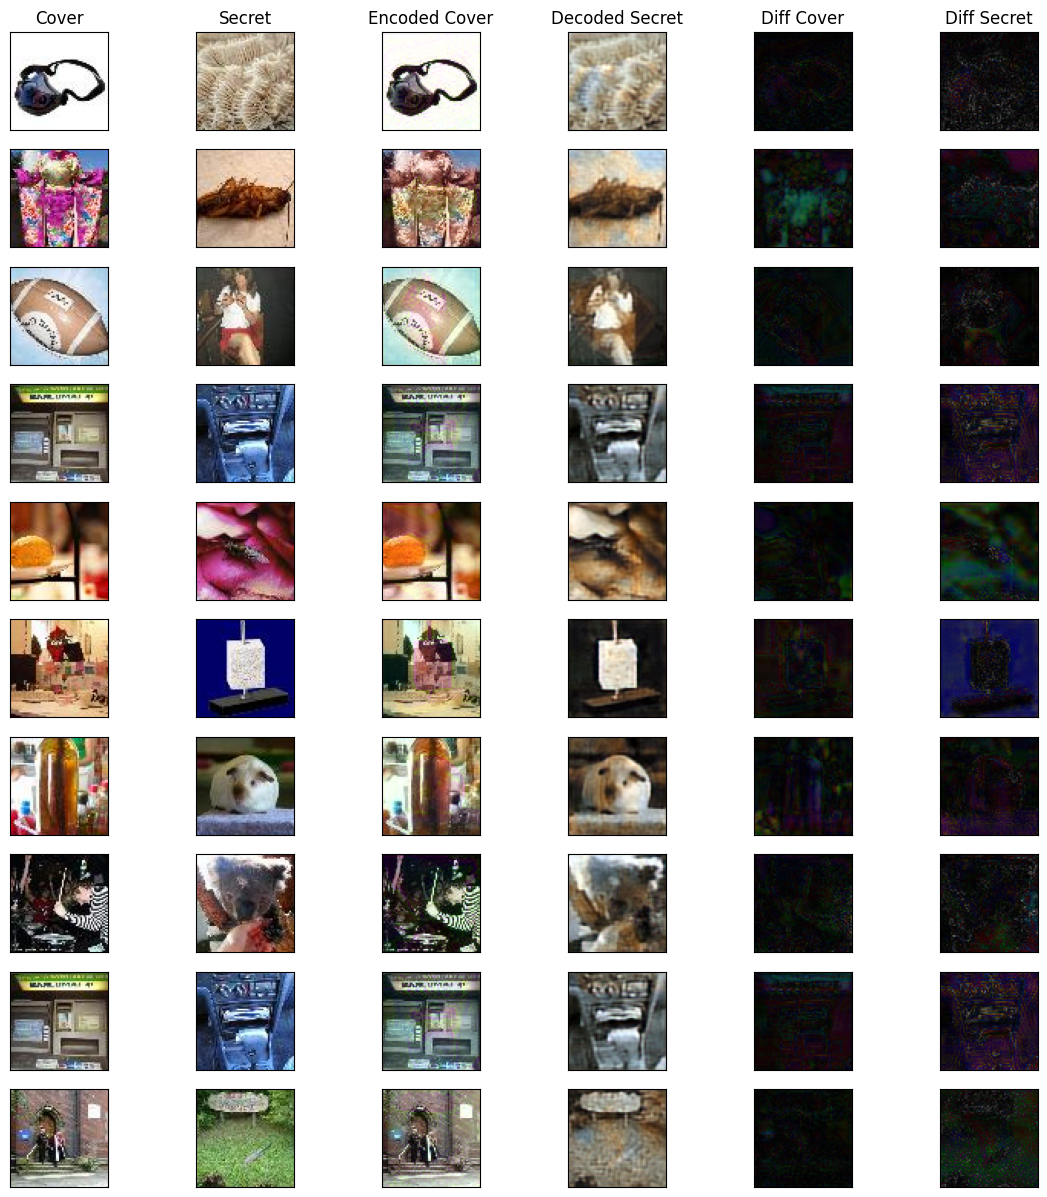

In [69]:
# Show images in gray scale
SHOW_GRAY = False
# Show difference bettwen predictions and ground truth.
SHOW_DIFF = True

# Diff enhance magnitude
ENHANCE = 1

# Number of secret and cover pairs to show.
n = 10

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
def show_image(img, n_rows, n_col, idx, gray=False, first_row=False, title=None):
    ax = plt.subplot(n_rows, n_col, idx)
    if gray:
        plt.imshow(rgb2gray(img), cmap = plt.get_cmap('gray'))
    else:
        plt.imshow(img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if first_row:
        plt.title(title)

plt.figure(figsize=(14, 15))
rand_indx = [random.randint(0, 200) for x in range(n)]
# for i, idx in enumerate(range(0, n)):
for i, idx in enumerate(rand_indx):
    n_col = 6 if SHOW_DIFF else 4

    show_image(X_test_cover[idx], n, n_col, i * n_col + 1, gray=SHOW_GRAY, first_row=i==0, title='Cover')

    show_image(X_test_secret[idx], n, n_col, i * n_col + 2, gray=SHOW_GRAY, first_row=i==0, title='Secret')

    show_image(decoded_C[idx], n, n_col, i * n_col + 3, gray=SHOW_GRAY, first_row=i==0, title='Encoded Cover')

    show_image(decoded_S[idx], n, n_col, i * n_col + 4, gray=SHOW_GRAY, first_row=i==0, title='Decoded Secret')


    if SHOW_DIFF:
        show_image(np.multiply(diff_C[idx], ENHANCE), n, n_col, i * n_col + 5, gray=SHOW_GRAY, first_row=i==0, title='Diff Cover')

        show_image(np.multiply(diff_S[idx], ENHANCE), n, n_col, i * n_col + 6, gray=SHOW_GRAY, first_row=i==0, title='Diff Secret')

plt.show()